In [1]:
# annotation과 image 디렉토리 설정. annotation디렉토리에 있는 파일 확인. 
import os
from pathlib import Path

HOME_DIR = str(Path.home())

ANNO_DIR = os.path.join(HOME_DIR, 'DLCV/data/Dog_face/annotation')
IMAGE_DIR = os.path.join(HOME_DIR, 'DLCV/data/Dog_face/images')
print(ANNO_DIR)

files = os.listdir(ANNO_DIR)
print('파일 개수는:',len(files))
print(files)

/home/dsl001/DLCV/data/Dog_face/annotation
파일 개수는: 5829
['Dog_face_3528.xml', 'Dog_face_2039.xml', 'Dog_face_3433.xml', 'Dog_face_4061.xml', 'Dog_face_2299.xml', 'Dog_face_2726.xml', 'Dog_face_4167.xml', 'Dog_face_1321.xml', 'Dog_face_4818.xml', 'Dog_face_4265.xml', 'Dog_face_2123.xml', 'Dog_face_4136.xml', 'Dog_face_1287.xml', 'Dog_face_4471.xml', 'Dog_face_569.xml', 'Dog_face_5455.xml', 'Dog_face_2468.xml', 'Dog_face_3896.xml', 'Dog_face_5018.xml', 'Dog_face_228.xml', 'Dog_face_2679.xml', 'Dog_face_5488.xml', 'Dog_face_660.xml', 'Dog_face_5824.xml', 'Dog_face_1764.xml', 'Dog_face_2318.xml', 'Dog_face_5816.xml', 'Dog_face_1934.xml', 'Dog_face_1495.xml', 'Dog_face_5180.xml', 'Dog_face_541.xml', 'Dog_face_3386.xml', 'Dog_face_2288.xml', 'Dog_face_4583.xml', 'Dog_face_5624.xml', 'Dog_face_2015.xml', 'Dog_face_4177.xml', 'Dog_face_4918.xml', 'Dog_face_2720.xml', 'Dog_face_1691.xml', 'Dog_face_4654.xml', 'Dog_face_1465.xml', 'Dog_face_4518.xml', 'Dog_face_76.xml', 'Dog_face_1507.xml', 'Dog

In [2]:
import glob
import xml.etree.ElementTree as ET

for xml_file in files:
    xml_path = os.path.join(ANNO_DIR, xml_file)
    xml_file = open(xml_path, 'rt', encoding='UTF8')
    
    tree = ET.parse(xml_file)
    root = tree.getroot()
    
    for obj in root.findall('object'):
        class_name = obj.find('name')
        original = class_name.text
        if original == 'Dog Face':
            modified = original.replace(r'Dog Face', r'Dog face')
            class_name.text = modified
            tree.write(xml_path)
        else:
            pass

ParseError: not well-formed (invalid token): line 1, column 0 (<string>)

In [16]:
images = sorted(os.listdir(IMAGE_DIR))
xmls = sorted(os.listdir(ANNO_DIR))

i = 1
for image, xml in zip(images, xmls):
    
    # 확장자를 제외한 파일명이 일치하는지 확인
    image_name, image_extension = os.path.splitext(image)
    xml_name, xml_extension = os.path.splitext(xml)
    
    if image_name == xml_name:
        pass
    else:
        print(image_name, xml_name)


    # 이미지 파일명 변경
    image_src = os.path.join(IMAGE_DIR, image)
    image_dst = 'Dog_face_{}.jpg'.format(i)
    image_dst = os.path.join(IMAGE_DIR, image_dst)
    os.rename(image_src, image_dst)
    
    # 주석 파일명 변경
    xml_src = os.path.join(ANNO_DIR, xml)
    xml_dst = 'Dog_face_{}.xml'.format(i)
    xml_dst = os.path.join(ANNO_DIR, xml_dst)
    os.rename(xml_src, xml_dst)
    
    # 주석의 'filename' 변경
    xml_file = open(xml_dst, 'rt', encoding='UTF8')

    tree = ET.parse(xml_file)
    root = tree.getroot()
    
    xml_name = root.find('filename')
    original = xml_name.text
    modified = original.replace(image, r'Dog_face_{}.jpg'.format(i))
    xml_name.text = modified
    tree.write(xml_dst) 
   
    i = i + 1

In [3]:
import glob
import xml.etree.ElementTree as ET

classes_map = {'Dog face':0}

def xml_to_csv(path, output_filename):
    xml_list = []
    # xml 확장자를 가진 모든 파일의 절대 경로로 xml_file할당. 
    with open(output_filename, "w") as train_csv_file:
        for xml_file in glob.glob(path + '/*.xml'):
            # xml 파일을 parsing하여 XML Element형태의 Element Tree를 생성하여 object 정보를 추출. 
            tree = ET.parse(xml_file)
            root = tree.getroot()
            # 파일내에 있는 모든 object Element를 찾음. 
            full_image_name = os.path.join(IMAGE_DIR, root.find('filename').text)
            value_str_list = ' '
            for obj in root.findall('object'):
                xmlbox = obj.find('bndbox')
                class_name = obj.find('name').text
                x1 = int(xmlbox.find('xmin').text)
                y1 = int(xmlbox.find('ymin').text)
                x2 = int(xmlbox.find('xmax').text)
                y2 = int(xmlbox.find('ymax').text)
                # 
                class_id = classes_map[class_name]
                value_str = ('{0},{1},{2},{3},{4}').format(x1, y1, x2, y2, class_id)
                # object별 정보를 tuple형태로 object_list에 저장. 
                value_str_list = value_str_list+value_str+' '
        
            train_csv_file.write(full_image_name+' '+ value_str_list+'\n')
        # xml file 찾는 for loop 종료 

In [18]:
xml_to_csv(ANNO_DIR, os.path.join(ANNO_DIR,'Dog_face_annotation.csv'))
print(os.path.join(ANNO_DIR,'Dog_face_annotation.csv'))

/home/dsl001/DLCV/data/Dog_face/annotation/Dog_face_annotation.csv


In [4]:
# !cat /home/dsl001/DLCV/data/Dog/annotation/Dog_annotation.csv

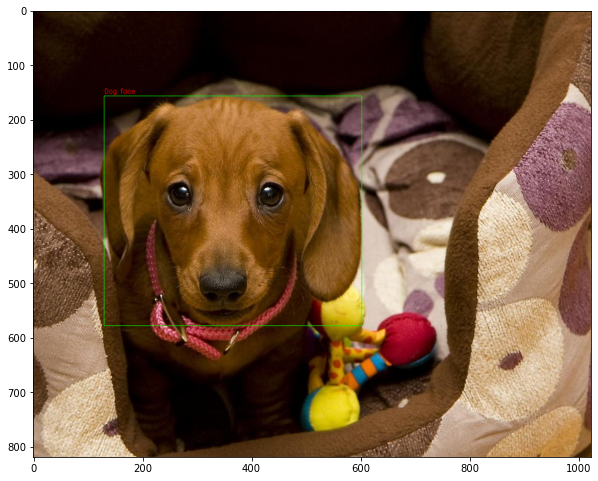

In [5]:
import cv2
import os
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt

xml_file = os.path.join(ANNO_DIR, 'Dog_face_5000.xml')

tree = ET.parse(xml_file)
root = tree.getroot()

image_name = root.find('filename').text
full_image_name = os.path.join(IMAGE_DIR, image_name)

img = cv2.imread(full_image_name)
# opencv의 rectangle()는 인자로 들어온 이미지 배열에 그대로 사각형을 그려주므로 별도의 이미지 배열에 그림 작업 수행. 
draw_img = img.copy()
# OpenCV는 RGB가 아니라 BGR이므로 빨간색은 (0, 0, 255)
green_color=(0, 255, 0)
red_color=(0, 0, 255)

# 파일내에 있는 모든 object Element를 찾음.
objects_list = []
for obj in root.findall('object'):
    xmlbox = obj.find('bndbox')
    
    left = int(xmlbox.find('xmin').text)
    top = int(xmlbox.find('ymin').text)
    right = int(xmlbox.find('xmax').text)
    bottom = int(xmlbox.find('ymax').text)
    
    class_name=obj.find('name').text
    
    # draw_img 배열의 좌상단 우하단 좌표에 녹색으로 box 표시 
    cv2.rectangle(draw_img, (left, top), (right, bottom), color=green_color, thickness=1)
    # draw_img 배열의 좌상단 좌표에 빨간색으로 클래스명 표시
    cv2.putText(draw_img, class_name, (left, top - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.4, red_color, thickness=1)

img_rgb = cv2.cvtColor(draw_img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 10))
plt.imshow(img_rgb)

In [2]:
import numpy as np
import keras.backend as K
from keras.layers import Input, Lambda
from keras.models import Model
from keras.optimizers import Adam
from keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

Using TensorFlow backend.
/home/dsl001/anaconda3/envs/tf113/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/dsl001/anaconda3/envs/tf113/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/dsl001/anaconda3/envs/tf113/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/dsl001/anaconda3/

In [3]:
import sys, os

LOCAL_PACKAGE_DIR = os.path.abspath("./keras-yolo3")
sys.path.append(LOCAL_PACKAGE_DIR)

from yolo3.model import preprocess_true_boxes, yolo_body, tiny_yolo_body, yolo_loss
from yolo3.utils import get_random_data

In [4]:
from train import get_classes, get_anchors
from train import create_tiny_model, data_generator, data_generator_wrapper

BASE_DIR = os.path.join(HOME_DIR, 'DLCV/Detection/yolo/keras-yolo3')

## 학습을 위한 기반 환경 설정. annotation 파일 위치, epochs시 저장된 모델 파일, Object클래스 파일, anchor 파일.
annotation_path = os.path.join(ANNO_DIR, 'Dog_face_annotation.csv')
log_dir = os.path.join(BASE_DIR, 'snapshots/Dog_face/')
classes_path = os.path.join(BASE_DIR, 'model_data/Dog_face_classes.txt')
anchors_path = os.path.join(BASE_DIR,'model_data/tiny_yolo_anchors.txt')

class_names = get_classes(classes_path)
num_classes = len(class_names)
anchors = get_anchors(anchors_path)
print(class_names, num_classes)
print(anchors)

['Dog face'] 1
[[ 10.  14.]
 [ 23.  27.]
 [ 37.  58.]
 [ 81.  82.]
 [135. 169.]
 [344. 319.]]


#### yolo 모델 학습을 위한 전반적인 파라미터를 config 클래스로 설정하고 필요시 이를 수정하여 학습. 

In [5]:
# csv annotation 파일을 읽어서 lines 리스트로 만듬. 
with open(annotation_path) as f:
    lines = f.readlines()

class config:
    #tiny yolo로 모델로 초기 weight 학습 원할 시 아래를 tiny-yolo.h5로 수정. 
    initial_weights_path=os.path.join(BASE_DIR, 'model_data/yolo-tiny.h5')
    # input_shape는 고정. 
    input_shape=(416, 416)
    # epochs는 freeze, unfreeze 2 step에 따라 설정. 
    first_epochs=1000
    first_initial_epochs=0
    second_epochs=10000
    second_initial_epochs=1000
    # 학습시 batch size, train,valid건수, epoch steps 횟수  
    batch_size = 4
    val_split = 0.1   
    num_val = int(len(lines)*val_split)
    num_train = len(lines) - num_val
    train_epoch_steps = num_train//batch_size 
    val_epoch_steps =  num_val//batch_size
    
    anchors = get_anchors(anchors_path)
    class_names = get_classes(classes_path)
    num_classes = len(class_names)
    # epoch시 저장된 weight 파일 디렉토리 
    log_dir = os.path.join(BASE_DIR, 'snapshots/Dog_face_detection/')
    
print('Class name:', config.class_names,'\nNum classes:', config.num_classes)

Class name: ['Dog face'] 
Num classes: 1


#### csv 파일을 입력 받아서 train 데이터와 valid 데이터 처리를 위한 data_generator_wrapper객체를 각각 생성.
* train용, valid 용 data_generator_wrapper는 Yolo 모델의 fit_generator()학습시 인자로 입력됨. 

In [6]:
def data_generator_default(annotation_lines, batch_size, input_shape, anchors, num_classes, random):
    '''data generator for fit_generator'''
    n = len(annotation_lines)
    i = 0
    while True:
        image_data = []
        box_data = []
        for b in range(batch_size):
            if i==0:
                np.random.shuffle(annotation_lines)
            image, box = get_random_data(annotation_lines[i], input_shape, random=random)
            image_data.append(image)
            box_data.append(box)
            i = (i+1) % n
        image_data = np.array(image_data)
        box_data = np.array(box_data)
        y_true = preprocess_true_boxes(box_data, input_shape, anchors, num_classes)
        yield [image_data, *y_true], np.zeros(batch_size)

In [7]:
def data_generator_wrapper_default(annotation_lines, batch_size, input_shape, anchors, num_classes, random):
    n = len(annotation_lines)
    if n==0 or batch_size<=0: return None
    return data_generator_default(annotation_lines, batch_size, input_shape, anchors, num_classes, random)

In [8]:
def create_generator(lines):
    
    train_data_generator = data_generator_wrapper_default(lines[:config.num_train], config.batch_size, 
                                                  config.input_shape, config.anchors, config.num_classes, random=50)
    
    valid_data_generator = data_generator_wrapper_default(lines[config.num_train:], config.batch_size, 
                                                  config.input_shape, config.anchors, config.num_classes, random=50)
    
    return train_data_generator, valid_data_generator

#### YOLO 모델 또는 tiny yolo 모델 반환. 초기 weight값은 pretrained된 yolo weight값으로 할당. 

In [9]:
# anchor 개수에 따라 tiny yolo 모델 또는 yolo 모델 반환. 
def create_yolo_model():
    is_tiny_version = len(config.anchors)==6 
    if is_tiny_version:
        model = create_tiny_model(config.input_shape, config.anchors, config.num_classes, 
            freeze_body=2, weights_path=config.initial_weights_path)
    else:
        model = create_model(config.input_shape, config.anchors, config.num_classes, 
            freeze_body=2, weights_path=config.initial_weights_path)
        
    return model 

#### callback 객체들을 생성. 

In [10]:
# Tensorboard, ModelCheckpoint, ReduceLROnPlateau, EarlyStopping callback 반환
def create_callbacks():
    logging = TensorBoard(log_dir=config.log_dir)
    checkpoint = ModelCheckpoint(config.log_dir + 'ep{epoch:03d}-loss{loss:.3f}-val_loss{val_loss:.3f}.h5',
        monitor='val_loss', save_weights_only=True, save_best_only=True, period=1)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=50, verbose=1)
    early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=100, verbose=1)
    
    #개별 callback들을 한꺼번에 list로 묶어서 반환
    return [logging, checkpoint, reduce_lr, early_stopping]

#### 학습 수행

In [ ]:
# create_generator(), create_model(), create_callbacks() 수행. 
from keras.utils import multi_gpu_model

train_data_generator, valid_data_generator = create_generator(lines)
dog_face_model = create_yolo_model()
callbacks_list = create_callbacks()

# 최초 모델은 주요 layer가 freeze되어 있음. 안정적인 loss를 확보하기 위해 주요 layer를 freeze한 상태로 먼저 학습. 
print('First train 시작')
dog_face_model.compile(optimizer=Adam(lr=1e-3), loss={'yolo_loss': lambda y_true, y_pred: y_pred})
dog_face_model.fit_generator(train_data_generator, steps_per_epoch=config.train_epoch_steps,
                             validation_data=valid_data_generator, validation_steps=config.val_epoch_steps,
                             epochs=config.first_epochs, initial_epoch=config.first_initial_epochs, 
                             callbacks=callbacks_list)

# 1단계 학습 완료 모델 저장. 
dog_face_model.save_weights(log_dir + 'trained_weights_stage_1.h5')

# 모든 layer를 trainable=True로 설정하고 학습 수행. 
for i in range(len(dog_face_model.layers)):
    dog_face_model.layers[i].trainable = True
    
print('Second train 시작' )

# Tensorboard, ModelCheckpoint, ReduceLROnPlateau, EarlyStopping callback 반환
def create_callbacks():
    logging = TensorBoard(log_dir=config.log_dir)
    checkpoint = ModelCheckpoint(config.log_dir + 'ep{epoch:03d}-loss{loss:.3f}-val_loss{val_loss:.3f}.h5',
                                 monitor='val_loss', save_weights_only=True, save_best_only=True, period=1)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=300, verbose=1)
    
    #개별 callback들을 한꺼번에 list로 묶어서 반환
    return [logging, checkpoint, reduce_lr]

callbacks_list = create_callbacks()
dog_face_model.compile(optimizer=Adam(lr=1e-4), loss={'yolo_loss': lambda y_true, y_pred: y_pred}) 
dog_face_model.fit_generator(train_data_generator, steps_per_epoch=config.train_epoch_steps,
                             validation_data=valid_data_generator, validation_steps=config.val_epoch_steps,
                             epochs=config.second_epochs, initial_epoch=config.second_initial_epochs,
                             callbacks=callbacks_list)

# 최종 학습 완료 모델 저장. 
dog_face_model.save_weights(log_dir + 'trained_weights_final.h5')

Instructions for updating:
Colocations handled automatically by placer.
Create Tiny YOLOv3 model with 6 anchors and 1 classes.


/home/dsl001/anaconda3/envs/tf113/lib/python3.6/site-packages/keras/engine/saving.py:1008: UserWarning: Skipping loading of weights for layer conv2d_10 due to mismatch in shape ((1, 1, 512, 18) vs (255, 512, 1, 1)).
  weight_values[i].shape))
/home/dsl001/anaconda3/envs/tf113/lib/python3.6/site-packages/keras/engine/saving.py:1008: UserWarning: Skipping loading of weights for layer conv2d_10 due to mismatch in shape ((18,) vs (255,)).
  weight_values[i].shape))
/home/dsl001/anaconda3/envs/tf113/lib/python3.6/site-packages/keras/engine/saving.py:1008: UserWarning: Skipping loading of weights for layer conv2d_13 due to mismatch in shape ((1, 1, 256, 18) vs (255, 256, 1, 1)).
  weight_values[i].shape))
/home/dsl001/anaconda3/envs/tf113/lib/python3.6/site-packages/keras/engine/saving.py:1008: UserWarning: Skipping loading of weights for layer conv2d_13 due to mismatch in shape ((18,) vs (255,)).
  weight_values[i].shape))


Load weights /home/dsl001/DLCV/Detection/yolo/keras-yolo3/model_data/yolo-tiny.h5.
Freeze the first 42 layers of total 44 layers.
First train 시작
Epoch 1/1000
1311/1311 [==============================] - 361s 276ms/step - loss: 51.3205 - val_loss: 17.0722
Epoch 2/1000
1311/1311 [==============================] - 354s 270ms/step - loss: 15.5156 - val_loss: 15.1386
Epoch 3/1000
1311/1311 [==============================] - 356s 271ms/step - loss: 14.5007 - val_loss: 14.5287
Epoch 4/1000
1311/1311 [==============================] - 356s 272ms/step - loss: 13.9086 - val_loss: 14.0360
Epoch 5/1000
1311/1311 [==============================] - 354s 270ms/step - loss: 13.7032 - val_loss: 14.0772
Epoch 6/1000
1311/1311 [==============================] - 355s 271ms/step - loss: 13.3772 - val_loss: 13.6564
Epoch 7/1000
1311/1311 [==============================] - 353s 269ms/step - loss: 13.2600 - val_loss: 13.4751
Epoch 8/1000
1311/1311 [==============================] - 356s 272ms/step - loss: 13.

1311/1311 [==============================] - 349s 266ms/step - loss: 13.0966 - val_loss: 13.0874
Epoch 74/1000
1311/1311 [==============================] - 349s 267ms/step - loss: 13.1543 - val_loss: 13.2894
Epoch 75/1000
1311/1311 [==============================] - 351s 267ms/step - loss: 13.0182 - val_loss: 13.2909
Epoch 76/1000
1311/1311 [==============================] - 349s 266ms/step - loss: 13.0697 - val_loss: 13.2873
Epoch 77/1000
1311/1311 [==============================] - 351s 268ms/step - loss: 12.9593 - val_loss: 13.1880
Epoch 78/1000
1311/1311 [==============================] - 351s 267ms/step - loss: 13.0289 - val_loss: 13.8695
Epoch 79/1000
1311/1311 [==============================] - 352s 268ms/step - loss: 12.9453 - val_loss: 12.7673
Epoch 80/1000
1311/1311 [==============================] - 354s 270ms/step - loss: 13.0108 - val_loss: 13.4019
Epoch 81/1000
1311/1311 [==============================] - 349s 266ms/step - loss: 12.9581 - val_loss: 13.0415
Epoch 82/1000
1

1311/1311 [==============================] - 352s 269ms/step - loss: 12.6670 - val_loss: 12.8217
Epoch 146/1000
1311/1311 [==============================] - 352s 268ms/step - loss: 12.7204 - val_loss: 12.9998
Epoch 147/1000
1311/1311 [==============================] - 350s 267ms/step - loss: 12.6834 - val_loss: 13.3406
Epoch 148/1000
1311/1311 [==============================] - 351s 268ms/step - loss: 12.7126 - val_loss: 12.8445
Epoch 149/1000
1311/1311 [==============================] - 350s 267ms/step - loss: 12.6989 - val_loss: 13.2174
Epoch 150/1000
1311/1311 [==============================] - 352s 268ms/step - loss: 12.6537 - val_loss: 12.9031
Epoch 151/1000
1311/1311 [==============================] - 350s 267ms/step - loss: 12.6841 - val_loss: 12.8021
Epoch 152/1000
1311/1311 [==============================] - 351s 268ms/step - loss: 12.6866 - val_loss: 12.8273
Epoch 153/1000
1311/1311 [==============================] - 350s 267ms/step - loss: 12.6304 - val_loss: 12.8855
Epoch 1

1311/1311 [==============================] - 350s 267ms/step - loss: 12.6106 - val_loss: 12.7849
Epoch 219/1000
1311/1311 [==============================] - 350s 267ms/step - loss: 12.5018 - val_loss: 12.7571
Epoch 220/1000
1311/1311 [==============================] - 351s 268ms/step - loss: 12.7303 - val_loss: 12.8939
Epoch 221/1000
1311/1311 [==============================] - 354s 270ms/step - loss: 12.6055 - val_loss: 13.1683
Epoch 222/1000
1311/1311 [==============================] - 350s 267ms/step - loss: 12.6981 - val_loss: 12.9311
Epoch 223/1000
1311/1311 [==============================] - 351s 268ms/step - loss: 12.6302 - val_loss: 12.7829
Epoch 224/1000
1311/1311 [==============================] - 350s 267ms/step - loss: 12.6506 - val_loss: 13.2495
Epoch 225/1000
1311/1311 [==============================] - 351s 268ms/step - loss: 12.6386 - val_loss: 12.8914
Epoch 226/1000
1311/1311 [==============================] - 350s 267ms/step - loss: 12.6408 - val_loss: 12.9675
Epoch 2

1311/1311 [==============================] - 353s 270ms/step - loss: 11.2928 - val_loss: 11.7878
Epoch 1008/10000
1311/1311 [==============================] - 355s 271ms/step - loss: 11.1531 - val_loss: 11.4371
Epoch 1009/10000
1311/1311 [==============================] - 356s 271ms/step - loss: 10.8863 - val_loss: 11.4210
Epoch 1010/10000
1311/1311 [==============================] - 342s 261ms/step - loss: 10.7797 - val_loss: 11.6056
Epoch 1011/10000
1311/1311 [==============================] - 357s 272ms/step - loss: 10.7937 - val_loss: 11.4720
Epoch 1012/10000
1311/1311 [==============================] - 356s 271ms/step - loss: 10.6015 - val_loss: 11.2976
Epoch 1013/10000
1311/1311 [==============================] - 356s 271ms/step - loss: 10.4704 - val_loss: 11.1689
Epoch 1014/10000
1311/1311 [==============================] - 354s 270ms/step - loss: 10.3933 - val_loss: 11.1695
Epoch 1015/10000
1311/1311 [==============================] - 355s 270ms/step - loss: 10.3676 - val_loss:

1311/1311 [==============================] - 352s 269ms/step - loss: 8.6722 - val_loss: 10.1256
Epoch 1080/10000
1311/1311 [==============================] - 343s 262ms/step - loss: 8.6048 - val_loss: 9.9888
Epoch 1081/10000
1311/1311 [==============================] - 349s 266ms/step - loss: 8.5622 - val_loss: 10.2853
Epoch 1082/10000
1311/1311 [==============================] - 356s 272ms/step - loss: 8.6825 - val_loss: 10.5064
Epoch 1083/10000
1311/1311 [==============================] - 356s 272ms/step - loss: 8.4798 - val_loss: 10.2254
Epoch 1084/10000
1311/1311 [==============================] - 338s 258ms/step - loss: 8.5281 - val_loss: 9.8389
Epoch 1085/10000
1311/1311 [==============================] - 355s 271ms/step - loss: 8.5934 - val_loss: 10.6682
Epoch 1086/10000
1311/1311 [==============================] - 351s 267ms/step - loss: 8.6020 - val_loss: 10.2461
Epoch 1087/10000
1311/1311 [==============================] - 354s 270ms/step - loss: 8.4667 - val_loss: 10.1514
Ep

1311/1311 [==============================] - 356s 271ms/step - loss: 8.0933 - val_loss: 10.2186
Epoch 1152/10000
1311/1311 [==============================] - 354s 270ms/step - loss: 8.2160 - val_loss: 10.2537
Epoch 1153/10000
1311/1311 [==============================] - 357s 273ms/step - loss: 8.1186 - val_loss: 10.2026
Epoch 1154/10000
1311/1311 [==============================] - 354s 270ms/step - loss: 8.1709 - val_loss: 10.1626
Epoch 1155/10000
1311/1311 [==============================] - 355s 271ms/step - loss: 8.1094 - val_loss: 10.1364
Epoch 1156/10000
1311/1311 [==============================] - 356s 272ms/step - loss: 8.0913 - val_loss: 10.7791
Epoch 1157/10000
1311/1311 [==============================] - 354s 270ms/step - loss: 8.1900 - val_loss: 10.1846
Epoch 1158/10000
1311/1311 [==============================] - 354s 270ms/step - loss: 8.0529 - val_loss: 10.5716
Epoch 1159/10000
1311/1311 [==============================] - 354s 270ms/step - loss: 8.1185 - val_loss: 10.8350


1311/1311 [==============================] - 356s 272ms/step - loss: 7.9671 - val_loss: 10.6724
Epoch 1224/10000
1311/1311 [==============================] - 354s 270ms/step - loss: 7.9340 - val_loss: 10.6321
Epoch 1225/10000
1311/1311 [==============================] - 356s 272ms/step - loss: 7.8401 - val_loss: 11.1041
Epoch 1226/10000
1311/1311 [==============================] - 353s 269ms/step - loss: 7.9170 - val_loss: 10.3201
Epoch 1227/10000
1311/1311 [==============================] - 356s 271ms/step - loss: 7.9632 - val_loss: 10.0590
Epoch 1228/10000
1311/1311 [==============================] - 355s 271ms/step - loss: 7.9673 - val_loss: 11.0846
Epoch 1229/10000
1311/1311 [==============================] - 356s 271ms/step - loss: 7.8753 - val_loss: 10.6424
Epoch 1230/10000
1311/1311 [==============================] - 355s 271ms/step - loss: 7.9470 - val_loss: 10.4861
Epoch 1231/10000
1311/1311 [==============================] - 358s 273ms/step - loss: 7.8572 - val_loss: 10.4765


1311/1311 [==============================] - 356s 272ms/step - loss: 7.7306 - val_loss: 10.9471
Epoch 1296/10000
1311/1311 [==============================] - 352s 268ms/step - loss: 7.7794 - val_loss: 10.8662
Epoch 1297/10000
1311/1311 [==============================] - 357s 272ms/step - loss: 7.6632 - val_loss: 10.6377
Epoch 1298/10000
1311/1311 [==============================] - 350s 267ms/step - loss: 7.7890 - val_loss: 10.7032
Epoch 1299/10000
1311/1311 [==============================] - 358s 273ms/step - loss: 7.6984 - val_loss: 11.1063
Epoch 1300/10000
1311/1311 [==============================] - 355s 270ms/step - loss: 7.7715 - val_loss: 10.5046
Epoch 1301/10000
1311/1311 [==============================] - 354s 270ms/step - loss: 7.7639 - val_loss: 10.4480
Epoch 1302/10000
1311/1311 [==============================] - 354s 270ms/step - loss: 7.7102 - val_loss: 11.0280
Epoch 1303/10000
1311/1311 [==============================] - 336s 257ms/step - loss: 7.7453 - val_loss: 10.9147


1311/1311 [==============================] - 355s 271ms/step - loss: 7.6745 - val_loss: 11.8298
Epoch 1368/10000
1311/1311 [==============================] - 355s 271ms/step - loss: 7.5526 - val_loss: 10.8075
Epoch 1369/10000
1311/1311 [==============================] - 355s 271ms/step - loss: 7.6775 - val_loss: 10.7084
Epoch 1370/10000
1311/1311 [==============================] - 357s 273ms/step - loss: 7.6631 - val_loss: 11.0125
Epoch 1371/10000
1311/1311 [==============================] - 353s 269ms/step - loss: 7.7270 - val_loss: 11.2490
Epoch 1372/10000
1311/1311 [==============================] - 356s 272ms/step - loss: 7.6928 - val_loss: 10.5366
Epoch 1373/10000
1311/1311 [==============================] - 355s 271ms/step - loss: 7.5435 - val_loss: 10.7340
Epoch 1374/10000
1311/1311 [==============================] - 358s 273ms/step - loss: 7.6206 - val_loss: 11.4807
Epoch 1375/10000
1311/1311 [==============================] - 353s 269ms/step - loss: 7.6328 - val_loss: 10.3394


Epoch 1439/10000
1311/1311 [==============================] - 355s 270ms/step - loss: 6.9032 - val_loss: 10.8028
Epoch 1440/10000
1311/1311 [==============================] - 355s 271ms/step - loss: 6.8291 - val_loss: 11.1120
Epoch 1441/10000
1311/1311 [==============================] - 352s 269ms/step - loss: 6.8877 - val_loss: 11.4780
Epoch 1442/10000
1311/1311 [==============================] - 354s 270ms/step - loss: 6.8012 - val_loss: 10.5643
Epoch 1443/10000
1311/1311 [==============================] - 353s 269ms/step - loss: 6.8272 - val_loss: 11.0401
Epoch 1444/10000
1311/1311 [==============================] - 355s 270ms/step - loss: 6.8673 - val_loss: 11.1598
Epoch 1445/10000
1311/1311 [==============================] - 353s 269ms/step - loss: 6.7700 - val_loss: 11.2872
Epoch 1446/10000
1311/1311 [==============================] - 354s 270ms/step - loss: 6.8255 - val_loss: 11.5315
Epoch 1447/10000
1311/1311 [==============================] - 353s 269ms/step - loss: 6.8894 - v

1311/1311 [==============================] - 354s 270ms/step - loss: 6.5107 - val_loss: 11.1824
Epoch 1512/10000
1311/1311 [==============================] - 353s 270ms/step - loss: 6.4886 - val_loss: 11.3472
Epoch 1513/10000
1311/1311 [==============================] - 352s 269ms/step - loss: 6.4848 - val_loss: 11.8531
Epoch 1514/10000
1311/1311 [==============================] - 354s 270ms/step - loss: 6.5203 - val_loss: 10.6232
Epoch 1515/10000
1311/1311 [==============================] - 354s 270ms/step - loss: 6.4861 - val_loss: 10.8225
Epoch 1516/10000
1311/1311 [==============================] - 341s 260ms/step - loss: 6.4582 - val_loss: 12.1302
Epoch 1517/10000
1311/1311 [==============================] - 355s 271ms/step - loss: 6.5849 - val_loss: 11.7564
Epoch 1518/10000
1311/1311 [==============================] - 353s 269ms/step - loss: 6.4974 - val_loss: 11.4865
Epoch 1519/10000
1311/1311 [==============================] - 355s 271ms/step - loss: 6.4769 - val_loss: 11.4994


1311/1311 [==============================] - 354s 270ms/step - loss: 6.4005 - val_loss: 11.2308
Epoch 1584/10000
1311/1311 [==============================] - 355s 270ms/step - loss: 6.3567 - val_loss: 11.6194
Epoch 1585/10000
1311/1311 [==============================] - 353s 269ms/step - loss: 6.2728 - val_loss: 11.5194
Epoch 1586/10000
1311/1311 [==============================] - 356s 272ms/step - loss: 6.4373 - val_loss: 11.4655
Epoch 1587/10000
1311/1311 [==============================] - 357s 272ms/step - loss: 6.3218 - val_loss: 11.5091
Epoch 1588/10000
1311/1311 [==============================] - 355s 270ms/step - loss: 6.3260 - val_loss: 11.3843
Epoch 1589/10000
1311/1311 [==============================] - 354s 270ms/step - loss: 6.4097 - val_loss: 11.5231
Epoch 1590/10000
1311/1311 [==============================] - 355s 271ms/step - loss: 6.3313 - val_loss: 11.3738
Epoch 1591/10000
1311/1311 [==============================] - 356s 271ms/step - loss: 6.3236 - val_loss: 11.6469


1311/1311 [==============================] - 354s 270ms/step - loss: 6.1906 - val_loss: 11.3798
Epoch 1656/10000
1311/1311 [==============================] - 353s 269ms/step - loss: 6.1994 - val_loss: 12.0801
Epoch 1657/10000
1311/1311 [==============================] - 354s 270ms/step - loss: 6.1256 - val_loss: 11.5319
Epoch 1658/10000
1311/1311 [==============================] - 337s 257ms/step - loss: 6.1332 - val_loss: 11.7599
Epoch 1659/10000
1311/1311 [==============================] - 356s 271ms/step - loss: 6.1533 - val_loss: 12.3337
Epoch 1660/10000
1311/1311 [==============================] - 355s 271ms/step - loss: 6.0741 - val_loss: 11.5711
Epoch 1661/10000
1311/1311 [==============================] - 350s 267ms/step - loss: 6.1494 - val_loss: 11.6911
Epoch 1662/10000
1311/1311 [==============================] - 355s 271ms/step - loss: 6.2487 - val_loss: 12.3363
Epoch 1663/10000
1311/1311 [==============================] - 354s 270ms/step - loss: 6.1722 - val_loss: 10.8554


Epoch 1727/10000
 142/1311 [==>...........................] - ETA: 4:32 - loss: 5.8358

#### 최종 학습된 모델을 로딩하여 Object Detection 수행. 

In [18]:
from yolo import YOLO
#keras-yolo에서 image처리를 주요 PIL로 수행. 
from PIL import Image

LOCAL_PACKAGE_DIR = os.path.abspath("./keras-yolo3")
sys.path.append(LOCAL_PACKAGE_DIR)

# dog_yolo = YOLO(model_path='/home/dsl001/DLCV/Detection/yolo/keras-yolo3/snapshots/Dog/trained_weights_final.h5',
#                 anchors_path='~/DLCV/Detection/yolo/keras-yolo3/model_data/yolo_anchors.txt',
#                 classes_path='~/DLCV/Detection/yolo/keras-yolo3/model_data/Dog_classes.txt')

dog_yolo = YOLO(model_path='/home/dsl001/DLCV/Detection/yolo/keras-yolo3/snapshots/Dog_detection/ep432-loss5.571-val_loss6.285.h5',
                anchors_path='~/DLCV/Detection/yolo/keras-yolo3/model_data/yolo_anchors.txt',
                classes_path='~/DLCV/Detection/yolo/keras-yolo3/model_data/Dog_classes.txt')

/home/dsl001/DLCV/Detection/yolo/keras-yolo3/snapshots/Dog_detection/ep432-loss5.571-val_loss6.285.h5 model, anchors, and classes loaded.


#### 이미지 Object Detection

(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (135, 16) (492, 333)
0.06579091213643551
[['Dog 1.00', (135, 16), (492, 333)]]


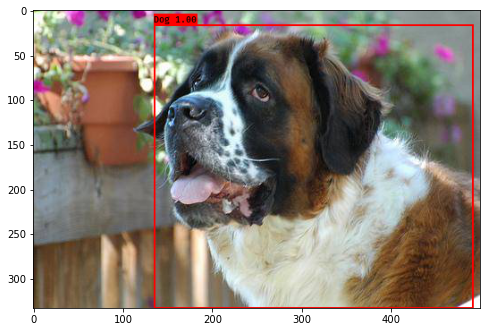

In [27]:
img = Image.open('/home/dsl001/DLCV/data/Dog_images/images/Dog_162.jpg')
detected_img, info = dog_yolo.detect_image(img)
print(info)
plt.figure(figsize=(8, 8))
plt.imshow(detected_img)

#### 영상 Object Detection 

In [39]:
import cv2
import time

def detect_video_yolo(model, input_path, output_path=""):
    
    start = time.time()
    cap = cv2.VideoCapture(input_path)
    
    #codec = cv2.VideoWriter_fourcc(*'DIVX')
    codec = cv2.VideoWriter_fourcc(*'XVID')
    vid_fps = cap.get(cv2.CAP_PROP_FPS)
    vid_size = (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)),int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
    vid_writer = cv2.VideoWriter(output_path, codec, vid_fps, vid_size)
    
    frame_cnt = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    print('총 Frame 갯수:', frame_cnt, '원본 영상 FPS:',vid_fps, '원본 Frame 크기:', vid_size)
    index = 0
    while True:
        hasFrame, image_frame = cap.read()
        if not hasFrame:
            print('프레임이 없거나 종료 되었습니다.')
            break
        start = time.time()
        # PIL Package를 내부에서 사용하므로 cv2에서 읽은 image_frame array를 다시 PIL의 Image형태로 변환해야 함.  
        image = Image.fromarray(image_frame)
        # 아래는 인자로 입력된 yolo객체의 detect_image()로 변환한다.
        detected_image, info = model.detect_image(image)
        # cv2의 video writer로 출력하기 위해 다시 PIL의 Image형태를 array형태로 변환 
        result = np.asarray(detected_image)
        index +=1
        print('#### frame:{0} 이미지 처리시간:{1}'.format(index, round(time.time()-start,3)))
        
        vid_writer.write(result)
    
    vid_writer.release()
    cap.release()
    print('### Video Detect 총 수행시간:', round(time.time()-start, 5))

In [43]:
detect_video_yolo(dog_yolo, '../../data/video/산책1.mp4', '../../data/output/산책1.avi')
!gsutil cp ../../data/output/NFL_yolo_01.avi gs://my_bucket_dlcv/data/output/NFL_yolo_01.avi

총 Frame 갯수: 12447 원본 영상 FPS: 30.0 원본 Frame 크기: (1280, 720)
(416, 416, 3)
Found 0 boxes for img
0.05470659793354571
#### frame:1 이미지 처리시간:0.061
(416, 416, 3)
Found 0 boxes for img
0.04180626501329243
#### frame:2 이미지 처리시간:0.047
(416, 416, 3)
Found 0 boxes for img
0.04479167587123811
#### frame:3 이미지 처리시간:0.049
(416, 416, 3)
Found 0 boxes for img
0.04052011203020811
#### frame:4 이미지 처리시간:0.045
(416, 416, 3)
Found 0 boxes for img
0.040668734116479754
#### frame:5 이미지 처리시간:0.044
(416, 416, 3)
Found 0 boxes for img
0.03693265002220869
#### frame:6 이미지 처리시간:0.04
(416, 416, 3)
Found 0 boxes for img
0.037334755063056946
#### frame:7 이미지 처리시간:0.041
(416, 416, 3)
Found 0 boxes for img
0.03414789400994778
#### frame:8 이미지 처리시간:0.039
(416, 416, 3)
Found 0 boxes for img
0.03917250595986843
#### frame:9 이미지 처리시간:0.042
(416, 416, 3)
Found 0 boxes for img
0.03973205108195543
#### frame:10 이미지 처리시간:0.043
(416, 416, 3)
Found 0 boxes for img
0.03988907509483397
#### frame:11 이미지 처리시간:0.044
(416, 416, 3)


Found 0 boxes for img
0.03348761308006942
#### frame:99 이미지 처리시간:0.036
(416, 416, 3)
Found 0 boxes for img
0.030141599010676146
#### frame:100 이미지 처리시간:0.033
(416, 416, 3)
Found 0 boxes for img
0.030791288008913398
#### frame:101 이미지 처리시간:0.033
(416, 416, 3)
Found 0 boxes for img
0.030942437006160617
#### frame:102 이미지 처리시간:0.033
(416, 416, 3)
Found 0 boxes for img
0.03067146590910852
#### frame:103 이미지 처리시간:0.033
(416, 416, 3)
Found 0 boxes for img
0.0308972611092031
#### frame:104 이미지 처리시간:0.034
(416, 416, 3)
Found 0 boxes for img
0.030020663049072027
#### frame:105 이미지 처리시간:0.033
(416, 416, 3)
Found 0 boxes for img
0.030367192113772035
#### frame:106 이미지 처리시간:0.034
(416, 416, 3)
Found 0 boxes for img
0.03419657307676971
#### frame:107 이미지 처리시간:0.038
(416, 416, 3)
Found 0 boxes for img
0.035309346159920096
#### frame:108 이미지 처리시간:0.038
(416, 416, 3)
Found 0 boxes for img
0.03683760995045304
#### frame:109 이미지 처리시간:0.04
(416, 416, 3)
Found 0 boxes for img
0.035933325067162514
#### fra

(416, 416, 3)
Found 0 boxes for img
0.03499487414956093
#### frame:198 이미지 처리시간:0.038
(416, 416, 3)
Found 0 boxes for img
0.03555266000330448
#### frame:199 이미지 처리시간:0.04
(416, 416, 3)
Found 0 boxes for img
0.035894669126719236
#### frame:200 이미지 처리시간:0.039
(416, 416, 3)
Found 0 boxes for img
0.034628622932359576
#### frame:201 이미지 처리시간:0.038
(416, 416, 3)
Found 0 boxes for img
0.03545419918373227
#### frame:202 이미지 처리시간:0.039
(416, 416, 3)
Found 0 boxes for img
0.03542263712733984
#### frame:203 이미지 처리시간:0.039
(416, 416, 3)
Found 0 boxes for img
0.03488796786405146
#### frame:204 이미지 처리시간:0.038
(416, 416, 3)
Found 0 boxes for img
0.029102517990395427
#### frame:205 이미지 처리시간:0.032
(416, 416, 3)
Found 0 boxes for img
0.028950294014066458
#### frame:206 이미지 처리시간:0.032
(416, 416, 3)
Found 0 boxes for img
0.02871843008324504
#### frame:207 이미지 처리시간:0.031
(416, 416, 3)
Found 0 boxes for img
0.029409936862066388
#### frame:208 이미지 처리시간:0.033
(416, 416, 3)
Found 0 boxes for img
0.030102618969

Found 1 boxes for img
Dog 1.00 (431, 15) (1053, 500)
0.040731281042099
#### frame:278 이미지 처리시간:0.044
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (431, 17) (1057, 503)
0.04156388598494232
#### frame:279 이미지 처리시간:0.045
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (430, 15) (1058, 501)
0.04088909598067403
#### frame:280 이미지 처리시간:0.044
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (431, 13) (1062, 500)
0.04151277104392648
#### frame:281 이미지 처리시간:0.045
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (430, 16) (1055, 503)
0.03853379702195525
#### frame:282 이미지 처리시간:0.041
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (431, 12) (1056, 499)
0.03799910913221538
#### frame:283 이미지 처리시간:0.041
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (435, 15) (1058, 502)
0.03505988302640617
#### frame:284 이미지 처리시간:0.038
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (435, 16) (1060, 503)
0.03384725307114422
#### frame:285 이미지 처리시간:0.036
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (436, 13) (1063, 505)
0.03394816187

Found 1 boxes for img
Dog 0.99 (624, 11) (1280, 650)
0.036246303003281355
#### frame:351 이미지 처리시간:0.039
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (625, 16) (1280, 641)
0.04213766218163073
#### frame:352 이미지 처리시간:0.046
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (611, 13) (1280, 642)
0.047259199200198054
#### frame:353 이미지 처리시간:0.051
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (597, 12) (1280, 633)
0.04360066703520715
#### frame:354 이미지 처리시간:0.047
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (593, 9) (1280, 641)
0.04347027698531747
#### frame:355 이미지 처리시간:0.047
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (593, 7) (1280, 566)
0.037485040025785565
#### frame:356 이미지 처리시간:0.041
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (588, 15) (1263, 563)
0.036618296056985855
#### frame:357 이미지 처리시간:0.039
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (572, 15) (1236, 552)
0.0384126219432801
#### frame:358 이미지 처리시간:0.041
(416, 416, 3)
Found 2 boxes for img
Dog 0.46 (1109, 5) (1277, 379)
Dog 1.00 (

(416, 416, 3)
Found 2 boxes for img
Dog 0.75 (803, 52) (1125, 329)
Dog 1.00 (451, 35) (1000, 607)
0.04919653106480837
#### frame:411 이미지 처리시간:0.053
(416, 416, 3)
Found 2 boxes for img
Dog 0.77 (802, 52) (1126, 330)
Dog 0.99 (453, 28) (994, 613)
0.051505682058632374
#### frame:412 이미지 처리시간:0.055
(416, 416, 3)
Found 2 boxes for img
Dog 0.85 (801, 51) (1125, 332)
Dog 0.98 (450, 24) (1005, 617)
0.048537353053689
#### frame:413 이미지 처리시간:0.055
(416, 416, 3)
Found 2 boxes for img
Dog 0.75 (796, 48) (1123, 332)
Dog 0.99 (450, 30) (997, 607)
0.049320222809910774
#### frame:414 이미지 처리시간:0.053
(416, 416, 3)
Found 2 boxes for img
Dog 0.63 (795, 48) (1120, 332)
Dog 0.99 (451, 27) (1006, 610)
0.047911552945151925
#### frame:415 이미지 처리시간:0.052
(416, 416, 3)
Found 2 boxes for img
Dog 0.72 (795, 46) (1120, 335)
Dog 0.97 (457, 16) (1020, 559)
0.047563242027536035
#### frame:416 이미지 처리시간:0.051
(416, 416, 3)
Found 2 boxes for img
Dog 0.74 (793, 47) (1120, 335)
Dog 0.97 (456, 15) (1017, 556)
0.048213059082

0.054496753960847855
#### frame:469 이미지 처리시간:0.058
(416, 416, 3)
Found 2 boxes for img
Dog 0.77 (783, 17) (1150, 323)
Dog 1.00 (434, 31) (996, 625)
0.05496456986293197
#### frame:470 이미지 처리시간:0.059
(416, 416, 3)
Found 2 boxes for img
Dog 0.81 (783, 8) (1156, 324)
Dog 1.00 (433, 29) (1009, 622)
0.0480201852042228
#### frame:471 이미지 처리시간:0.052
(416, 416, 3)
Found 2 boxes for img
Dog 0.76 (804, 4) (1184, 308)
Dog 1.00 (436, 23) (1027, 623)
0.05199955403804779
#### frame:472 이미지 처리시간:0.056
(416, 416, 3)
Found 2 boxes for img
Dog 0.33 (808, 7) (1191, 304)
Dog 1.00 (433, 18) (1038, 624)
0.05381298204883933
#### frame:473 이미지 처리시간:0.058
(416, 416, 3)
Found 2 boxes for img
Dog 0.58 (797, 7) (1206, 303)
Dog 1.00 (434, 12) (1048, 632)
0.04825862497091293
#### frame:474 이미지 처리시간:0.052
(416, 416, 3)
Found 2 boxes for img
Dog 0.33 (800, 9) (1215, 293)
Dog 0.99 (438, 3) (1078, 642)
0.048149274894967675
#### frame:475 이미지 처리시간:0.052
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (430, 5) (1068, 645)
0.

(416, 416, 3)
Found 1 boxes for img
Dog 0.95 (552, 194) (863, 709)
0.04686388489790261
#### frame:541 이미지 처리시간:0.051
(416, 416, 3)
Found 1 boxes for img
Dog 0.97 (548, 190) (856, 701)
0.04757091891951859
#### frame:542 이미지 처리시간:0.054
(416, 416, 3)
Found 1 boxes for img
Dog 0.72 (538, 186) (852, 676)
0.04229535791091621
#### frame:543 이미지 처리시간:0.046
(416, 416, 3)
Found 1 boxes for img
Dog 0.92 (523, 190) (835, 614)
0.04283620207570493
#### frame:544 이미지 처리시간:0.047
(416, 416, 3)
Found 1 boxes for img
Dog 0.92 (508, 204) (844, 645)
0.04204773809760809
#### frame:545 이미지 처리시간:0.046
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (487, 193) (839, 689)
0.03772764606401324
#### frame:546 이미지 처리시간:0.042
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (468, 188) (830, 711)
0.045778906904160976
#### frame:547 이미지 처리시간:0.051
(416, 416, 3)
Found 1 boxes for img
Dog 0.97 (482, 200) (829, 637)
0.037197005935013294
#### frame:548 이미지 처리시간:0.04
(416, 416, 3)
Found 1 boxes for img
Dog 0.88 (516, 192) (817, 6

(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (487, 207) (848, 628)
0.036564423935487866
#### frame:611 이미지 처리시간:0.04
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (497, 204) (842, 656)
0.037197811994701624
#### frame:612 이미지 처리시간:0.04
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (503, 216) (845, 679)
0.03613039408810437
#### frame:613 이미지 처리시간:0.038
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (490, 204) (850, 697)
0.037385486997663975
#### frame:614 이미지 처리시간:0.04
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (487, 215) (844, 666)
0.037027937127277255
#### frame:615 이미지 처리시간:0.041
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (477, 213) (853, 625)
0.04171883198432624
#### frame:616 이미지 처리시간:0.044
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (472, 219) (866, 614)
0.03528851503506303
#### frame:617 이미지 처리시간:0.038
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (468, 236) (865, 628)
0.037870252039283514
#### frame:618 이미지 처리시간:0.042
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (463, 236) (873, 

Found 1 boxes for img
Dog 0.91 (467, 105) (819, 531)
0.03702880395576358
#### frame:682 이미지 처리시간:0.04
(416, 416, 3)
Found 1 boxes for img
Dog 0.76 (473, 107) (816, 538)
0.03583079599775374
#### frame:683 이미지 처리시간:0.039
(416, 416, 3)
Found 1 boxes for img
Dog 0.79 (492, 96) (833, 547)
0.0372146088629961
#### frame:684 이미지 처리시간:0.04
(416, 416, 3)
Found 1 boxes for img
Dog 0.93 (504, 75) (823, 520)
0.037081477930769324
#### frame:685 이미지 처리시간:0.041
(416, 416, 3)
Found 1 boxes for img
Dog 0.87 (516, 75) (838, 517)
0.04032734199427068
#### frame:686 이미지 처리시간:0.046
(416, 416, 3)
Found 1 boxes for img
Dog 0.76 (495, 100) (841, 545)
0.03708562790416181
#### frame:687 이미지 처리시간:0.04
(416, 416, 3)
Found 1 boxes for img
Dog 0.46 (539, 106) (803, 544)
0.0422119228169322
#### frame:688 이미지 처리시간:0.047
(416, 416, 3)
Found 1 boxes for img
Dog 0.54 (543, 104) (808, 552)
0.046127611072734
#### frame:689 이미지 처리시간:0.051
(416, 416, 3)
Found 1 boxes for img
Dog 0.77 (546, 67) (814, 510)
0.03987515810877085
#

Found 1 boxes for img
Dog 0.99 (279, 105) (860, 554)
0.036274238023906946
#### frame:755 이미지 처리시간:0.039
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (354, 144) (884, 544)
0.04262349009513855
#### frame:756 이미지 처리시간:0.046
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (402, 174) (871, 513)
0.043182634050026536
#### frame:757 이미지 처리시간:0.046
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (421, 207) (879, 496)
0.04306147410534322
#### frame:758 이미지 처리시간:0.046
(416, 416, 3)
Found 1 boxes for img
Dog 0.97 (426, 230) (904, 524)
0.04408431309275329
#### frame:759 이미지 처리시간:0.047
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (440, 210) (915, 541)
0.044620564905926585
#### frame:760 이미지 처리시간:0.048
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (455, 184) (945, 573)
0.04429758107289672
#### frame:761 이미지 처리시간:0.048
(416, 416, 3)
Found 1 boxes for img
Dog 0.95 (456, 159) (961, 568)
0.03995144600048661
#### frame:762 이미지 처리시간:0.043
(416, 416, 3)
Found 2 boxes for img
Dog 0.36 (669, 0) (1034, 257)
Dog 0.97 

(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (502, 137) (963, 505)
0.04694077209569514
#### frame:825 이미지 처리시간:0.051
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (467, 137) (975, 516)
0.045635489048436284
#### frame:826 이미지 처리시간:0.05
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (462, 138) (970, 526)
0.04451941209845245
#### frame:827 이미지 처리시간:0.048
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (449, 145) (974, 520)
0.04590390110388398
#### frame:828 이미지 처리시간:0.051
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (439, 147) (979, 502)
0.04558021784760058
#### frame:829 이미지 처리시간:0.05
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (436, 162) (906, 506)
0.04081958997994661
#### frame:830 이미지 처리시간:0.045
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (428, 157) (900, 501)
0.03910970501601696
#### frame:831 이미지 처리시간:0.042
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (407, 161) (899, 504)
0.035455895122140646
#### frame:832 이미지 처리시간:0.038
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (383, 155) (929, 50

(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (450, 147) (1019, 548)
0.04739837418310344
#### frame:897 이미지 처리시간:0.052
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (450, 145) (1026, 548)
0.03624885086901486
#### frame:898 이미지 처리시간:0.039
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (449, 146) (1029, 552)
0.0385594021063298
#### frame:899 이미지 처리시간:0.042
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (451, 146) (1040, 553)
0.038134410977363586
#### frame:900 이미지 처리시간:0.041
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (450, 155) (1054, 541)
0.04373378097079694
#### frame:901 이미지 처리시간:0.047
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (452, 150) (1053, 537)
0.044639141065999866
#### frame:902 이미지 처리시간:0.048
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (454, 150) (1050, 537)
0.044644484063610435
#### frame:903 이미지 처리시간:0.048
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (451, 146) (1056, 535)
0.044550971826538444
#### frame:904 이미지 처리시간:0.049
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (448, 14

(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (420, 223) (859, 500)
0.04519837209954858
#### frame:969 이미지 처리시간:0.049
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (440, 226) (871, 510)
0.044844786170870066
#### frame:970 이미지 처리시간:0.049
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (448, 222) (859, 502)
0.03725091996602714
#### frame:971 이미지 처리시간:0.04
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (446, 222) (848, 531)
0.03651040908880532
#### frame:972 이미지 처리시간:0.039
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (449, 226) (840, 550)
0.043549447087571025
#### frame:973 이미지 처리시간:0.047
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (447, 226) (837, 551)
0.049919955898076296
#### frame:974 이미지 처리시간:0.055
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (447, 226) (844, 545)
0.04755639401264489
#### frame:975 이미지 처리시간:0.051
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (433, 224) (850, 536)
0.04395051393657923
#### frame:976 이미지 처리시간:0.048
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (419, 226) (854, 

Found 1 boxes for img
Dog 1.00 (402, 127) (824, 408)
0.03975250921212137
#### frame:1041 이미지 처리시간:0.044
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (455, 133) (830, 441)
0.04807762801647186
#### frame:1042 이미지 처리시간:0.051
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (461, 143) (824, 452)
0.04340957594104111
#### frame:1043 이미지 처리시간:0.047
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (458, 150) (822, 447)
0.04361630789935589
#### frame:1044 이미지 처리시간:0.047
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (440, 155) (838, 478)
0.04582774895243347
#### frame:1045 이미지 처리시간:0.049
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (436, 157) (837, 476)
0.04370845993980765
#### frame:1046 이미지 처리시간:0.047
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (438, 155) (840, 478)
0.05072240694426
#### frame:1047 이미지 처리시간:0.056
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (456, 147) (827, 453)
0.044881074922159314
#### frame:1048 이미지 처리시간:0.049
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (473, 146) (838, 455)
0.045

Found 1 boxes for img
Dog 1.00 (377, 281) (771, 546)
0.039950327947735786
#### frame:1113 이미지 처리시간:0.044
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (367, 284) (751, 548)
0.03907657088711858
#### frame:1114 이미지 처리시간:0.042
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (362, 285) (748, 546)
0.041159554151818156
#### frame:1115 이미지 처리시간:0.045
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (355, 290) (742, 543)
0.04301752895116806
#### frame:1116 이미지 처리시간:0.046
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (350, 287) (742, 547)
0.044686281122267246
#### frame:1117 이미지 처리시간:0.048
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (346, 288) (743, 551)
0.04416244197636843
#### frame:1118 이미지 처리시간:0.048
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (344, 278) (757, 556)
0.04534410894848406
#### frame:1119 이미지 처리시간:0.05
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (341, 279) (761, 552)
0.0468667249660939
#### frame:1120 이미지 처리시간:0.05
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (342, 275) (767, 556)
0.0

0.04608747409656644
#### frame:1184 이미지 처리시간:0.05
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (602, 211) (998, 563)
0.046556335873901844
#### frame:1185 이미지 처리시간:0.05
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (603, 207) (998, 570)
0.042479615891352296
#### frame:1186 이미지 처리시간:0.046
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (601, 209) (1004, 561)
0.03687549312599003
#### frame:1187 이미지 처리시간:0.04
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (595, 214) (1002, 553)
0.04053266695700586
#### frame:1188 이미지 처리시간:0.045
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (592, 219) (997, 562)
0.03692189487628639
#### frame:1189 이미지 처리시간:0.04
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (530, 206) (1011, 586)
0.04364427411928773
#### frame:1190 이미지 처리시간:0.047
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (527, 210) (1017, 576)
0.0359958428889513
#### frame:1191 이미지 처리시간:0.04
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (608, 224) (989, 563)
0.03900965489447117
#### frame:1192 이미지 처리시간:0.043
(416,

Found 1 boxes for img
Dog 1.00 (463, 210) (1014, 666)
0.04029756807722151
#### frame:1255 이미지 처리시간:0.043
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (463, 206) (1011, 662)
0.036676768912002444
#### frame:1256 이미지 처리시간:0.039
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (475, 208) (1008, 664)
0.03836881904862821
#### frame:1257 이미지 처리시간:0.041
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (477, 211) (994, 664)
0.03563252184540033
#### frame:1258 이미지 처리시간:0.038
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (475, 204) (981, 671)
0.0350936739705503
#### frame:1259 이미지 처리시간:0.038
(416, 416, 3)
Found 1 boxes for img
Dog 0.98 (480, 193) (974, 672)
0.0358631550334394
#### frame:1260 이미지 처리시간:0.038
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (475, 186) (974, 682)
0.03594032698310912
#### frame:1261 이미지 처리시간:0.038
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (475, 183) (971, 687)
0.03566068899817765
#### frame:1262 이미지 처리시간:0.038
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (479, 181) (962, 675)
0

Found 1 boxes for img
Dog 0.74 (547, 31) (883, 537)
0.04291875101625919
#### frame:1327 이미지 처리시간:0.046
(416, 416, 3)
Found 1 boxes for img
Dog 0.61 (551, 68) (869, 486)
0.04314746195450425
#### frame:1328 이미지 처리시간:0.046
(416, 416, 3)
Found 1 boxes for img
Dog 0.68 (544, 162) (865, 522)
0.044003390008583665
#### frame:1329 이미지 처리시간:0.047
(416, 416, 3)
Found 1 boxes for img
Dog 0.93 (550, 49) (851, 634)
0.03709305799566209
#### frame:1330 이미지 처리시간:0.04
(416, 416, 3)
Found 1 boxes for img
Dog 0.90 (551, 56) (846, 677)
0.03668189398013055
#### frame:1331 이미지 처리시간:0.039
(416, 416, 3)
Found 1 boxes for img
Dog 0.89 (549, 60) (845, 698)
0.03990521701052785
#### frame:1332 이미지 처리시간:0.044
(416, 416, 3)
Found 1 boxes for img
Dog 0.88 (536, 46) (808, 714)
0.046650763833895326
#### frame:1333 이미지 처리시간:0.05
(416, 416, 3)
Found 1 boxes for img
Dog 0.61 (519, 46) (794, 720)
0.04337099799886346
#### frame:1334 이미지 처리시간:0.047
(416, 416, 3)
Found 1 boxes for img
Dog 0.88 (502, 30) (787, 720)
0.043973468

0.036628578091040254
#### frame:1400 이미지 처리시간:0.04
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (639, 95) (992, 458)
0.04538292298093438
#### frame:1401 이미지 처리시간:0.05
(416, 416, 3)
Found 1 boxes for img
Dog 0.98 (635, 93) (978, 464)
0.04431797587312758
#### frame:1402 이미지 처리시간:0.048
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (629, 97) (981, 447)
0.044642474967986345
#### frame:1403 이미지 처리시간:0.048
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (627, 95) (979, 447)
0.04319736291654408
#### frame:1404 이미지 처리시간:0.046
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (629, 92) (969, 450)
0.043443897971883416
#### frame:1405 이미지 처리시간:0.047
(416, 416, 3)
Found 1 boxes for img
Dog 0.98 (628, 88) (969, 460)
0.04658444598317146
#### frame:1406 이미지 처리시간:0.051
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (623, 89) (968, 445)
0.043174589052796364
#### frame:1407 이미지 처리시간:0.047
(416, 416, 3)
Found 1 boxes for img
Dog 0.98 (620, 81) (969, 442)
0.04477956984192133
#### frame:1408 이미지 처리시간:0.048
(416, 416, 

(416, 416, 3)
Found 1 boxes for img
Dog 0.65 (576, 142) (897, 531)
0.03735383995808661
#### frame:1470 이미지 처리시간:0.04
(416, 416, 3)
Found 1 boxes for img
Dog 0.67 (583, 140) (903, 524)
0.04230870399624109
#### frame:1471 이미지 처리시간:0.046
(416, 416, 3)
Found 1 boxes for img
Dog 0.71 (595, 149) (907, 495)
0.03634579200297594
#### frame:1472 이미지 처리시간:0.039
(416, 416, 3)
Found 1 boxes for img
Dog 0.60 (597, 144) (907, 518)
0.03566589602269232
#### frame:1473 이미지 처리시간:0.038
(416, 416, 3)
Found 1 boxes for img
Dog 0.51 (605, 145) (910, 524)
0.0362766741309315
#### frame:1474 이미지 처리시간:0.04
(416, 416, 3)
Found 1 boxes for img
Dog 0.53 (607, 145) (912, 520)
0.03609139611944556
#### frame:1475 이미지 처리시간:0.039
(416, 416, 3)
Found 1 boxes for img
Dog 0.50 (606, 133) (916, 551)
0.03982891095802188
#### frame:1476 이미지 처리시간:0.043
(416, 416, 3)
Found 1 boxes for img
Dog 0.57 (604, 135) (918, 528)
0.03583136899396777
#### frame:1477 이미지 처리시간:0.038
(416, 416, 3)
Found 1 boxes for img
Dog 0.65 (602, 141) (91

(416, 416, 3)
Found 1 boxes for img
Dog 0.92 (274, 105) (537, 550)
0.03627894399687648
#### frame:1544 이미지 처리시간:0.039
(416, 416, 3)
Found 1 boxes for img
Dog 0.96 (291, 114) (534, 560)
0.03937552706338465
#### frame:1545 이미지 처리시간:0.043
(416, 416, 3)
Found 1 boxes for img
Dog 0.94 (298, 116) (533, 577)
0.04306254698894918
#### frame:1546 이미지 처리시간:0.046
(416, 416, 3)
Found 1 boxes for img
Dog 0.92 (287, 147) (534, 590)
0.045369799016043544
#### frame:1547 이미지 처리시간:0.049
(416, 416, 3)
Found 1 boxes for img
Dog 0.97 (286, 165) (539, 584)
0.04307276103645563
#### frame:1548 이미지 처리시간:0.046
(416, 416, 3)
Found 1 boxes for img
Dog 0.98 (295, 183) (538, 565)
0.04387267795391381
#### frame:1549 이미지 처리시간:0.047
(416, 416, 3)
Found 1 boxes for img
Dog 0.75 (270, 189) (540, 547)
0.0443658409640193
#### frame:1550 이미지 처리시간:0.048
(416, 416, 3)
Found 1 boxes for img
Dog 0.94 (277, 183) (541, 582)
0.044642942026257515
#### frame:1551 이미지 처리시간:0.048
(416, 416, 3)
Found 1 boxes for img
Dog 0.98 (282, 193)

0.04431293695233762
#### frame:1616 이미지 처리시간:0.048
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (295, 249) (464, 526)
0.04339764500036836
#### frame:1617 이미지 처리시간:0.047
(416, 416, 3)
Found 1 boxes for img
Dog 0.98 (294, 241) (469, 544)
0.04383508278988302
#### frame:1618 이미지 처리시간:0.047
(416, 416, 3)
Found 1 boxes for img
Dog 0.87 (280, 234) (468, 564)
0.04361621895805001
#### frame:1619 이미지 처리시간:0.047
(416, 416, 3)
Found 1 boxes for img
Dog 0.85 (285, 241) (464, 589)
0.03729909216053784
#### frame:1620 이미지 처리시간:0.04
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (288, 239) (459, 596)
0.03872751398012042
#### frame:1621 이미지 처리시간:0.043
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (292, 238) (454, 593)
0.04328004503622651
#### frame:1622 이미지 처리시간:0.047
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (289, 235) (461, 570)
0.04753497405909002
#### frame:1623 이미지 처리시간:0.052
(416, 416, 3)
Found 1 boxes for img
Dog 0.95 (282, 221) (451, 538)
0.04262612201273441
#### frame:1624 이미지 처리시간:0.046
(416, 

(416, 416, 3)
Found 1 boxes for img
Dog 0.55 (200, 240) (541, 604)
0.039461228996515274
#### frame:1687 이미지 처리시간:0.044
(416, 416, 3)
Found 1 boxes for img
Dog 0.60 (193, 237) (540, 603)
0.04643810214474797
#### frame:1688 이미지 처리시간:0.05
(416, 416, 3)
Found 0 boxes for img
0.03760799393057823
#### frame:1689 이미지 처리시간:0.041
(416, 416, 3)
Found 1 boxes for img
Dog 0.96 (308, 226) (529, 578)
0.04259116598404944
#### frame:1690 이미지 처리시간:0.046
(416, 416, 3)
Found 1 boxes for img
Dog 0.71 (320, 233) (521, 594)
0.043409014120697975
#### frame:1691 이미지 처리시간:0.047
(416, 416, 3)
Found 0 boxes for img
0.03875736799091101
#### frame:1692 이미지 처리시간:0.042
(416, 416, 3)
Found 1 boxes for img
Dog 0.86 (191, 241) (535, 609)
0.035713688004761934
#### frame:1693 이미지 처리시간:0.038
(416, 416, 3)
Found 1 boxes for img
Dog 0.74 (294, 240) (526, 624)
0.03469000617042184
#### frame:1694 이미지 처리시간:0.037
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (315, 247) (526, 624)
0.0362944130320102
#### frame:1695 이미지 처리시간:0.04


(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (395, 340) (931, 703)
0.03689400409348309
#### frame:1758 이미지 처리시간:0.039
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (390, 346) (936, 704)
0.03728641499765217
#### frame:1759 이미지 처리시간:0.04
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (384, 346) (937, 709)
0.03570439387112856
#### frame:1760 이미지 처리시간:0.038
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (394, 353) (933, 714)
0.03611753392033279
#### frame:1761 이미지 처리시간:0.039
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (402, 353) (934, 715)
0.04213606100529432
#### frame:1762 이미지 처리시간:0.046
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (401, 349) (934, 713)
0.04744467791169882
#### frame:1763 이미지 처리시간:0.051
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (402, 343) (929, 712)
0.045023071113973856
#### frame:1764 이미지 처리시간:0.048
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (401, 339) (924, 708)
0.044910021126270294
#### frame:1765 이미지 처리시간:0.048
(416, 416, 3)
Found 1 boxes for img
Dog 0.97 (402, 327)

(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (2, 15) (830, 699)
0.03608540794812143
#### frame:1830 이미지 처리시간:0.039
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (3, 16) (831, 700)
0.03596093109808862
#### frame:1831 이미지 처리시간:0.039
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (0, 16) (831, 700)
0.04222331987693906
#### frame:1832 이미지 처리시간:0.046
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (0, 17) (837, 696)
0.04779114690609276
#### frame:1833 이미지 처리시간:0.052
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (2, 18) (836, 698)
0.04290565801784396
#### frame:1834 이미지 처리시간:0.046
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (0, 17) (834, 699)
0.04350472101941705
#### frame:1835 이미지 처리시간:0.047
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (0, 16) (832, 700)
0.042290461948141456
#### frame:1836 이미지 처리시간:0.046
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (0, 16) (833, 699)
0.04180734185501933
#### frame:1837 이미지 처리시간:0.045
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (0, 16) (836, 699)
0.0432183980010

(416, 416, 3)
Found 0 boxes for img
0.03246477199718356
#### frame:1903 이미지 처리시간:0.035
(416, 416, 3)
Found 0 boxes for img
0.03336376813240349
#### frame:1904 이미지 처리시간:0.036
(416, 416, 3)
Found 0 boxes for img
0.03339563379995525
#### frame:1905 이미지 처리시간:0.036
(416, 416, 3)
Found 0 boxes for img
0.03356926911510527
#### frame:1906 이미지 처리시간:0.036
(416, 416, 3)
Found 0 boxes for img
0.033209879882633686
#### frame:1907 이미지 처리시간:0.037
(416, 416, 3)
Found 0 boxes for img
0.03276768303476274
#### frame:1908 이미지 처리시간:0.035
(416, 416, 3)
Found 1 boxes for img
Dog 0.40 (438, 41) (842, 506)
0.047791926888749
#### frame:1909 이미지 처리시간:0.054
(416, 416, 3)
Found 1 boxes for img
Dog 0.76 (439, 40) (819, 660)
0.04350881418213248
#### frame:1910 이미지 처리시간:0.047
(416, 416, 3)
Found 1 boxes for img
Dog 0.58 (481, 97) (794, 487)
0.044781040865927935
#### frame:1911 이미지 처리시간:0.048
(416, 416, 3)
Found 1 boxes for img
Dog 0.55 (477, 119) (798, 537)
0.045054136076942086
#### frame:1912 이미지 처리시간:0.049
(416, 41

Found 1 boxes for img
Dog 1.00 (370, 60) (858, 597)
0.03363840305246413
#### frame:1975 이미지 처리시간:0.036
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (372, 60) (859, 600)
0.034851985052227974
#### frame:1976 이미지 처리시간:0.037
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (375, 62) (861, 599)
0.03441582899540663
#### frame:1977 이미지 처리시간:0.037
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (376, 63) (864, 602)
0.03658742201514542
#### frame:1978 이미지 처리시간:0.04
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (379, 62) (866, 602)
0.03377779992297292
#### frame:1979 이미지 처리시간:0.036
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (379, 63) (868, 597)
0.03713017515838146
#### frame:1980 이미지 처리시간:0.041
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (380, 59) (868, 597)
0.03999326494522393
#### frame:1981 이미지 처리시간:0.043
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (382, 58) (870, 602)
0.03860515309497714
#### frame:1982 이미지 처리시간:0.042
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (381, 59) (868, 596)
0.0386031218

Found 1 boxes for img
Dog 0.99 (452, 49) (843, 522)
0.038548364071175456
#### frame:2047 이미지 처리시간:0.042
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (449, 41) (841, 515)
0.034507090924307704
#### frame:2048 이미지 처리시간:0.037
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (464, 51) (834, 448)
0.03354672691784799
#### frame:2049 이미지 처리시간:0.037
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (462, 50) (829, 446)
0.0332684728782624
#### frame:2050 이미지 처리시간:0.036
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (466, 54) (821, 466)
0.036632600938901305
#### frame:2051 이미지 처리시간:0.039
(416, 416, 3)
Found 1 boxes for img
Dog 0.98 (467, 49) (818, 465)
0.036755203967913985
#### frame:2052 이미지 처리시간:0.039
(416, 416, 3)
Found 1 boxes for img
Dog 0.98 (463, 51) (813, 467)
0.03850721614435315
#### frame:2053 이미지 처리시간:0.041
(416, 416, 3)
Found 1 boxes for img
Dog 0.98 (460, 42) (812, 454)
0.033724738052114844
#### frame:2054 이미지 처리시간:0.036
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (456, 43) (813, 450)
0.035818

(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (343, 115) (689, 477)
0.0331654311157763
#### frame:2121 이미지 처리시간:0.036
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (343, 116) (688, 477)
0.03302409895695746
#### frame:2122 이미지 처리시간:0.036
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (343, 116) (691, 477)
0.03659438481554389
#### frame:2123 이미지 처리시간:0.04
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (344, 117) (693, 477)
0.03992333100177348
#### frame:2124 이미지 처리시간:0.043
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (345, 117) (695, 477)
0.040446856059134007
#### frame:2125 이미지 처리시간:0.044
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (344, 118) (695, 478)
0.04098374303430319
#### frame:2126 이미지 처리시간:0.044
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (344, 119) (694, 479)
0.04058004915714264
#### frame:2127 이미지 처리시간:0.044
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (343, 119) (689, 479)
0.040239965077489614
#### frame:2128 이미지 처리시간:0.044
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (344, 120) 

Found 1 boxes for img
Dog 0.97 (394, 91) (736, 490)
0.035822492791339755
#### frame:2193 이미지 처리시간:0.038
(416, 416, 3)
Found 1 boxes for img
Dog 0.97 (390, 90) (732, 487)
0.03761664289049804
#### frame:2194 이미지 처리시간:0.041
(416, 416, 3)
Found 1 boxes for img
Dog 0.97 (388, 87) (727, 484)
0.03329344606027007
#### frame:2195 이미지 처리시간:0.036
(416, 416, 3)
Found 1 boxes for img
Dog 0.96 (389, 84) (728, 487)
0.03412936278618872
#### frame:2196 이미지 처리시간:0.037
(416, 416, 3)
Found 1 boxes for img
Dog 0.95 (388, 81) (729, 489)
0.03363592200912535
#### frame:2197 이미지 처리시간:0.036
(416, 416, 3)
Found 1 boxes for img
Dog 0.95 (388, 78) (732, 488)
0.03674656804651022
#### frame:2198 이미지 처리시간:0.039
(416, 416, 3)
Found 1 boxes for img
Dog 0.96 (387, 77) (733, 489)
0.03754264395684004
#### frame:2199 이미지 처리시간:0.041
(416, 416, 3)
Found 1 boxes for img
Dog 0.98 (389, 74) (744, 484)
0.03352738404646516
#### frame:2200 이미지 처리시간:0.037
(416, 416, 3)
Found 1 boxes for img
Dog 0.97 (384, 75) (739, 488)
0.032686606

(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (658, 16) (1139, 532)
0.03419589693658054
#### frame:2266 이미지 처리시간:0.037
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (653, 9) (1149, 536)
0.03934271913021803
#### frame:2267 이미지 처리시간:0.042
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (654, 8) (1152, 539)
0.03820084407925606
#### frame:2268 이미지 처리시간:0.041
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (656, 10) (1163, 530)
0.037129422882571816
#### frame:2269 이미지 처리시간:0.041
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (655, 14) (1175, 515)
0.03476304211653769
#### frame:2270 이미지 처리시간:0.037
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (656, 13) (1169, 478)
0.035034358967095613
#### frame:2271 이미지 처리시간:0.038
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (654, 16) (1177, 459)
0.036394526017829776
#### frame:2272 이미지 처리시간:0.039
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (651, 16) (1186, 456)
0.0337948699016124
#### frame:2273 이미지 처리시간:0.036
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (647, 14) (

0.042790924897417426
#### frame:2340 이미지 처리시간:0.047
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (219, 21) (666, 553)
0.04160201596096158
#### frame:2341 이미지 처리시간:0.045
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (205, 22) (650, 548)
0.0450982260517776
#### frame:2342 이미지 처리시간:0.05
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (193, 23) (634, 554)
0.04301440599374473
#### frame:2343 이미지 처리시간:0.047
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (143, 20) (595, 550)
0.047127255937084556
#### frame:2344 이미지 처리시간:0.051
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (137, 23) (573, 556)
0.04222052218392491
#### frame:2345 이미지 처리시간:0.046
(416, 416, 3)
Found 1 boxes for img
Dog 0.98 (112, 24) (586, 550)
0.04200689913704991
#### frame:2346 이미지 처리시간:0.046
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (94, 24) (556, 553)
0.04174207919277251
#### frame:2347 이미지 처리시간:0.046
(416, 416, 3)
Found 1 boxes for img
Dog 0.97 (98, 35) (554, 624)
0.040441995952278376
#### frame:2348 이미지 처리시간:0.044
(416, 416, 3)


Found 1 boxes for img
Dog 0.57 (16, 49) (702, 697)
0.03441270696930587
#### frame:2414 이미지 처리시간:0.037
(416, 416, 3)
Found 1 boxes for img
Dog 0.67 (11, 0) (1259, 720)
0.03458953811787069
#### frame:2415 이미지 처리시간:0.037
(416, 416, 3)
Found 2 boxes for img
Dog 0.45 (3, 0) (1264, 720)
Dog 0.85 (28, 32) (676, 691)
0.037280034041032195
#### frame:2416 이미지 처리시간:0.04
(416, 416, 3)
Found 1 boxes for img
Dog 0.57 (26, 37) (683, 706)
0.04015006311237812
#### frame:2417 이미지 처리시간:0.044
(416, 416, 3)
Found 1 boxes for img
Dog 0.85 (33, 53) (677, 705)
0.04216534993611276
#### frame:2418 이미지 처리시간:0.045
(416, 416, 3)
Found 1 boxes for img
Dog 0.52 (66, 74) (670, 707)
0.041261901846155524
#### frame:2419 이미지 처리시간:0.045
(416, 416, 3)
Found 1 boxes for img
Dog 0.30 (100, 79) (759, 704)
0.04155104607343674
#### frame:2420 이미지 처리시간:0.045
(416, 416, 3)
Found 0 boxes for img
0.037371559999883175
#### frame:2421 이미지 처리시간:0.041
(416, 416, 3)
Found 1 boxes for img
Dog 0.81 (159, 167) (754, 702)
0.042861780850216

Found 1 boxes for img
Dog 1.00 (271, 21) (996, 547)
0.04352782713249326
#### frame:2486 이미지 처리시간:0.047
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (276, 18) (995, 548)
0.04415371501818299
#### frame:2487 이미지 처리시간:0.048
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (280, 17) (991, 551)
0.04279743693768978
#### frame:2488 이미지 처리시간:0.046
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (280, 16) (993, 553)
0.04777052393183112
#### frame:2489 이미지 처리시간:0.052
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (286, 12) (990, 554)
0.0470737349241972
#### frame:2490 이미지 처리시간:0.051
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (285, 12) (992, 551)
0.043821706902235746
#### frame:2491 이미지 처리시간:0.048
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (285, 11) (993, 550)
0.043940698960796
#### frame:2492 이미지 처리시간:0.048
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (283, 9) (995, 551)
0.04292522417381406
#### frame:2493 이미지 처리시간:0.047
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (284, 9) (998, 551)
0.04338924610055

Found 1 boxes for img
Dog 1.00 (282, 13) (1062, 540)
0.0487014448735863
#### frame:2558 이미지 처리시간:0.053
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (279, 12) (1068, 539)
0.04484348907135427
#### frame:2559 이미지 처리시간:0.049
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (277, 11) (1073, 538)
0.045743190916255116
#### frame:2560 이미지 처리시간:0.05
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (276, 11) (1076, 536)
0.04562057997100055
#### frame:2561 이미지 처리시간:0.049
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (273, 8) (1080, 541)
0.038391510024666786
#### frame:2562 이미지 처리시간:0.042
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (273, 7) (1080, 541)
0.041288333013653755
#### frame:2563 이미지 처리시간:0.045
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (301, 11) (1103, 539)
0.037302500102669
#### frame:2564 이미지 처리시간:0.04
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (301, 11) (1106, 538)
0.03975095204077661
#### frame:2565 이미지 처리시간:0.043
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (299, 10) (1106, 534)
0.03931

Found 1 boxes for img
Dog 0.98 (116, 17) (1129, 710)
0.04506790614686906
#### frame:2630 이미지 처리시간:0.049
(416, 416, 3)
Found 1 boxes for img
Dog 0.97 (113, 16) (1132, 711)
0.04548483598046005
#### frame:2631 이미지 처리시간:0.049
(416, 416, 3)
Found 1 boxes for img
Dog 0.98 (392, 13) (1124, 717)
0.03865034505724907
#### frame:2632 이미지 처리시간:0.042
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (392, 11) (1133, 717)
0.04118004906922579
#### frame:2633 이미지 처리시간:0.045
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (391, 12) (1138, 717)
0.037840025033801794
#### frame:2634 이미지 처리시간:0.041
(416, 416, 3)
Found 1 boxes for img
Dog 0.98 (394, 11) (1133, 716)
0.04003448016010225
#### frame:2635 이미지 처리시간:0.043
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (405, 16) (1101, 555)
0.03819843288511038
#### frame:2636 이미지 처리시간:0.041
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (402, 17) (1102, 552)
0.03825952811166644
#### frame:2637 이미지 처리시간:0.041
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (400, 16) (1104, 549)
0.

Found 1 boxes for img
Dog 0.99 (380, 26) (1068, 714)
0.04075039899908006
#### frame:2701 이미지 처리시간:0.044
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (385, 25) (1065, 716)
0.04310885118320584
#### frame:2702 이미지 처리시간:0.047
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (385, 24) (1071, 716)
0.04198901797644794
#### frame:2703 이미지 처리시간:0.045
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (395, 25) (1066, 710)
0.045209445990622044
#### frame:2704 이미지 처리시간:0.049
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (386, 23) (1065, 710)
0.040733405854552984
#### frame:2705 이미지 처리시간:0.044
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (387, 22) (1064, 706)
0.04150628391653299
#### frame:2706 이미지 처리시간:0.045
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (255, 31) (1059, 699)
0.044566872995346785
#### frame:2707 이미지 처리시간:0.048
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (405, 22) (1051, 707)
0.04207059997133911
#### frame:2708 이미지 처리시간:0.045
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (257, 29) (1056, 703)


Found 1 boxes for img
Dog 1.00 (338, 148) (820, 555)
0.04555059899576008
#### frame:2772 이미지 처리시간:0.05
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (367, 127) (836, 558)
0.044707913184538484
#### frame:2773 이미지 처리시간:0.048
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (363, 114) (870, 552)
0.04569945111870766
#### frame:2774 이미지 처리시간:0.05
(416, 416, 3)
Found 1 boxes for img
Dog 0.98 (376, 127) (899, 548)
0.04486476187594235
#### frame:2775 이미지 처리시간:0.049
(416, 416, 3)
Found 1 boxes for img
Dog 0.91 (376, 136) (894, 543)
0.04583100089803338
#### frame:2776 이미지 처리시간:0.05
(416, 416, 3)
Found 1 boxes for img
Dog 0.98 (371, 158) (899, 549)
0.045076381880789995
#### frame:2777 이미지 처리시간:0.049
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (392, 198) (850, 531)
0.04595696600154042
#### frame:2778 이미지 처리시간:0.05
(416, 416, 3)
Found 1 boxes for img
Dog 0.98 (388, 202) (848, 528)
0.045437832130119205
#### frame:2779 이미지 처리시간:0.05
(416, 416, 3)
Found 1 boxes for img
Dog 0.98 (387, 201) (831, 530)
0.044

(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (235, 190) (683, 715)
0.043649191968142986
#### frame:2845 이미지 처리시간:0.048
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (231, 188) (675, 720)
0.043129089986905456
#### frame:2846 이미지 처리시간:0.047
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (235, 195) (673, 720)
0.0383055021520704
#### frame:2847 이미지 처리시간:0.042
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (234, 204) (665, 719)
0.04470762796700001
#### frame:2848 이미지 처리시간:0.049
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (231, 209) (651, 717)
0.04331707092933357
#### frame:2849 이미지 처리시간:0.047
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (219, 213) (645, 719)
0.04402472008951008
#### frame:2850 이미지 처리시간:0.047
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (220, 215) (642, 718)
0.04578048503026366
#### frame:2851 이미지 처리시간:0.05
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (224, 214) (644, 719)
0.0432822541333735
#### frame:2852 이미지 처리시간:0.046
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (221, 202) (

(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (485, 132) (946, 436)
0.0455763298086822
#### frame:2915 이미지 처리시간:0.05
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (480, 140) (951, 402)
0.046296305023133755
#### frame:2916 이미지 처리시간:0.05
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (482, 155) (954, 404)
0.04882098804228008
#### frame:2917 이미지 처리시간:0.053
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (487, 159) (945, 394)
0.04562402702867985
#### frame:2918 이미지 처리시간:0.05
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (484, 163) (944, 404)
0.04529809392988682
#### frame:2919 이미지 처리시간:0.049
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (492, 162) (946, 403)
0.04471971793100238
#### frame:2920 이미지 처리시간:0.048
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (490, 165) (952, 407)
0.044596530962735415
#### frame:2921 이미지 처리시간:0.048
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (498, 158) (956, 433)
0.04351994814351201
#### frame:2922 이미지 처리시간:0.049
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (472, 169) (1

Dog 1.00 (742, 3) (1239, 290)
0.04983513313345611
#### frame:2983 이미지 처리시간:0.054
(416, 416, 3)
Found 2 boxes for img
Dog 0.52 (259, 6) (549, 437)
Dog 1.00 (710, 9) (1236, 322)
0.051683455938473344
#### frame:2984 이미지 처리시간:0.056
(416, 416, 3)
Found 2 boxes for img
Dog 0.35 (248, 23) (550, 474)
Dog 0.99 (707, 15) (1211, 335)
0.052125127986073494
#### frame:2985 이미지 처리시간:0.056
(416, 416, 3)
Found 2 boxes for img
Dog 0.54 (245, 34) (528, 436)
Dog 0.98 (701, 39) (1185, 346)
0.04853357910178602
#### frame:2986 이미지 처리시간:0.052
(416, 416, 3)
Found 2 boxes for img
Dog 0.54 (229, 13) (540, 474)
Dog 0.98 (692, 58) (1160, 338)
0.047880256082862616
#### frame:2987 이미지 처리시간:0.052
(416, 416, 3)
Found 2 boxes for img
Dog 0.87 (220, 21) (547, 471)
Dog 0.97 (664, 69) (1171, 377)
0.05054988502524793
#### frame:2988 이미지 처리시간:0.054
(416, 416, 3)
Found 3 boxes for img
Dog 0.37 (927, 58) (1151, 301)
Dog 0.83 (669, 106) (991, 383)
Dog 0.98 (211, 41) (553, 469)
0.049428833881393075
#### frame:2989 이미지 처리시간:0.05

Found 2 boxes for img
Dog 0.98 (367, 126) (720, 467)
Dog 1.00 (682, 107) (1217, 473)
0.03922956483438611
#### frame:3040 이미지 처리시간:0.042
(416, 416, 3)
Found 2 boxes for img
Dog 0.98 (370, 126) (722, 465)
Dog 1.00 (683, 100) (1212, 471)
0.03956595482304692
#### frame:3041 이미지 처리시간:0.042
(416, 416, 3)
Found 2 boxes for img
Dog 0.98 (371, 125) (724, 462)
Dog 1.00 (685, 95) (1215, 465)
0.0420813939999789
#### frame:3042 이미지 처리시간:0.045
(416, 416, 3)
Found 2 boxes for img
Dog 0.99 (374, 124) (726, 462)
Dog 1.00 (688, 89) (1218, 462)
0.05051027191802859
#### frame:3043 이미지 처리시간:0.054
(416, 416, 3)
Found 2 boxes for img
Dog 0.99 (373, 120) (726, 458)
Dog 1.00 (684, 79) (1213, 457)
0.046823290875181556
#### frame:3044 이미지 처리시간:0.05
(416, 416, 3)
Found 2 boxes for img
Dog 0.99 (373, 119) (727, 454)
Dog 1.00 (683, 73) (1208, 451)
0.05190202291123569
#### frame:3045 이미지 처리시간:0.055
(416, 416, 3)
Found 2 boxes for img
Dog 0.99 (374, 119) (720, 454)
Dog 1.00 (676, 72) (1203, 445)
0.05279424088075757
#

Found 2 boxes for img
Dog 0.98 (282, 100) (526, 476)
Dog 0.99 (673, 312) (1071, 719)
0.0411972189322114
#### frame:3098 이미지 처리시간:0.044
(416, 416, 3)
Found 2 boxes for img
Dog 0.98 (255, 106) (512, 483)
Dog 0.99 (694, 317) (1103, 715)
0.038510807091370225
#### frame:3099 이미지 처리시간:0.041
(416, 416, 3)
Found 2 boxes for img
Dog 0.93 (242, 111) (515, 484)
Dog 0.99 (694, 321) (1114, 715)
0.03998434403911233
#### frame:3100 이미지 처리시간:0.043
(416, 416, 3)
Found 2 boxes for img
Dog 0.92 (240, 111) (514, 484)
Dog 1.00 (693, 335) (1131, 715)
0.03916942095384002
#### frame:3101 이미지 처리시간:0.042
(416, 416, 3)
Found 2 boxes for img
Dog 0.79 (238, 119) (516, 486)
Dog 0.99 (696, 353) (1152, 710)
0.04210358392447233
#### frame:3102 이미지 처리시간:0.045
(416, 416, 3)
Found 2 boxes for img
Dog 0.64 (235, 113) (521, 496)
Dog 0.99 (714, 360) (1174, 713)
0.037818568060174584
#### frame:3103 이미지 처리시간:0.04
(416, 416, 3)
Found 2 boxes for img
Dog 0.93 (212, 114) (541, 515)
Dog 0.98 (743, 365) (1195, 714)
0.0383564920630

(416, 416, 3)
Found 2 boxes for img
Dog 1.00 (708, 415) (1163, 708)
Dog 1.00 (99, 299) (664, 669)
0.03906962904147804
#### frame:3155 이미지 처리시간:0.042
(416, 416, 3)
Found 2 boxes for img
Dog 1.00 (717, 430) (1163, 706)
Dog 1.00 (99, 297) (663, 674)
0.03938477695919573
#### frame:3156 이미지 처리시간:0.042
(416, 416, 3)
Found 2 boxes for img
Dog 1.00 (714, 453) (1161, 709)
Dog 1.00 (100, 288) (657, 674)
0.03920490411110222
#### frame:3157 이미지 처리시간:0.042
(416, 416, 3)
Found 2 boxes for img
Dog 0.99 (708, 463) (1155, 711)
Dog 1.00 (95, 284) (649, 672)
0.039957084925845265
#### frame:3158 이미지 처리시간:0.043
(416, 416, 3)
Found 2 boxes for img
Dog 0.99 (689, 480) (1148, 710)
Dog 1.00 (93, 282) (645, 671)
0.03965471498668194
#### frame:3159 이미지 처리시간:0.042
(416, 416, 3)
Found 2 boxes for img
Dog 0.95 (690, 514) (1152, 712)
Dog 1.00 (92, 280) (638, 669)
0.046968548791483045
#### frame:3160 이미지 처리시간:0.05
(416, 416, 3)
Found 2 boxes for img
Dog 0.94 (695, 538) (1144, 711)
Dog 1.00 (91, 275) (637, 665)
0.0471

Found 2 boxes for img
Dog 0.92 (688, 229) (975, 670)
Dog 0.99 (150, 129) (510, 516)
0.038864429108798504
#### frame:3219 이미지 처리시간:0.041
(416, 416, 3)
Found 2 boxes for img
Dog 0.87 (701, 236) (987, 664)
Dog 0.99 (152, 132) (518, 515)
0.03872025711461902
#### frame:3220 이미지 처리시간:0.041
(416, 416, 3)
Found 2 boxes for img
Dog 0.93 (707, 239) (990, 663)
Dog 1.00 (152, 130) (526, 511)
0.03857342805713415
#### frame:3221 이미지 처리시간:0.041
(416, 416, 3)
Found 2 boxes for img
Dog 0.89 (721, 234) (998, 667)
Dog 1.00 (155, 129) (533, 511)
0.03926754603162408
#### frame:3222 이미지 처리시간:0.042
(416, 416, 3)
Found 2 boxes for img
Dog 0.86 (724, 237) (1008, 664)
Dog 0.99 (160, 131) (545, 515)
0.045687556033954024
#### frame:3223 이미지 처리시간:0.048
(416, 416, 3)
Found 2 boxes for img
Dog 0.83 (736, 251) (1012, 683)
Dog 1.00 (171, 125) (563, 521)
0.03881210298277438
#### frame:3224 이미지 처리시간:0.041
(416, 416, 3)
Found 2 boxes for img
Dog 0.82 (738, 252) (1019, 684)
Dog 0.99 (185, 117) (583, 525)
0.045191675890237

0.04755195812322199
#### frame:3282 이미지 처리시간:0.051
(416, 416, 3)
Found 2 boxes for img
Dog 0.77 (975, 0) (1280, 214)
Dog 0.96 (318, 393) (834, 679)
0.0491203349083662
#### frame:3283 이미지 처리시간:0.052
(416, 416, 3)
Found 2 boxes for img
Dog 0.70 (932, 0) (1274, 207)
Dog 0.99 (356, 400) (841, 680)
0.04723704094067216
#### frame:3284 이미지 처리시간:0.05
(416, 416, 3)
Found 2 boxes for img
Dog 0.39 (914, 0) (1271, 205)
Dog 0.99 (357, 399) (841, 690)
0.044780433177948
#### frame:3285 이미지 처리시간:0.048
(416, 416, 3)
Found 2 boxes for img
Dog 0.30 (884, 0) (1242, 214)
Dog 0.99 (358, 418) (842, 687)
0.03921016398817301
#### frame:3286 이미지 처리시간:0.042
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (365, 426) (844, 692)
0.03676483896560967
#### frame:3287 이미지 처리시간:0.039
(416, 416, 3)
Found 2 boxes for img
Dog 0.52 (869, 3) (1260, 244)
Dog 0.99 (377, 430) (843, 704)
0.0387257388792932
#### frame:3288 이미지 처리시간:0.041
(416, 416, 3)
Found 2 boxes for img
Dog 0.75 (865, 1) (1244, 208)
Dog 0.99 (405, 430) (863, 712)

(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (133, 230) (628, 615)
0.047956346068531275
#### frame:3341 이미지 처리시간:0.052
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (141, 228) (617, 618)
0.04485506797209382
#### frame:3342 이미지 처리시간:0.049
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (136, 221) (618, 626)
0.04491355596110225
#### frame:3343 이미지 처리시간:0.049
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (129, 217) (613, 627)
0.04565133806318045
#### frame:3344 이미지 처리시간:0.049
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (132, 214) (609, 626)
0.04530803579837084
#### frame:3345 이미지 처리시간:0.049
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (127, 214) (614, 618)
0.044628171948716044
#### frame:3346 이미지 처리시간:0.048
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (117, 188) (611, 591)
0.04365245089866221
#### frame:3347 이미지 처리시간:0.047
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (112, 181) (618, 564)
0.046141249127686024
#### frame:3348 이미지 처리시간:0.05
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (150, 200

Found 1 boxes for img
Dog 1.00 (289, 201) (741, 664)
0.040464009158313274
#### frame:3413 이미지 처리시간:0.043
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (297, 194) (741, 680)
0.03660148894414306
#### frame:3414 이미지 처리시간:0.039
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (297, 190) (732, 689)
0.03815458505414426
#### frame:3415 이미지 처리시간:0.041
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (328, 176) (738, 476)
0.03771768813021481
#### frame:3416 이미지 처리시간:0.04
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (333, 169) (751, 480)
0.0432403099257499
#### frame:3417 이미지 처리시간:0.047
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (336, 172) (753, 466)
0.04421574785374105
#### frame:3418 이미지 처리시간:0.048
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (341, 173) (757, 467)
0.042819872964173555
#### frame:3419 이미지 처리시간:0.046
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (350, 175) (764, 473)
0.04391494207084179
#### frame:3420 이미지 처리시간:0.047
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (363, 173) (776, 474)
0.0

(416, 416, 3)
Found 2 boxes for img
Dog 0.48 (0, 134) (148, 547)
Dog 1.00 (451, 145) (813, 507)
0.04992635594680905
#### frame:3479 이미지 처리시간:0.054
(416, 416, 3)
Found 2 boxes for img
Dog 0.35 (0, 128) (154, 557)
Dog 1.00 (454, 150) (817, 497)
0.049024200066924095
#### frame:3480 이미지 처리시간:0.053
(416, 416, 3)
Found 2 boxes for img
Dog 0.62 (0, 172) (149, 590)
Dog 1.00 (459, 160) (823, 502)
0.049118221970275044
#### frame:3481 이미지 처리시간:0.053
(416, 416, 3)
Found 2 boxes for img
Dog 0.48 (0, 177) (149, 586)
Dog 1.00 (465, 165) (831, 508)
0.04596621007658541
#### frame:3482 이미지 처리시간:0.049
(416, 416, 3)
Found 2 boxes for img
Dog 0.54 (0, 192) (147, 574)
Dog 1.00 (442, 175) (833, 522)
0.03898930293507874
#### frame:3483 이미지 처리시간:0.042
(416, 416, 3)
Found 2 boxes for img
Dog 0.55 (0, 190) (145, 579)
Dog 1.00 (390, 173) (839, 516)
0.038707120809704065
#### frame:3484 이미지 처리시간:0.041
(416, 416, 3)
Found 2 boxes for img
Dog 0.68 (0, 206) (146, 563)
Dog 1.00 (377, 175) (843, 504)
0.03901798091828823

(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (491, 103) (734, 498)
0.044365142937749624
#### frame:3544 이미지 처리시간:0.048
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (493, 102) (734, 501)
0.043957948917523026
#### frame:3545 이미지 처리시간:0.048
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (498, 104) (736, 496)
0.04609674704261124
#### frame:3546 이미지 처리시간:0.05
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (502, 101) (733, 499)
0.044928604969754815
#### frame:3547 이미지 처리시간:0.049
(416, 416, 3)
Found 1 boxes for img
Dog 0.98 (498, 100) (736, 497)
0.043654554057866335
#### frame:3548 이미지 처리시간:0.047
(416, 416, 3)
Found 1 boxes for img
Dog 0.98 (501, 98) (736, 497)
0.04557317099533975
#### frame:3549 이미지 처리시간:0.05
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (501, 99) (737, 497)
0.04508935613557696
#### frame:3550 이미지 처리시간:0.048
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (500, 99) (736, 498)
0.04397525102831423
#### frame:3551 이미지 처리시간:0.048
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (499, 98) (7

0.04619449004530907
#### frame:3614 이미지 처리시간:0.05
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (366, 236) (754, 490)
0.04616398410871625
#### frame:3615 이미지 처리시간:0.051
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (374, 240) (767, 486)
0.04495570482686162
#### frame:3616 이미지 처리시간:0.049
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (379, 243) (774, 481)
0.04591083899140358
#### frame:3617 이미지 처리시간:0.05
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (402, 244) (799, 476)
0.0478833201341331
#### frame:3618 이미지 처리시간:0.052
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (406, 243) (814, 488)
0.04423848586156964
#### frame:3619 이미지 처리시간:0.048
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (410, 243) (832, 503)
0.04402093309909105
#### frame:3620 이미지 처리시간:0.047
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (429, 245) (829, 518)
0.043541943887248635
#### frame:3621 이미지 처리시간:0.047
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (435, 244) (806, 512)
0.04548071604222059
#### frame:3622 이미지 처리시간:0.049
(416, 4

(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (391, 240) (770, 600)
0.03579647303558886
#### frame:3687 이미지 처리시간:0.038
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (403, 238) (755, 555)
0.037356080021709204
#### frame:3688 이미지 처리시간:0.04
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (400, 255) (761, 540)
0.041750642005354166
#### frame:3689 이미지 처리시간:0.045
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (418, 261) (775, 529)
0.04242107295431197
#### frame:3690 이미지 처리시간:0.046
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (406, 275) (789, 603)
0.04235692694783211
#### frame:3691 이미지 처리시간:0.046
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (401, 277) (795, 612)
0.04282977501861751
#### frame:3692 이미지 처리시간:0.046
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (400, 283) (793, 625)
0.043795422883704305
#### frame:3693 이미지 처리시간:0.047
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (403, 290) (791, 616)
0.04580976418219507
#### frame:3694 이미지 처리시간:0.051
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (404, 297

Dog 1.00 (402, 301) (806, 572)
0.04323518997989595
#### frame:3754 이미지 처리시간:0.046
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (404, 295) (805, 575)
0.04297057189978659
#### frame:3755 이미지 처리시간:0.046
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (399, 293) (805, 574)
0.042092372896149755
#### frame:3756 이미지 처리시간:0.045
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (398, 289) (806, 572)
0.036204899894073606
#### frame:3757 이미지 처리시간:0.039
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (401, 282) (807, 568)
0.039717413019388914
#### frame:3758 이미지 처리시간:0.043
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (398, 278) (807, 566)
0.03675329708494246
#### frame:3759 이미지 처리시간:0.039
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (396, 277) (804, 563)
0.036459547001868486
#### frame:3760 이미지 처리시간:0.039
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (394, 272) (803, 563)
0.03676528995856643
#### frame:3761 이미지 처리시간:0.04
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (392, 272) (806, 562)
0.035055015003308654
#

(416, 416, 3)
Found 1 boxes for img
Dog 0.80 (0, 0) (1278, 562)
0.0448693111538887
#### frame:3825 이미지 처리시간:0.048
(416, 416, 3)
Found 1 boxes for img
Dog 0.82 (0, 1) (1279, 563)
0.04557392280548811
#### frame:3826 이미지 처리시간:0.049
(416, 416, 3)
Found 1 boxes for img
Dog 0.81 (0, 2) (1275, 560)
0.03908375999890268
#### frame:3827 이미지 처리시간:0.042
(416, 416, 3)
Found 1 boxes for img
Dog 0.75 (0, 3) (1274, 560)
0.037703410955145955
#### frame:3828 이미지 처리시간:0.041
(416, 416, 3)
Found 1 boxes for img
Dog 0.69 (0, 0) (1280, 567)
0.03738829307258129
#### frame:3829 이미지 처리시간:0.04
(416, 416, 3)
Found 1 boxes for img
Dog 0.73 (0, 0) (1279, 564)
0.039411047007888556
#### frame:3830 이미지 처리시간:0.042
(416, 416, 3)
Found 1 boxes for img
Dog 0.84 (0, 12) (1274, 554)
0.036082909908145666
#### frame:3831 이미지 처리시간:0.039
(416, 416, 3)
Found 1 boxes for img
Dog 0.80 (0, 6) (1278, 559)
0.03914646618068218
#### frame:3832 이미지 처리시간:0.042
(416, 416, 3)
Found 1 boxes for img
Dog 0.78 (0, 2) (1277, 561)
0.038051445968

Found 1 boxes for img
Dog 0.99 (20, 11) (991, 708)
0.04184444691054523
#### frame:3898 이미지 처리시간:0.046
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (20, 10) (991, 710)
0.04494041600264609
#### frame:3899 이미지 처리시간:0.049
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (20, 11) (991, 711)
0.04596105101518333
#### frame:3900 이미지 처리시간:0.05
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (21, 12) (988, 713)
0.04537833505310118
#### frame:3901 이미지 처리시간:0.049
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (26, 11) (983, 714)
0.04475804907269776
#### frame:3902 이미지 처리시간:0.049
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (23, 10) (985, 717)
0.04478172701783478
#### frame:3903 이미지 처리시간:0.049
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (17, 11) (991, 714)
0.045833502896130085
#### frame:3904 이미지 처리시간:0.05
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (20, 10) (988, 716)
0.045147685101255774
#### frame:3905 이미지 처리시간:0.049
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (19, 10) (990, 716)
0.046386820962652564


(416, 416, 3)
Found 1 boxes for img
Dog 0.98 (11, 9) (1031, 650)
0.043824207969009876
#### frame:3969 이미지 처리시간:0.048
(416, 416, 3)
Found 1 boxes for img
Dog 0.98 (11, 8) (1032, 650)
0.04427848709747195
#### frame:3970 이미지 처리시간:0.048
(416, 416, 3)
Found 1 boxes for img
Dog 0.98 (8, 10) (1035, 649)
0.0431974430102855
#### frame:3971 이미지 처리시간:0.047
(416, 416, 3)
Found 1 boxes for img
Dog 0.98 (8, 10) (1035, 652)
0.04346567206084728
#### frame:3972 이미지 처리시간:0.047
(416, 416, 3)
Found 1 boxes for img
Dog 0.98 (9, 10) (1035, 656)
0.03614924801513553
#### frame:3973 이미지 처리시간:0.039
(416, 416, 3)
Found 1 boxes for img
Dog 0.98 (12, 10) (1036, 654)
0.037924760952591896
#### frame:3974 이미지 처리시간:0.041
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (12, 24) (1041, 706)
0.03550565894693136
#### frame:3975 이미지 처리시간:0.038
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (11, 25) (1039, 704)
0.038008762057870626
#### frame:3976 이미지 처리시간:0.041
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (10, 23) (1040, 704)
0

Found 1 boxes for img
Dog 1.00 (10, 21) (1036, 699)
0.03685483802109957
#### frame:4039 이미지 처리시간:0.039
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (9, 22) (1037, 698)
0.038260714150965214
#### frame:4040 이미지 처리시간:0.041
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (9, 22) (1039, 697)
0.035844505997374654
#### frame:4041 이미지 처리시간:0.038
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (9, 22) (1038, 697)
0.03885393915697932
#### frame:4042 이미지 처리시간:0.042
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (9, 21) (1036, 696)
0.03739880002103746
#### frame:4043 이미지 처리시간:0.04
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (11, 24) (1042, 702)
0.0431387759745121
#### frame:4044 이미지 처리시간:0.046
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (9, 25) (1041, 706)
0.04442086606286466
#### frame:4045 이미지 처리시간:0.048
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (10, 25) (1039, 705)
0.03654651204124093
#### frame:4046 이미지 처리시간:0.039
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (9, 24) (1037, 701)
0.0380118549801409

0.04341331892646849
#### frame:4111 이미지 처리시간:0.047
(416, 416, 3)
Found 1 boxes for img
Dog 0.73 (562, 194) (881, 461)
0.04360300814732909
#### frame:4112 이미지 처리시간:0.047
(416, 416, 3)
Found 1 boxes for img
Dog 0.73 (562, 193) (882, 463)
0.04338912200182676
#### frame:4113 이미지 처리시간:0.047
(416, 416, 3)
Found 1 boxes for img
Dog 0.71 (562, 193) (884, 463)
0.04687848896719515
#### frame:4114 이미지 처리시간:0.05
(416, 416, 3)
Found 1 boxes for img
Dog 0.76 (563, 192) (883, 461)
0.04410147597081959
#### frame:4115 이미지 처리시간:0.048
(416, 416, 3)
Found 1 boxes for img
Dog 0.79 (563, 192) (884, 461)
0.04427045909687877
#### frame:4116 이미지 처리시간:0.048
(416, 416, 3)
Found 1 boxes for img
Dog 0.75 (563, 193) (884, 461)
0.04386744904331863
#### frame:4117 이미지 처리시간:0.048
(416, 416, 3)
Found 1 boxes for img
Dog 0.75 (563, 192) (883, 459)
0.04492342006415129
#### frame:4118 이미지 처리시간:0.048
(416, 416, 3)
Found 1 boxes for img
Dog 0.73 (563, 193) (883, 459)
0.044133677845820785
#### frame:4119 이미지 처리시간:0.048
(416,

(416, 416, 3)
Found 1 boxes for img
Dog 0.97 (432, 31) (871, 362)
0.04399311193265021
#### frame:4184 이미지 처리시간:0.048
(416, 416, 3)
Found 1 boxes for img
Dog 0.97 (433, 47) (880, 394)
0.044229134917259216
#### frame:4185 이미지 처리시간:0.048
(416, 416, 3)
Found 1 boxes for img
Dog 0.97 (428, 45) (885, 394)
0.044958907179534435
#### frame:4186 이미지 처리시간:0.049
(416, 416, 3)
Found 1 boxes for img
Dog 0.97 (429, 48) (879, 393)
0.04607079294510186
#### frame:4187 이미지 처리시간:0.05
(416, 416, 3)
Found 1 boxes for img
Dog 0.98 (425, 48) (884, 392)
0.045190611854195595
#### frame:4188 이미지 처리시간:0.049
(416, 416, 3)
Found 1 boxes for img
Dog 0.97 (423, 50) (881, 392)
0.04648458305746317
#### frame:4189 이미지 처리시간:0.051
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (420, 49) (880, 393)
0.04904692084528506
#### frame:4190 이미지 처리시간:0.054
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (422, 48) (879, 395)
0.04469207883812487
#### frame:4191 이미지 처리시간:0.048
(416, 416, 3)
Found 1 boxes for img
Dog 0.98 (419, 50) (878, 3

(416, 416, 3)
Found 0 boxes for img
0.03090727818198502
#### frame:4260 이미지 처리시간:0.035
(416, 416, 3)
Found 0 boxes for img
0.037299859104678035
#### frame:4261 이미지 처리시간:0.042
(416, 416, 3)
Found 0 boxes for img
0.03712182119488716
#### frame:4262 이미지 처리시간:0.04
(416, 416, 3)
Found 0 boxes for img
0.03702393895946443
#### frame:4263 이미지 처리시간:0.042
(416, 416, 3)
Found 0 boxes for img
0.03659484977833927
#### frame:4264 이미지 처리시간:0.04
(416, 416, 3)
Found 0 boxes for img
0.037253959802910686
#### frame:4265 이미지 처리시간:0.041
(416, 416, 3)
Found 1 boxes for img
Dog 0.49 (393, 110) (655, 382)
0.04226246615871787
#### frame:4266 이미지 처리시간:0.046
(416, 416, 3)
Found 1 boxes for img
Dog 0.55 (394, 112) (658, 384)
0.036931443959474564
#### frame:4267 이미지 처리시간:0.041
(416, 416, 3)
Found 1 boxes for img
Dog 0.63 (390, 113) (659, 387)
0.03721445193514228
#### frame:4268 이미지 처리시간:0.04
(416, 416, 3)
Found 1 boxes for img
Dog 0.66 (396, 113) (663, 391)
0.03416593512520194
#### frame:4269 이미지 처리시간:0.037
(416, 

(416, 416, 3)
Found 1 boxes for img
Dog 0.86 (393, 12) (647, 380)
0.04551631095819175
#### frame:4335 이미지 처리시간:0.049
(416, 416, 3)
Found 1 boxes for img
Dog 0.85 (394, 13) (649, 376)
0.04560189205221832
#### frame:4336 이미지 처리시간:0.05
(416, 416, 3)
Found 1 boxes for img
Dog 0.88 (395, 14) (655, 380)
0.04257847787812352
#### frame:4337 이미지 처리시간:0.046
(416, 416, 3)
Found 1 boxes for img
Dog 0.77 (394, 19) (661, 378)
0.04320119903422892
#### frame:4338 이미지 처리시간:0.047
(416, 416, 3)
Found 1 boxes for img
Dog 0.67 (395, 18) (663, 381)
0.046343522844836116
#### frame:4339 이미지 처리시간:0.05
(416, 416, 3)
Found 1 boxes for img
Dog 0.47 (397, 15) (665, 382)
0.04387093801051378
#### frame:4340 이미지 처리시간:0.048
(416, 416, 3)
Found 1 boxes for img
Dog 0.43 (396, 14) (665, 379)
0.04370161797851324
#### frame:4341 이미지 처리시간:0.048
(416, 416, 3)
Found 1 boxes for img
Dog 0.57 (392, 49) (675, 345)
0.04425746877677739
#### frame:4342 이미지 처리시간:0.048
(416, 416, 3)
Found 1 boxes for img
Dog 0.65 (386, 60) (685, 381)

(416, 416, 3)
Found 1 boxes for img
Dog 0.96 (394, 110) (634, 450)
0.04302197298966348
#### frame:4405 이미지 처리시간:0.047
(416, 416, 3)
Found 1 boxes for img
Dog 0.96 (394, 108) (633, 453)
0.04379512998275459
#### frame:4406 이미지 처리시간:0.048
(416, 416, 3)
Found 1 boxes for img
Dog 0.97 (395, 106) (633, 452)
0.04228720092214644
#### frame:4407 이미지 처리시간:0.046
(416, 416, 3)
Found 1 boxes for img
Dog 0.97 (395, 104) (634, 451)
0.04326918604783714
#### frame:4408 이미지 처리시간:0.047
(416, 416, 3)
Found 1 boxes for img
Dog 0.97 (395, 106) (634, 451)
0.04318682383745909
#### frame:4409 이미지 처리시간:0.047
(416, 416, 3)
Found 1 boxes for img
Dog 0.97 (394, 103) (634, 454)
0.04342773905955255
#### frame:4410 이미지 처리시간:0.048
(416, 416, 3)
Found 1 boxes for img
Dog 0.97 (395, 105) (635, 450)
0.04798884084448218
#### frame:4411 이미지 처리시간:0.052
(416, 416, 3)
Found 1 boxes for img
Dog 0.96 (396, 107) (635, 446)
0.04258072399534285
#### frame:4412 이미지 처리시간:0.046
(416, 416, 3)
Found 1 boxes for img
Dog 0.96 (396, 105) 

(416, 416, 3)
Found 1 boxes for img
Dog 0.73 (382, 29) (586, 279)
0.039991625817492604
#### frame:4479 이미지 처리시간:0.044
(416, 416, 3)
Found 1 boxes for img
Dog 0.72 (394, 38) (604, 311)
0.040801041992381215
#### frame:4480 이미지 처리시간:0.044
(416, 416, 3)
Found 1 boxes for img
Dog 0.73 (382, 27) (586, 279)
0.040831270860508084
#### frame:4481 이미지 처리시간:0.044
(416, 416, 3)
Found 1 boxes for img
Dog 0.76 (382, 26) (588, 279)
0.04106466006487608
#### frame:4482 이미지 처리시간:0.044
(416, 416, 3)
Found 1 boxes for img
Dog 0.77 (383, 27) (588, 278)
0.0414293569047004
#### frame:4483 이미지 처리시간:0.045
(416, 416, 3)
Found 1 boxes for img
Dog 0.75 (383, 25) (587, 280)
0.0410035690292716
#### frame:4484 이미지 처리시간:0.044
(416, 416, 3)
Found 1 boxes for img
Dog 0.72 (393, 30) (607, 319)
0.04342151083983481
#### frame:4485 이미지 처리시간:0.047
(416, 416, 3)
Found 1 boxes for img
Dog 0.78 (393, 28) (609, 325)
0.040550728095695376
#### frame:4486 이미지 처리시간:0.044
(416, 416, 3)
Found 1 boxes for img
Dog 0.80 (393, 24) (610, 3

Found 1 boxes for img
Dog 0.90 (421, 41) (622, 311)
0.03942640102468431
#### frame:4550 이미지 처리시간:0.042
(416, 416, 3)
Found 1 boxes for img
Dog 0.93 (419, 39) (615, 310)
0.03687391895800829
#### frame:4551 이미지 처리시간:0.04
(416, 416, 3)
Found 1 boxes for img
Dog 0.95 (416, 37) (605, 318)
0.04066794482059777
#### frame:4552 이미지 처리시간:0.045
(416, 416, 3)
Found 1 boxes for img
Dog 0.97 (412, 28) (598, 324)
0.041337117087095976
#### frame:4553 이미지 처리시간:0.045
(416, 416, 3)
Found 1 boxes for img
Dog 0.95 (409, 30) (596, 323)
0.04137044493108988
#### frame:4554 이미지 처리시간:0.045
(416, 416, 3)
Found 1 boxes for img
Dog 0.96 (407, 36) (593, 326)
0.04178714007139206
#### frame:4555 이미지 처리시간:0.045
(416, 416, 3)
Found 1 boxes for img
Dog 0.92 (390, 24) (582, 327)
0.042848935117945075
#### frame:4556 이미지 처리시간:0.046
(416, 416, 3)
Found 1 boxes for img
Dog 0.97 (388, 26) (577, 322)
0.04228261113166809
#### frame:4557 이미지 처리시간:0.046
(416, 416, 3)
Found 1 boxes for img
Dog 0.98 (383, 30) (575, 320)
0.043767857

Found 1 boxes for img
Dog 0.38 (461, 0) (763, 371)
0.033035446889698505
#### frame:4622 이미지 처리시간:0.036
(416, 416, 3)
Found 1 boxes for img
Dog 0.58 (475, 13) (783, 369)
0.03516293689608574
#### frame:4623 이미지 처리시간:0.038
(416, 416, 3)
Found 1 boxes for img
Dog 0.55 (479, 13) (784, 367)
0.03693388216197491
#### frame:4624 이미지 처리시간:0.041
(416, 416, 3)
Found 1 boxes for img
Dog 0.54 (488, 14) (792, 368)
0.033238047035411
#### frame:4625 이미지 처리시간:0.036
(416, 416, 3)
Found 1 boxes for img
Dog 0.37 (482, 17) (806, 431)
0.033710676012560725
#### frame:4626 이미지 처리시간:0.036
(416, 416, 3)
Found 1 boxes for img
Dog 0.61 (476, 19) (811, 450)
0.03491134219802916
#### frame:4627 이미지 처리시간:0.038
(416, 416, 3)
Found 0 boxes for img
0.030570719158276916
#### frame:4628 이미지 처리시간:0.033
(416, 416, 3)
Found 1 boxes for img
Dog 0.39 (446, 9) (837, 475)
0.03294395189732313
#### frame:4629 이미지 처리시간:0.036
(416, 416, 3)
Found 0 boxes for img
0.030347270891070366
#### frame:4630 이미지 처리시간:0.033
(416, 416, 3)
Found 1

Found 1 boxes for img
Dog 0.75 (485, 20) (1190, 643)
0.047766693867743015
#### frame:4695 이미지 처리시간:0.052
(416, 416, 3)
Found 1 boxes for img
Dog 0.66 (470, 33) (1203, 646)
0.04591263202019036
#### frame:4696 이미지 처리시간:0.05
(416, 416, 3)
Found 1 boxes for img
Dog 0.66 (463, 27) (1206, 657)
0.045660577015951276
#### frame:4697 이미지 처리시간:0.05
(416, 416, 3)
Found 1 boxes for img
Dog 0.68 (483, 22) (1190, 665)
0.04455471900291741
#### frame:4698 이미지 처리시간:0.048
(416, 416, 3)
Found 1 boxes for img
Dog 0.87 (459, 18) (1236, 668)
0.04498520493507385
#### frame:4699 이미지 처리시간:0.049
(416, 416, 3)
Found 1 boxes for img
Dog 0.95 (432, 17) (1230, 658)
0.04469365905970335
#### frame:4700 이미지 처리시간:0.048
(416, 416, 3)
Found 1 boxes for img
Dog 0.92 (433, 16) (1228, 658)
0.04525223094969988
#### frame:4701 이미지 처리시간:0.049
(416, 416, 3)
Found 1 boxes for img
Dog 0.96 (429, 16) (1231, 665)
0.044517209054902196
#### frame:4702 이미지 처리시간:0.048
(416, 416, 3)
Found 1 boxes for img
Dog 0.96 (429, 16) (1230, 676)
0.

Found 1 boxes for img
Dog 0.81 (302, 37) (919, 645)
0.038032062118873
#### frame:4767 이미지 처리시간:0.041
(416, 416, 3)
Found 1 boxes for img
Dog 0.91 (304, 35) (923, 647)
0.037221089005470276
#### frame:4768 이미지 처리시간:0.04
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (294, 34) (931, 659)
0.04061913420446217
#### frame:4769 이미지 처리시간:0.044
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (280, 32) (937, 646)
0.036822149995714426
#### frame:4770 이미지 처리시간:0.04
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (238, 26) (921, 656)
0.04223181214183569
#### frame:4771 이미지 처리시간:0.045
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (238, 23) (918, 637)
0.04303855914622545
#### frame:4772 이미지 처리시간:0.046
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (228, 17) (928, 636)
0.04327713884413242
#### frame:4773 이미지 처리시간:0.046
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (207, 7) (952, 648)
0.04422306711785495
#### frame:4774 이미지 처리시간:0.048
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (244, 11) (963, 645)
0.0445363859180

(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (306, 22) (1118, 571)
0.045270883943885565
#### frame:4838 이미지 처리시간:0.049
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (308, 22) (1123, 573)
0.04695630702190101
#### frame:4839 이미지 처리시간:0.051
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (313, 21) (1119, 562)
0.04610236990265548
#### frame:4840 이미지 처리시간:0.05
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (308, 20) (1114, 560)
0.0433113700710237
#### frame:4841 이미지 처리시간:0.047
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (310, 19) (1126, 561)
0.04559758701361716
#### frame:4842 이미지 처리시간:0.05
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (298, 16) (1127, 649)
0.044597674161195755
#### frame:4843 이미지 처리시간:0.048
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (296, 19) (1136, 648)
0.04728092416189611
#### frame:4844 이미지 처리시간:0.051
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (308, 14) (1122, 657)
0.04487597895786166
#### frame:4845 이미지 처리시간:0.049
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (294, 17) (1

(416, 416, 3)
Found 1 boxes for img
Dog 0.90 (759, 189) (1048, 707)
0.03536657593213022
#### frame:4909 이미지 처리시간:0.038
(416, 416, 3)
Found 1 boxes for img
Dog 0.96 (767, 187) (1058, 720)
0.035613288870081306
#### frame:4910 이미지 처리시간:0.038
(416, 416, 3)
Found 1 boxes for img
Dog 0.86 (755, 198) (1090, 647)
0.03442217689007521
#### frame:4911 이미지 처리시간:0.037
(416, 416, 3)
Found 1 boxes for img
Dog 0.90 (757, 198) (1106, 638)
0.03450446994975209
#### frame:4912 이미지 처리시간:0.037
(416, 416, 3)
Found 1 boxes for img
Dog 0.87 (713, 197) (1124, 660)
0.038777444045990705
#### frame:4913 이미지 처리시간:0.042
(416, 416, 3)
Found 1 boxes for img
Dog 0.88 (746, 200) (1125, 671)
0.03495762008242309
#### frame:4914 이미지 처리시간:0.038
(416, 416, 3)
Found 1 boxes for img
Dog 0.80 (763, 209) (1123, 690)
0.03336492786183953
#### frame:4915 이미지 처리시간:0.036
(416, 416, 3)
Found 1 boxes for img
Dog 0.83 (777, 230) (1113, 669)
0.03574933996424079
#### frame:4916 이미지 처리시간:0.038
(416, 416, 3)
Found 1 boxes for img
Dog 0.95 (

(416, 416, 3)
Found 1 boxes for img
Dog 0.94 (743, 34) (1072, 475)
0.04456186690367758
#### frame:4978 이미지 처리시간:0.048
(416, 416, 3)
Found 1 boxes for img
Dog 0.89 (760, 43) (1086, 490)
0.0434435959905386
#### frame:4979 이미지 처리시간:0.047
(416, 416, 3)
Found 1 boxes for img
Dog 0.76 (763, 42) (1081, 482)
0.04435836197808385
#### frame:4980 이미지 처리시간:0.048
(416, 416, 3)
Found 2 boxes for img
Dog 0.54 (459, 252) (819, 471)
Dog 0.80 (767, 45) (1096, 477)
0.04977658181451261
#### frame:4981 이미지 처리시간:0.053
(416, 416, 3)
Found 1 boxes for img
Dog 0.97 (747, 52) (1103, 452)
0.04419006616808474
#### frame:4982 이미지 처리시간:0.048
(416, 416, 3)
Found 1 boxes for img
Dog 0.98 (770, 50) (1120, 459)
0.04376854607835412
#### frame:4983 이미지 처리시간:0.047
(416, 416, 3)
Found 1 boxes for img
Dog 0.98 (793, 57) (1128, 483)
0.04394948692061007
#### frame:4984 이미지 처리시간:0.047
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (796, 67) (1132, 492)
0.043964629992842674
#### frame:4985 이미지 처리시간:0.047
(416, 416, 3)
Found 1 box

(416, 416, 3)
Found 2 boxes for img
Dog 0.70 (690, 35) (871, 340)
Dog 0.73 (732, 45) (1100, 422)
0.04956518206745386
#### frame:5047 이미지 처리시간:0.054
(416, 416, 3)
Found 1 boxes for img
Dog 0.78 (725, 43) (1084, 424)
0.04465352185070515
#### frame:5048 이미지 처리시간:0.048
(416, 416, 3)
Found 2 boxes for img
Dog 0.32 (743, 58) (1087, 441)
Dog 0.94 (696, 43) (870, 342)
0.04849949921481311
#### frame:5049 이미지 처리시간:0.052
(416, 416, 3)
Found 1 boxes for img
Dog 0.87 (699, 42) (868, 323)
0.04501314484514296
#### frame:5050 이미지 처리시간:0.049
(416, 416, 3)
Found 1 boxes for img
Dog 0.96 (693, 46) (870, 314)
0.04612018307670951
#### frame:5051 이미지 처리시간:0.05
(416, 416, 3)
Found 1 boxes for img
Dog 0.92 (718, 48) (1102, 431)
0.045987220015376806
#### frame:5052 이미지 처리시간:0.05
(416, 416, 3)
Found 1 boxes for img
Dog 0.98 (722, 42) (1098, 415)
0.04507962707430124
#### frame:5053 이미지 처리시간:0.049
(416, 416, 3)
Found 1 boxes for img
Dog 0.97 (724, 62) (1111, 393)
0.04449769086204469
#### frame:5054 이미지 처리시간:0.048

0.049483914859592915
#### frame:5115 이미지 처리시간:0.055
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (237, 242) (662, 695)
0.04613881907425821
#### frame:5116 이미지 처리시간:0.051
(416, 416, 3)
Found 1 boxes for img
Dog 0.98 (271, 272) (633, 685)
0.04741967492736876
#### frame:5117 이미지 처리시간:0.053
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (299, 240) (644, 669)
0.04700446198694408
#### frame:5118 이미지 처리시간:0.052
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (307, 224) (662, 622)
0.05002968083135784
#### frame:5119 이미지 처리시간:0.055
(416, 416, 3)
Found 1 boxes for img
Dog 0.74 (342, 296) (657, 571)
0.04540135199204087
#### frame:5120 이미지 처리시간:0.05
(416, 416, 3)
Found 1 boxes for img
Dog 0.78 (363, 192) (689, 571)
0.05428517493419349
#### frame:5121 이미지 처리시간:0.06
(416, 416, 3)
Found 1 boxes for img
Dog 0.97 (372, 191) (693, 591)
0.05408204207196832
#### frame:5122 이미지 처리시간:0.059
(416, 416, 3)
Found 1 boxes for img
Dog 0.98 (349, 177) (739, 685)
0.04959596903063357
#### frame:5123 이미지 처리시간:0.054
(416, 

Found 1 boxes for img
Dog 0.98 (229, 168) (648, 705)
0.042219989001750946
#### frame:5187 이미지 처리시간:0.045
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (216, 196) (634, 705)
0.04275800101459026
#### frame:5188 이미지 처리시간:0.046
(416, 416, 3)
Found 1 boxes for img
Dog 0.93 (94, 175) (637, 598)
0.04402826400473714
#### frame:5189 이미지 처리시간:0.048
(416, 416, 3)
Found 1 boxes for img
Dog 0.97 (84, 170) (635, 588)
0.043686855118721724
#### frame:5190 이미지 처리시간:0.048
(416, 416, 3)
Found 1 boxes for img
Dog 0.97 (231, 239) (609, 630)
0.04741029115393758
#### frame:5191 이미지 처리시간:0.051
(416, 416, 3)
Found 1 boxes for img
Dog 0.98 (219, 164) (636, 680)
0.045551493065431714
#### frame:5192 이미지 처리시간:0.049
(416, 416, 3)
Found 1 boxes for img
Dog 0.70 (201, 174) (647, 704)
0.04309834400191903
#### frame:5193 이미지 처리시간:0.047
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (226, 176) (626, 719)
0.044905937975272536
#### frame:5194 이미지 처리시간:0.048
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (223, 182) (633, 713)
0

(416, 416, 3)
Found 0 boxes for img
0.039751637959852815
#### frame:5263 이미지 처리시간:0.043
(416, 416, 3)
Found 0 boxes for img
0.03789245686493814
#### frame:5264 이미지 처리시간:0.041
(416, 416, 3)
Found 1 boxes for img
Dog 0.35 (164, 120) (545, 593)
0.042868096148595214
#### frame:5265 이미지 처리시간:0.046
(416, 416, 3)
Found 1 boxes for img
Dog 0.37 (248, 127) (561, 552)
0.04230536916293204
#### frame:5266 이미지 처리시간:0.046
(416, 416, 3)
Found 1 boxes for img
Dog 0.48 (278, 119) (554, 542)
0.044077149126678705
#### frame:5267 이미지 처리시간:0.048
(416, 416, 3)
Found 1 boxes for img
Dog 0.34 (290, 114) (556, 544)
0.043932769913226366
#### frame:5268 이미지 처리시간:0.048
(416, 416, 3)
Found 0 boxes for img
0.031797273084521294
#### frame:5269 이미지 처리시간:0.036
(416, 416, 3)
Found 1 boxes for img
Dog 0.50 (105, 95) (564, 559)
0.035396345891058445
#### frame:5270 이미지 처리시간:0.038
(416, 416, 3)
Found 0 boxes for img
0.03214430809020996
#### frame:5271 이미지 처리시간:0.035
(416, 416, 3)
Found 0 boxes for img
0.032016556011512876


Found 2 boxes for img
Dog 0.82 (976, 0) (1280, 720)
Dog 1.00 (303, 144) (455, 458)
0.0527320709079504
#### frame:5336 이미지 처리시간:0.056
(416, 416, 3)
Found 2 boxes for img
Dog 0.90 (969, 0) (1280, 720)
Dog 1.00 (297, 143) (457, 467)
0.048628248972818255
#### frame:5337 이미지 처리시간:0.053
(416, 416, 3)
Found 2 boxes for img
Dog 0.93 (935, 0) (1280, 720)
Dog 1.00 (291, 139) (456, 472)
0.04879580205306411
#### frame:5338 이미지 처리시간:0.053
(416, 416, 3)
Found 2 boxes for img
Dog 0.97 (912, 0) (1280, 720)
Dog 1.00 (272, 126) (454, 477)
0.05081656901165843
#### frame:5339 이미지 처리시간:0.055
(416, 416, 3)
Found 2 boxes for img
Dog 0.68 (906, 0) (1280, 720)
Dog 1.00 (271, 128) (445, 457)
0.050110892159864306
#### frame:5340 이미지 처리시간:0.054
(416, 416, 3)
Found 2 boxes for img
Dog 0.37 (825, 0) (1280, 720)
Dog 1.00 (273, 133) (436, 430)
0.0498348840046674
#### frame:5341 이미지 처리시간:0.054
(416, 416, 3)
Found 2 boxes for img
Dog 0.52 (827, 0) (1280, 708)
Dog 1.00 (270, 136) (428, 440)
0.04958222899585962
#### fram

(416, 416, 3)
Found 2 boxes for img
Dog 0.52 (834, 0) (1280, 720)
Dog 1.00 (274, 88) (429, 400)
0.048715457087382674
#### frame:5397 이미지 처리시간:0.052
(416, 416, 3)
Found 2 boxes for img
Dog 0.39 (834, 0) (1280, 720)
Dog 1.00 (275, 89) (433, 394)
0.04727358906529844
#### frame:5398 이미지 처리시간:0.051
(416, 416, 3)
Found 2 boxes for img
Dog 0.62 (919, 0) (1280, 720)
Dog 1.00 (274, 89) (438, 359)
0.040018741972744465
#### frame:5399 이미지 처리시간:0.043
(416, 416, 3)
Found 2 boxes for img
Dog 0.59 (925, 0) (1280, 720)
Dog 1.00 (273, 88) (444, 353)
0.044634240213781595
#### frame:5400 이미지 처리시간:0.048
(416, 416, 3)
Found 2 boxes for img
Dog 0.57 (940, 0) (1280, 720)
Dog 1.00 (274, 79) (449, 371)
0.043917851988226175
#### frame:5401 이미지 처리시간:0.047
(416, 416, 3)
Found 2 boxes for img
Dog 0.66 (924, 0) (1280, 713)
Dog 1.00 (275, 75) (449, 383)
0.04238454904407263
#### frame:5402 이미지 처리시간:0.045
(416, 416, 3)
Found 2 boxes for img
Dog 0.76 (846, 0) (1280, 546)
Dog 1.00 (278, 78) (461, 388)
0.0478570980485528

Dog 0.81 (109, 250) (430, 713)
0.04889389895834029
#### frame:5457 이미지 처리시간:0.053
(416, 416, 3)
Found 1 boxes for img
Dog 0.78 (93, 244) (416, 708)
0.04487295285798609
#### frame:5458 이미지 처리시간:0.049
(416, 416, 3)
Found 1 boxes for img
Dog 0.78 (94, 222) (409, 717)
0.04505357192829251
#### frame:5459 이미지 처리시간:0.049
(416, 416, 3)
Found 1 boxes for img
Dog 0.59 (106, 258) (371, 675)
0.045027717016637325
#### frame:5460 이미지 처리시간:0.049
(416, 416, 3)
Found 1 boxes for img
Dog 0.87 (103, 245) (373, 691)
0.045889463974162936
#### frame:5461 이미지 처리시간:0.05
(416, 416, 3)
Found 1 boxes for img
Dog 0.69 (82, 212) (400, 718)
0.04806150612421334
#### frame:5462 이미지 처리시간:0.053
(416, 416, 3)
Found 1 boxes for img
Dog 0.72 (80, 215) (394, 717)
0.04555200110189617
#### frame:5463 이미지 처리시간:0.051
(416, 416, 3)
Found 1 boxes for img
Dog 0.72 (74, 221) (410, 710)
0.037075342843309045
#### frame:5464 이미지 처리시간:0.04
(416, 416, 3)
Found 1 boxes for img
Dog 0.53 (87, 243) (358, 698)
0.04040423082187772
#### frame

(416, 416, 3)
Found 1 boxes for img
Dog 0.85 (724, 53) (986, 419)
0.04766144882887602
#### frame:5529 이미지 처리시간:0.052
(416, 416, 3)
Found 1 boxes for img
Dog 0.93 (727, 55) (980, 395)
0.045515770092606544
#### frame:5530 이미지 처리시간:0.049
(416, 416, 3)
Found 1 boxes for img
Dog 0.98 (720, 44) (981, 460)
0.04936713399365544
#### frame:5531 이미지 처리시간:0.055
(416, 416, 3)
Found 1 boxes for img
Dog 0.98 (714, 41) (972, 513)
0.04544574301689863
#### frame:5532 이미지 처리시간:0.049
(416, 416, 3)
Found 1 boxes for img
Dog 0.62 (701, 66) (937, 570)
0.04418759699910879
#### frame:5533 이미지 처리시간:0.048
(416, 416, 3)
Found 1 boxes for img
Dog 0.98 (706, 56) (931, 580)
0.04481450212188065
#### frame:5534 이미지 처리시간:0.049
(416, 416, 3)
Found 1 boxes for img
Dog 0.98 (698, 25) (927, 550)
0.04400979122146964
#### frame:5535 이미지 처리시간:0.047
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (676, 74) (923, 472)
0.04448368912562728
#### frame:5536 이미지 처리시간:0.048
(416, 416, 3)
Found 1 boxes for img
Dog 0.98 (674, 94) (917, 44

(416, 416, 3)
Found 2 boxes for img
Dog 0.82 (841, 244) (1280, 713)
Dog 0.99 (608, 287) (752, 575)
0.039794941898435354
#### frame:5600 이미지 처리시간:0.043
(416, 416, 3)
Found 2 boxes for img
Dog 0.85 (848, 299) (1280, 720)
Dog 1.00 (615, 283) (740, 597)
0.04485888313502073
#### frame:5601 이미지 처리시간:0.048
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (618, 274) (744, 584)
0.03690492291934788
#### frame:5602 이미지 처리시간:0.04
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (616, 284) (752, 570)
0.03856627899222076
#### frame:5603 이미지 처리시간:0.042
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (615, 295) (754, 547)
0.03701451001688838
#### frame:5604 이미지 처리시간:0.04
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (611, 302) (798, 545)
0.036448237020522356
#### frame:5605 이미지 처리시간:0.039
(416, 416, 3)
Found 1 boxes for img
Dog 0.98 (618, 298) (785, 530)
0.03587628714740276
#### frame:5606 이미지 처리시간:0.038
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (622, 317) (746, 540)
0.03648038604296744
#### frame:5607 이미지 처리시

Found 1 boxes for img
Dog 0.98 (705, 265) (856, 538)
0.040805199882015586
#### frame:5671 이미지 처리시간:0.045
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (713, 285) (882, 555)
0.042248368030413985
#### frame:5672 이미지 처리시간:0.045
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (717, 285) (875, 564)
0.04127757903188467
#### frame:5673 이미지 처리시간:0.045
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (724, 296) (876, 575)
0.04478797200135887
#### frame:5674 이미지 처리시간:0.049
(416, 416, 3)
Found 1 boxes for img
Dog 0.98 (727, 295) (881, 575)
0.04142008698545396
#### frame:5675 이미지 처리시간:0.045
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (723, 297) (879, 568)
0.0455726170912385
#### frame:5676 이미지 처리시간:0.05
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (721, 303) (888, 553)
0.0425374829210341
#### frame:5677 이미지 처리시간:0.046
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (720, 299) (891, 561)
0.042897336184978485
#### frame:5678 이미지 처리시간:0.046
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (719, 280) (893, 582)
0.0

(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (558, 178) (708, 456)
0.04366385005414486
#### frame:5742 이미지 처리시간:0.047
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (562, 183) (705, 489)
0.04659672500565648
#### frame:5743 이미지 처리시간:0.051
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (564, 196) (699, 532)
0.04202453582547605
#### frame:5744 이미지 처리시간:0.045
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (559, 193) (702, 564)
0.03681945404969156
#### frame:5745 이미지 처리시간:0.039
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (555, 197) (703, 553)
0.036440234864130616
#### frame:5746 이미지 처리시간:0.039
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (558, 207) (709, 557)
0.041366149904206395
#### frame:5747 이미지 처리시간:0.045
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (567, 210) (738, 545)
0.03641017689369619
#### frame:5748 이미지 처리시간:0.039
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (569, 211) (735, 498)
0.03967431094497442
#### frame:5749 이미지 처리시간:0.043
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (569, 203

(416, 416, 3)
Found 1 boxes for img
Dog 0.93 (649, 298) (1192, 720)
0.039067880949005485
#### frame:5818 이미지 처리시간:0.042
(416, 416, 3)
Found 1 boxes for img
Dog 0.81 (651, 297) (905, 685)
0.03741712914779782
#### frame:5819 이미지 처리시간:0.041
(416, 416, 3)
Found 2 boxes for img
Dog 0.51 (638, 296) (904, 688)
Dog 0.89 (647, 293) (1197, 720)
0.037631110986694694
#### frame:5820 이미지 처리시간:0.04
(416, 416, 3)
Found 1 boxes for img
Dog 0.42 (635, 271) (914, 618)
0.03447482199408114
#### frame:5821 이미지 처리시간:0.037
(416, 416, 3)
Found 1 boxes for img
Dog 0.95 (648, 252) (1172, 718)
0.03346278890967369
#### frame:5822 이미지 처리시간:0.036
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (653, 219) (1186, 720)
0.034134611021727324
#### frame:5823 이미지 처리시간:0.038
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (652, 211) (1213, 720)
0.040608146926388144
#### frame:5824 이미지 처리시간:0.044
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (656, 206) (1068, 718)
0.041550504975020885
#### frame:5825 이미지 처리시간:0.045
(416, 416, 3)
F

(416, 416, 3)
Found 1 boxes for img
Dog 0.46 (519, 198) (760, 444)
0.03668020688928664
#### frame:5890 이미지 처리시간:0.039
(416, 416, 3)
Found 1 boxes for img
Dog 0.47 (518, 195) (758, 445)
0.03616863000206649
#### frame:5891 이미지 처리시간:0.039
(416, 416, 3)
Found 1 boxes for img
Dog 0.64 (516, 192) (757, 453)
0.03610359504818916
#### frame:5892 이미지 처리시간:0.039
(416, 416, 3)
Found 1 boxes for img
Dog 0.85 (507, 194) (754, 458)
0.036955528892576694
#### frame:5893 이미지 처리시간:0.039
(416, 416, 3)
Found 1 boxes for img
Dog 0.91 (499, 196) (750, 465)
0.03854186390526593
#### frame:5894 이미지 처리시간:0.041
(416, 416, 3)
Found 1 boxes for img
Dog 0.94 (489, 207) (749, 471)
0.036730704829096794
#### frame:5895 이미지 처리시간:0.039
(416, 416, 3)
Found 1 boxes for img
Dog 0.95 (485, 204) (747, 474)
0.035612996900454164
#### frame:5896 이미지 처리시간:0.038
(416, 416, 3)
Found 1 boxes for img
Dog 0.96 (480, 204) (744, 475)
0.036131747998297215
#### frame:5897 이미지 처리시간:0.039
(416, 416, 3)
Found 1 boxes for img
Dog 0.95 (477, 2

(416, 416, 3)
Found 1 boxes for img
Dog 0.63 (699, 370) (751, 486)
0.03209929307922721
#### frame:5966 이미지 처리시간:0.035
(416, 416, 3)
Found 1 boxes for img
Dog 0.55 (699, 366) (751, 481)
0.032292626798152924
#### frame:5967 이미지 처리시간:0.035
(416, 416, 3)
Found 1 boxes for img
Dog 0.61 (697, 366) (745, 487)
0.03263982594944537
#### frame:5968 이미지 처리시간:0.035
(416, 416, 3)
Found 1 boxes for img
Dog 0.72 (689, 374) (733, 488)
0.034192678052932024
#### frame:5969 이미지 처리시간:0.037
(416, 416, 3)
Found 1 boxes for img
Dog 0.93 (686, 389) (731, 494)
0.03297263593412936
#### frame:5970 이미지 처리시간:0.036
(416, 416, 3)
Found 1 boxes for img
Dog 0.95 (678, 396) (721, 494)
0.033062647096812725
#### frame:5971 이미지 처리시간:0.036
(416, 416, 3)
Found 1 boxes for img
Dog 0.90 (666, 395) (707, 496)
0.035102060064673424
#### frame:5972 이미지 처리시간:0.038
(416, 416, 3)
Found 1 boxes for img
Dog 0.98 (665, 398) (704, 495)
0.03257148014381528
#### frame:5973 이미지 처리시간:0.035
(416, 416, 3)
Found 1 boxes for img
Dog 0.97 (659, 3

(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (536, 348) (628, 522)
0.03350120014511049
#### frame:6036 이미지 처리시간:0.036
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (537, 347) (627, 520)
0.03274587681517005
#### frame:6037 이미지 처리시간:0.035
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (536, 346) (628, 524)
0.032894407864660025
#### frame:6038 이미지 처리시간:0.035
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (538, 345) (631, 523)
0.03605282795615494
#### frame:6039 이미지 처리시간:0.039
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (538, 340) (628, 523)
0.034998761024326086
#### frame:6040 이미지 처리시간:0.038
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (538, 337) (630, 506)
0.03326738881878555
#### frame:6041 이미지 처리시간:0.036
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (538, 336) (630, 501)
0.03280097688548267
#### frame:6042 이미지 처리시간:0.035
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (537, 334) (633, 508)
0.03574071591719985
#### frame:6043 이미지 처리시간:0.038
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (538, 332

Found 1 boxes for img
Dog 1.00 (256, 22) (1201, 711)
0.033193584997206926
#### frame:6110 이미지 처리시간:0.036
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (256, 19) (1202, 709)
0.03228538506664336
#### frame:6111 이미지 처리시간:0.035
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (258, 17) (1200, 710)
0.03352660988457501
#### frame:6112 이미지 처리시간:0.036
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (263, 22) (1202, 708)
0.034051567083224654
#### frame:6113 이미지 처리시간:0.037
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (264, 22) (1204, 707)
0.03365160897374153
#### frame:6114 이미지 처리시간:0.036
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (272, 18) (1205, 706)
0.032268896931782365
#### frame:6115 이미지 처리시간:0.035
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (270, 27) (1205, 707)
0.033283327938988805
#### frame:6116 이미지 처리시간:0.036
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (275, 23) (1209, 709)
0.033439734019339085
#### frame:6117 이미지 처리시간:0.036
(416, 416, 3)
Found 1 boxes for img
Dog 0.98 (285, 21) (1211, 717

Found 1 boxes for img
Dog 1.00 (248, 81) (1280, 575)
0.03293714579194784
#### frame:6184 이미지 처리시간:0.035
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (248, 81) (1280, 574)
0.03237626585178077
#### frame:6185 이미지 처리시간:0.035
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (250, 81) (1280, 572)
0.032753790030255914
#### frame:6186 이미지 처리시간:0.035
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (250, 80) (1280, 571)
0.033143469132483006
#### frame:6187 이미지 처리시간:0.036
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (250, 80) (1280, 570)
0.03548819199204445
#### frame:6188 이미지 처리시간:0.038
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (252, 80) (1280, 569)
0.03791951388120651
#### frame:6189 이미지 처리시간:0.041
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (250, 81) (1280, 569)
0.032834446988999844
#### frame:6190 이미지 처리시간:0.036
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (251, 81) (1280, 568)
0.03242647089064121
#### frame:6191 이미지 처리시간:0.035
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (250, 80) (1280, 569)


(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (309, 67) (1280, 567)
0.03328273491933942
#### frame:6258 이미지 처리시간:0.036
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (313, 66) (1280, 568)
0.033666181145235896
#### frame:6259 이미지 처리시간:0.036
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (314, 66) (1280, 568)
0.03291898500174284
#### frame:6260 이미지 처리시간:0.035
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (314, 66) (1280, 569)
0.032186634838581085
#### frame:6261 이미지 처리시간:0.035
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (314, 66) (1280, 569)
0.03272585081867874
#### frame:6262 이미지 처리시간:0.035
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (314, 66) (1280, 569)
0.033346021082252264
#### frame:6263 이미지 처리시간:0.036
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (315, 68) (1280, 567)
0.03213963098824024
#### frame:6264 이미지 처리시간:0.035
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (315, 69) (1280, 566)
0.03268066607415676
#### frame:6265 이미지 처리시간:0.035
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (314, 68

(416, 416, 3)
Found 1 boxes for img
Dog 0.74 (461, 3) (982, 485)
0.03495552088133991
#### frame:6335 이미지 처리시간:0.038
(416, 416, 3)
Found 1 boxes for img
Dog 0.87 (458, 1) (984, 481)
0.032612724928185344
#### frame:6336 이미지 처리시간:0.035
(416, 416, 3)
Found 1 boxes for img
Dog 0.67 (320, 2) (992, 485)
0.034560390980914235
#### frame:6337 이미지 처리시간:0.037
(416, 416, 3)
Found 1 boxes for img
Dog 0.81 (470, 7) (985, 478)
0.03794026514515281
#### frame:6338 이미지 처리시간:0.041
(416, 416, 3)
Found 1 boxes for img
Dog 0.87 (302, 0) (1001, 483)
0.044543547788634896
#### frame:6339 이미지 처리시간:0.049
(416, 416, 3)
Found 1 boxes for img
Dog 0.90 (282, 0) (1004, 485)
0.041111110942438245
#### frame:6340 이미지 처리시간:0.044
(416, 416, 3)
Found 1 boxes for img
Dog 0.94 (275, 3) (1002, 494)
0.04402295988984406
#### frame:6341 이미지 처리시간:0.048
(416, 416, 3)
Found 1 boxes for img
Dog 0.92 (277, 2) (998, 502)
0.04206945886835456
#### frame:6342 이미지 처리시간:0.046
(416, 416, 3)
Found 1 boxes for img
Dog 0.95 (273, 4) (1008, 498)

Found 1 boxes for img
Dog 0.58 (299, 6) (1003, 645)
0.04323880188167095
#### frame:6404 이미지 처리시간:0.047
(416, 416, 3)
Found 1 boxes for img
Dog 0.81 (329, 9) (981, 577)
0.04251757194288075
#### frame:6405 이미지 처리시간:0.046
(416, 416, 3)
Found 2 boxes for img
Dog 0.36 (307, 14) (987, 569)
Dog 0.75 (664, 574) (842, 716)
0.04667514003813267
#### frame:6406 이미지 처리시간:0.051
(416, 416, 3)
Found 2 boxes for img
Dog 0.34 (305, 16) (988, 560)
Dog 0.92 (660, 558) (839, 716)
0.043901422061026096
#### frame:6407 이미지 처리시간:0.047
(416, 416, 3)
Found 1 boxes for img
Dog 0.92 (659, 551) (843, 715)
0.03976386715658009
#### frame:6408 이미지 처리시간:0.043
(416, 416, 3)
Found 2 boxes for img
Dog 0.62 (284, 15) (1004, 545)
Dog 0.82 (657, 541) (853, 720)
0.037645291071385145
#### frame:6409 이미지 처리시간:0.04
(416, 416, 3)
Found 1 boxes for img
Dog 0.80 (660, 534) (861, 718)
0.035536581883206964
#### frame:6410 이미지 처리시간:0.038
(416, 416, 3)
Found 1 boxes for img
Dog 0.39 (314, 17) (991, 556)
0.0367054040543735
#### frame:64

(416, 416, 3)
Found 1 boxes for img
Dog 0.48 (574, 541) (1278, 717)
0.041426707059144974
#### frame:6478 이미지 처리시간:0.045
(416, 416, 3)
Found 2 boxes for img
Dog 0.61 (576, 542) (1280, 718)
Dog 0.72 (402, 18) (1058, 564)
0.04399750009179115
#### frame:6479 이미지 처리시간:0.047
(416, 416, 3)
Found 2 boxes for img
Dog 0.35 (254, 18) (1036, 562)
Dog 0.52 (584, 547) (1275, 720)
0.044824911979958415
#### frame:6480 이미지 처리시간:0.048
(416, 416, 3)
Found 3 boxes for img
Dog 0.35 (608, 550) (1250, 720)
Dog 0.42 (630, 570) (908, 713)
Dog 0.46 (416, 18) (1079, 573)
0.04999979492276907
#### frame:6481 이미지 처리시간:0.053
(416, 416, 3)
Found 2 boxes for img
Dog 0.41 (633, 577) (907, 712)
Dog 0.52 (422, 16) (1076, 575)
0.04994368297047913
#### frame:6482 이미지 처리시간:0.053
(416, 416, 3)
Found 1 boxes for img
Dog 0.71 (458, 12) (1204, 640)
0.04320543399080634
#### frame:6483 이미지 처리시간:0.047
(416, 416, 3)
Found 1 boxes for img
Dog 0.79 (459, 12) (1201, 641)
0.04056146903894842
#### frame:6484 이미지 처리시간:0.044
(416, 416, 3)

(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (307, 23) (922, 702)
0.04416833398863673
#### frame:6553 이미지 처리시간:0.048
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (312, 22) (922, 704)
0.04381604096852243
#### frame:6554 이미지 처리시간:0.047
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (315, 20) (922, 703)
0.04584986320696771
#### frame:6555 이미지 처리시간:0.05
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (320, 17) (920, 702)
0.04515077802352607
#### frame:6556 이미지 처리시간:0.049
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (321, 18) (920, 702)
0.04506330913864076
#### frame:6557 이미지 처리시간:0.049
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (321, 19) (925, 703)
0.04464482795447111
#### frame:6558 이미지 처리시간:0.049
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (323, 17) (926, 702)
0.04455844918265939
#### frame:6559 이미지 처리시간:0.048
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (326, 19) (929, 704)
0.045076432172209024
#### frame:6560 이미지 처리시간:0.049
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (326, 16) (931, 705

(416, 416, 3)
Found 1 boxes for img
Dog 0.81 (412, 19) (1033, 704)
0.04480218910612166
#### frame:6626 이미지 처리시간:0.049
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (430, 19) (1022, 706)
0.0433586030267179
#### frame:6627 이미지 처리시간:0.047
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (430, 19) (1023, 705)
0.04426656593568623
#### frame:6628 이미지 처리시간:0.048
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (429, 19) (1023, 705)
0.043678568908944726
#### frame:6629 이미지 처리시간:0.048
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (435, 17) (1023, 707)
0.043107358971610665
#### frame:6630 이미지 처리시간:0.047
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (433, 18) (1025, 707)
0.044111215975135565
#### frame:6631 이미지 처리시간:0.048
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (434, 17) (1024, 707)
0.04756756220012903
#### frame:6632 이미지 처리시간:0.051
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (436, 14) (1026, 707)
0.04286783700808883
#### frame:6633 이미지 처리시간:0.047
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (436, 15)

(416, 416, 3)
Found 1 boxes for img
Dog 0.95 (130, 23) (1164, 720)
0.04458777792751789
#### frame:6696 이미지 처리시간:0.048
(416, 416, 3)
Found 1 boxes for img
Dog 0.97 (188, 38) (920, 705)
0.044390025082975626
#### frame:6697 이미지 처리시간:0.048
(416, 416, 3)
Found 1 boxes for img
Dog 0.97 (151, 21) (1103, 720)
0.044167575193569064
#### frame:6698 이미지 처리시간:0.048
(416, 416, 3)
Found 1 boxes for img
Dog 0.97 (170, 19) (1093, 720)
0.049326707143336535
#### frame:6699 이미지 처리시간:0.053
(416, 416, 3)
Found 1 boxes for img
Dog 0.98 (176, 35) (928, 707)
0.04365872987546027
#### frame:6700 이미지 처리시간:0.047
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (169, 30) (930, 708)
0.048631830140948296
#### frame:6701 이미지 처리시간:0.053
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (178, 29) (934, 711)
0.044641171116381884
#### frame:6702 이미지 처리시간:0.048
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (179, 27) (933, 708)
0.045003517996519804
#### frame:6703 이미지 처리시간:0.049
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (184, 27) 

(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (275, 22) (968, 704)
0.04342514113523066
#### frame:6766 이미지 처리시간:0.047
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (274, 20) (969, 706)
0.04728505993261933
#### frame:6767 이미지 처리시간:0.052
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (272, 19) (969, 706)
0.046475222101435065
#### frame:6768 이미지 처리시간:0.05
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (275, 20) (968, 707)
0.04262172803282738
#### frame:6769 이미지 처리시간:0.046
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (275, 19) (969, 707)
0.04292101599276066
#### frame:6770 이미지 처리시간:0.047
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (274, 21) (969, 705)
0.042729774955660105
#### frame:6771 이미지 처리시간:0.047
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (274, 22) (968, 706)
0.04296801798045635
#### frame:6772 이미지 처리시간:0.047
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (273, 23) (971, 705)
0.049168075900524855
#### frame:6773 이미지 처리시간:0.055
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (273, 24) (970, 7

Found 1 boxes for img
Dog 1.00 (415, 14) (1109, 676)
0.04534759605303407
#### frame:6838 이미지 처리시간:0.049
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (418, 14) (1107, 675)
0.044887846102938056
#### frame:6839 이미지 처리시간:0.049
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (421, 14) (1105, 677)
0.04563641897402704
#### frame:6840 이미지 처리시간:0.05
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (423, 13) (1103, 674)
0.0452130229678005
#### frame:6841 이미지 처리시간:0.049
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (421, 14) (1105, 675)
0.044828020967543125
#### frame:6842 이미지 처리시간:0.049
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (421, 12) (1109, 676)
0.045700317015871406
#### frame:6843 이미지 처리시간:0.05
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (419, 11) (1116, 679)
0.045457067899405956
#### frame:6844 이미지 처리시간:0.049
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (421, 10) (1117, 675)
0.03762146597728133
#### frame:6845 이미지 처리시간:0.041
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (423, 9) (1114, 668)
0.0

(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (474, 11) (1165, 718)
0.04702768102288246
#### frame:6910 이미지 처리시간:0.052
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (473, 11) (1166, 718)
0.04485020996071398
#### frame:6911 이미지 처리시간:0.049
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (473, 10) (1166, 719)
0.04808604018762708
#### frame:6912 이미지 처리시간:0.052
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (472, 10) (1166, 718)
0.04504138487391174
#### frame:6913 이미지 처리시간:0.049
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (473, 10) (1169, 717)
0.04557909211143851
#### frame:6914 이미지 처리시간:0.05
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (473, 10) (1167, 717)
0.045722859213128686
#### frame:6915 이미지 처리시간:0.05
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (469, 11) (1169, 718)
0.04532130900770426
#### frame:6916 이미지 처리시간:0.049
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (469, 11) (1169, 718)
0.04747280292212963
#### frame:6917 이미지 처리시간:0.052
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (468, 11) (1

(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (562, 213) (1126, 557)
0.03981149010360241
#### frame:6983 이미지 처리시간:0.043
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (588, 216) (1110, 545)
0.04018852207809687
#### frame:6984 이미지 처리시간:0.043
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (596, 214) (1098, 545)
0.04142189119011164
#### frame:6985 이미지 처리시간:0.045
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (566, 212) (1157, 546)
0.03932106192223728
#### frame:6986 이미지 처리시간:0.042
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (568, 209) (1147, 549)
0.035753925098106265
#### frame:6987 이미지 처리시간:0.039
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (564, 208) (1163, 557)
0.033478175988420844
#### frame:6988 이미지 처리시간:0.036
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (570, 210) (1137, 558)
0.03555098897777498
#### frame:6989 이미지 처리시간:0.039
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (570, 209) (1117, 557)
0.03944903193041682
#### frame:6990 이미지 처리시간:0.042
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (

Found 1 boxes for img
Dog 1.00 (529, 196) (1062, 600)
0.03319185017608106
#### frame:7052 이미지 처리시간:0.036
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (530, 195) (1062, 599)
0.03405673080123961
#### frame:7053 이미지 처리시간:0.037
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (534, 196) (1060, 598)
0.041543456027284265
#### frame:7054 이미지 처리시간:0.045
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (533, 198) (1063, 597)
0.037189767928794026
#### frame:7055 이미지 처리시간:0.04
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (535, 198) (1066, 595)
0.03738675802014768
#### frame:7056 이미지 처리시간:0.041
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (535, 197) (1067, 596)
0.04055923316627741
#### frame:7057 이미지 처리시간:0.044
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (536, 195) (1070, 598)
0.0397468451410532
#### frame:7058 이미지 처리시간:0.043
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (537, 193) (1073, 601)
0.03602763987146318
#### frame:7059 이미지 처리시간:0.039
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (542, 190) (1075,

(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (598, 166) (1142, 606)
0.041673893108963966
#### frame:7122 이미지 처리시간:0.045
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (596, 160) (1147, 609)
0.04176162905059755
#### frame:7123 이미지 처리시간:0.045
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (596, 152) (1150, 604)
0.042134944116696715
#### frame:7124 이미지 처리시간:0.046
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (617, 131) (1167, 620)
0.04125480889342725
#### frame:7125 이미지 처리시간:0.045
(416, 416, 3)
Found 2 boxes for img
Dog 0.56 (594, 146) (844, 546)
Dog 0.99 (627, 124) (1160, 617)
0.0382948259357363
#### frame:7126 이미지 처리시간:0.041
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (589, 120) (1155, 590)
0.03369024279527366
#### frame:7127 이미지 처리시간:0.037
(416, 416, 3)
Found 2 boxes for img
Dog 0.86 (592, 126) (839, 544)
Dog 0.96 (583, 113) (1158, 589)
0.042150471126660705
#### frame:7128 이미지 처리시간:0.046
(416, 416, 3)
Found 2 boxes for img
Dog 0.53 (588, 106) (831, 552)
Dog 0.99 (577, 97) (1162, 608)
0.036

Found 1 boxes for img
Dog 1.00 (435, 25) (978, 704)
0.036034996155649424
#### frame:7192 이미지 처리시간:0.038
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (420, 35) (988, 700)
0.038350397953763604
#### frame:7193 이미지 처리시간:0.041
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (423, 47) (983, 698)
0.04143041209317744
#### frame:7194 이미지 처리시간:0.045
(416, 416, 3)
Found 1 boxes for img
Dog 0.98 (429, 52) (984, 697)
0.04150637099519372
#### frame:7195 이미지 처리시간:0.045
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (435, 53) (977, 697)
0.04402209399268031
#### frame:7196 이미지 처리시간:0.048
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (436, 51) (978, 697)
0.04134861403144896
#### frame:7197 이미지 처리시간:0.045
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (432, 50) (981, 693)
0.04218783904798329
#### frame:7198 이미지 처리시간:0.045
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (429, 46) (978, 696)
0.041877641808241606
#### frame:7199 이미지 처리시간:0.045
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (431, 44) (980, 695)
0.0424094

Found 1 boxes for img
Dog 1.00 (498, 115) (1006, 713)
0.03425688203424215
#### frame:7264 이미지 처리시간:0.037
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (499, 115) (1005, 713)
0.038156630005687475
#### frame:7265 이미지 처리시간:0.041
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (501, 115) (1006, 713)
0.0389543070923537
#### frame:7266 이미지 처리시간:0.043
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (504, 115) (1006, 714)
0.04070335696451366
#### frame:7267 이미지 처리시간:0.044
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (496, 114) (1017, 714)
0.04624609602615237
#### frame:7268 이미지 처리시간:0.05
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (498, 114) (1015, 713)
0.04065861785784364
#### frame:7269 이미지 처리시간:0.044
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (498, 113) (1016, 714)
0.041332485154271126
#### frame:7270 이미지 처리시간:0.045
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (501, 85) (1013, 720)
0.04059728188440204
#### frame:7271 이미지 처리시간:0.044
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (505, 112) (1015, 

(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (522, 89) (976, 711)
0.04169978597201407
#### frame:7337 이미지 처리시간:0.046
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (523, 89) (969, 711)
0.041573426220566034
#### frame:7338 이미지 처리시간:0.045
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (524, 89) (958, 710)
0.04085153597407043
#### frame:7339 이미지 처리시간:0.044
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (523, 89) (949, 710)
0.041118286084383726
#### frame:7340 이미지 처리시간:0.044
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (527, 89) (955, 710)
0.03391522984020412
#### frame:7341 이미지 처리시간:0.037
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (528, 90) (957, 708)
0.03376292414031923
#### frame:7342 이미지 처리시간:0.037
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (529, 90) (962, 709)
0.03351248078979552
#### frame:7343 이미지 처리시간:0.036
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (529, 89) (949, 710)
0.033794953022152185
#### frame:7344 이미지 처리시간:0.036
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (530, 89) (955, 

0.04283091612160206
#### frame:7408 이미지 처리시간:0.047
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (447, 86) (851, 705)
0.04544004914350808
#### frame:7409 이미지 처리시간:0.049
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (448, 79) (846, 709)
0.04233187693171203
#### frame:7410 이미지 처리시간:0.046
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (447, 71) (858, 710)
0.04208552581258118
#### frame:7411 이미지 처리시간:0.046
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (449, 68) (867, 707)
0.04350364697165787
#### frame:7412 이미지 처리시간:0.047
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (451, 59) (859, 706)
0.04240940301679075
#### frame:7413 이미지 처리시간:0.046
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (437, 42) (1010, 712)
0.04494918300770223
#### frame:7414 이미지 처리시간:0.049
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (455, 45) (857, 710)
0.04571381793357432
#### frame:7415 이미지 처리시간:0.049
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (440, 32) (1025, 711)
0.04240731010213494
#### frame:7416 이미지 처리시간:0.046
(416, 416, 

(416, 416, 3)
Found 1 boxes for img
Dog 0.97 (781, 183) (874, 327)
0.04665058804675937
#### frame:7482 이미지 처리시간:0.051
(416, 416, 3)
Found 1 boxes for img
Dog 0.96 (781, 184) (876, 327)
0.045329423854127526
#### frame:7483 이미지 처리시간:0.049
(416, 416, 3)
Found 1 boxes for img
Dog 0.94 (780, 186) (878, 328)
0.044521003030240536
#### frame:7484 이미지 처리시간:0.048
(416, 416, 3)
Found 1 boxes for img
Dog 0.92 (781, 199) (879, 331)
0.0455897580832243
#### frame:7485 이미지 처리시간:0.049
(416, 416, 3)
Found 1 boxes for img
Dog 0.96 (780, 199) (875, 333)
0.0445839180611074
#### frame:7486 이미지 처리시간:0.048
(416, 416, 3)
Found 1 boxes for img
Dog 0.97 (779, 200) (872, 336)
0.04557788814418018
#### frame:7487 이미지 처리시간:0.049
(416, 416, 3)
Found 1 boxes for img
Dog 0.98 (779, 199) (870, 337)
0.0455674200784415
#### frame:7488 이미지 처리시간:0.049
(416, 416, 3)
Found 1 boxes for img
Dog 0.98 (777, 200) (875, 340)
0.04867307306267321
#### frame:7489 이미지 처리시간:0.054
(416, 416, 3)
Found 1 boxes for img
Dog 0.98 (776, 201) (

(416, 416, 3)
Found 1 boxes for img
Dog 0.38 (766, 189) (830, 300)
0.044121610932052135
#### frame:7555 이미지 처리시간:0.047
(416, 416, 3)
Found 1 boxes for img
Dog 0.48 (765, 189) (829, 298)
0.04351505287922919
#### frame:7556 이미지 처리시간:0.046
(416, 416, 3)
Found 1 boxes for img
Dog 0.42 (765, 189) (829, 298)
0.04240664909593761
#### frame:7557 이미지 처리시간:0.046
(416, 416, 3)
Found 1 boxes for img
Dog 0.40 (764, 189) (829, 298)
0.04439085302874446
#### frame:7558 이미지 처리시간:0.048
(416, 416, 3)
Found 1 boxes for img
Dog 0.35 (764, 189) (829, 298)
0.045061674201861024
#### frame:7559 이미지 처리시간:0.049
(416, 416, 3)
Found 1 boxes for img
Dog 0.35 (764, 188) (829, 298)
0.04526041308417916
#### frame:7560 이미지 처리시간:0.049
(416, 416, 3)
Found 1 boxes for img
Dog 0.36 (764, 189) (829, 298)
0.045204454101622105
#### frame:7561 이미지 처리시간:0.049
(416, 416, 3)
Found 1 boxes for img
Dog 0.38 (764, 189) (829, 297)
0.04450006503611803
#### frame:7562 이미지 처리시간:0.048
(416, 416, 3)
Found 1 boxes for img
Dog 0.39 (764, 18

(416, 416, 3)
Found 1 boxes for img
Dog 0.94 (706, 230) (788, 328)
0.04487606696784496
#### frame:7625 이미지 처리시간:0.049
(416, 416, 3)
Found 1 boxes for img
Dog 0.94 (706, 230) (787, 328)
0.04417556500993669
#### frame:7626 이미지 처리시간:0.048
(416, 416, 3)
Found 1 boxes for img
Dog 0.94 (706, 230) (786, 328)
0.045187390176579356
#### frame:7627 이미지 처리시간:0.049
(416, 416, 3)
Found 1 boxes for img
Dog 0.95 (706, 230) (786, 327)
0.0449157680850476
#### frame:7628 이미지 처리시간:0.049
(416, 416, 3)
Found 1 boxes for img
Dog 0.94 (706, 230) (786, 328)
0.049678771989420056
#### frame:7629 이미지 처리시간:0.053
(416, 416, 3)
Found 1 boxes for img
Dog 0.94 (705, 230) (785, 328)
0.046792546985670924
#### frame:7630 이미지 처리시간:0.051
(416, 416, 3)
Found 1 boxes for img
Dog 0.92 (705, 230) (785, 328)
0.04815779207274318
#### frame:7631 이미지 처리시간:0.053
(416, 416, 3)
Found 1 boxes for img
Dog 0.90 (705, 231) (786, 328)
0.04697989393025637
#### frame:7632 이미지 처리시간:0.051
(416, 416, 3)
Found 1 boxes for img
Dog 0.88 (704, 231

Found 1 boxes for img
Dog 0.60 (705, 202) (787, 304)
0.04850341402925551
#### frame:7696 이미지 처리시간:0.053
(416, 416, 3)
Found 1 boxes for img
Dog 0.67 (706, 202) (787, 303)
0.0446433718316257
#### frame:7697 이미지 처리시간:0.049
(416, 416, 3)
Found 1 boxes for img
Dog 0.69 (706, 201) (786, 302)
0.04966472485102713
#### frame:7698 이미지 처리시간:0.053
(416, 416, 3)
Found 1 boxes for img
Dog 0.71 (707, 200) (786, 302)
0.048392998054623604
#### frame:7699 이미지 처리시간:0.054
(416, 416, 3)
Found 1 boxes for img
Dog 0.71 (707, 199) (788, 301)
0.045234823832288384
#### frame:7700 이미지 처리시간:0.049
(416, 416, 3)
Found 1 boxes for img
Dog 0.69 (707, 198) (788, 300)
0.04419556399807334
#### frame:7701 이미지 처리시간:0.048
(416, 416, 3)
Found 1 boxes for img
Dog 0.72 (707, 199) (789, 299)
0.04488507704809308
#### frame:7702 이미지 처리시간:0.048
(416, 416, 3)
Found 1 boxes for img
Dog 0.68 (708, 199) (789, 299)
0.045856646029278636
#### frame:7703 이미지 처리시간:0.051
(416, 416, 3)
Found 1 boxes for img
Dog 0.74 (708, 198) (790, 297)
0

Found 1 boxes for img
Dog 1.00 (650, 141) (1091, 717)
0.03508304711431265
#### frame:7770 이미지 처리시간:0.038
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (651, 130) (1096, 720)
0.03593153413385153
#### frame:7771 이미지 처리시간:0.039
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (652, 119) (1103, 718)
0.034148382022976875
#### frame:7772 이미지 처리시간:0.037
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (650, 112) (1106, 719)
0.0336657699663192
#### frame:7773 이미지 처리시간:0.037
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (650, 106) (1105, 720)
0.033256201073527336
#### frame:7774 이미지 처리시간:0.036
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (650, 98) (1104, 720)
0.034525045892223716
#### frame:7775 이미지 처리시간:0.037
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (640, 91) (1102, 702)
0.034498031018301845
#### frame:7776 이미지 처리시간:0.037
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (635, 79) (1104, 703)
0.0386944820638746
#### frame:7777 이미지 처리시간:0.042
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (631, 69) (1106, 7

Found 1 boxes for img
Dog 1.00 (600, 52) (1082, 715)
0.036372720962390304
#### frame:7840 이미지 처리시간:0.039
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (602, 54) (1083, 717)
0.041618135990574956
#### frame:7841 이미지 처리시간:0.045
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (601, 53) (1082, 716)
0.04719707905314863
#### frame:7842 이미지 처리시간:0.051
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (601, 55) (1082, 715)
0.04523876006715
#### frame:7843 이미지 처리시간:0.049
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (601, 56) (1082, 714)
0.04443612112663686
#### frame:7844 이미지 처리시간:0.048
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (601, 56) (1082, 714)
0.04451614012941718
#### frame:7845 이미지 처리시간:0.048
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (601, 57) (1082, 715)
0.045558248879387975
#### frame:7846 이미지 처리시간:0.049
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (602, 56) (1084, 715)
0.045652096159756184
#### frame:7847 이미지 처리시간:0.05
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (603, 56) (1084, 713)
0.0

Found 1 boxes for img
Dog 0.32 (551, 283) (799, 678)
0.036159013863652945
#### frame:7914 이미지 처리시간:0.039
(416, 416, 3)
Found 1 boxes for img
Dog 0.49 (539, 284) (792, 682)
0.03355746087618172
#### frame:7915 이미지 처리시간:0.036
(416, 416, 3)
Found 1 boxes for img
Dog 0.33 (527, 278) (779, 699)
0.03503461112268269
#### frame:7916 이미지 처리시간:0.038
(416, 416, 3)
Found 1 boxes for img
Dog 0.79 (508, 277) (758, 688)
0.04031361895613372
#### frame:7917 이미지 처리시간:0.044
(416, 416, 3)
Found 1 boxes for img
Dog 0.96 (504, 286) (749, 682)
0.04042496788315475
#### frame:7918 이미지 처리시간:0.044
(416, 416, 3)
Found 1 boxes for img
Dog 0.98 (510, 281) (745, 692)
0.033777962904423475
#### frame:7919 이미지 처리시간:0.037
(416, 416, 3)
Found 1 boxes for img
Dog 0.68 (491, 259) (742, 691)
0.03495866898447275
#### frame:7920 이미지 처리시간:0.038
(416, 416, 3)
Found 1 boxes for img
Dog 0.83 (510, 257) (725, 613)
0.03960175300016999
#### frame:7921 이미지 처리시간:0.043
(416, 416, 3)
Found 1 boxes for img
Dog 0.84 (505, 255) (713, 582)
0

(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (186, 113) (769, 439)
0.041668802965432405
#### frame:7985 이미지 처리시간:0.045
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (196, 118) (757, 457)
0.04299417114816606
#### frame:7986 이미지 처리시간:0.046
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (218, 112) (742, 442)
0.0469488340895623
#### frame:7987 이미지 처리시간:0.051
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (225, 97) (775, 429)
0.04251306504011154
#### frame:7988 이미지 처리시간:0.046
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (236, 104) (772, 424)
0.04327442403882742
#### frame:7989 이미지 처리시간:0.047
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (238, 104) (766, 410)
0.04506005789153278
#### frame:7990 이미지 처리시간:0.049
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (251, 100) (775, 414)
0.04232007102109492
#### frame:7991 이미지 처리시간:0.046
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (256, 96) (777, 406)
0.044432858005166054
#### frame:7992 이미지 처리시간:0.048
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (247, 90) (7

0.04570861510001123
#### frame:8054 이미지 처리시간:0.05
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (662, 118) (870, 413)
0.04289462114684284
#### frame:8055 이미지 처리시간:0.046
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (656, 116) (870, 418)
0.04289706889539957
#### frame:8056 이미지 처리시간:0.046
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (650, 126) (875, 433)
0.042144726030528545
#### frame:8057 이미지 처리시간:0.045
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (639, 134) (873, 450)
0.04228941001929343
#### frame:8058 이미지 처리시간:0.046
(416, 416, 3)
Found 1 boxes for img
Dog 0.97 (636, 148) (868, 459)
0.043563743121922016
#### frame:8059 이미지 처리시간:0.047
(416, 416, 3)
Found 1 boxes for img
Dog 0.93 (632, 172) (866, 470)
0.0432492159307003
#### frame:8060 이미지 처리시간:0.047
(416, 416, 3)
Found 1 boxes for img
Dog 0.96 (622, 189) (869, 499)
0.04391822009347379
#### frame:8061 이미지 처리시간:0.048
(416, 416, 3)
Found 1 boxes for img
Dog 0.82 (618, 199) (874, 507)
0.044224563986063004
#### frame:8062 이미지 처리시간:0.048
(416

(416, 416, 3)
Found 1 boxes for img
Dog 0.51 (487, 334) (759, 610)
0.046528666047379375
#### frame:8126 이미지 처리시간:0.051
(416, 416, 3)
Found 1 boxes for img
Dog 0.52 (503, 336) (760, 597)
0.045420942129567266
#### frame:8127 이미지 처리시간:0.05
(416, 416, 3)
Found 1 boxes for img
Dog 0.46 (506, 342) (760, 600)
0.04471172485500574
#### frame:8128 이미지 처리시간:0.05
(416, 416, 3)
Found 1 boxes for img
Dog 0.59 (506, 335) (754, 705)
0.04572731093503535
#### frame:8129 이미지 처리시간:0.05
(416, 416, 3)
Found 1 boxes for img
Dog 0.53 (505, 338) (755, 705)
0.04244216391816735
#### frame:8130 이미지 처리시간:0.047
(416, 416, 3)
Found 1 boxes for img
Dog 0.45 (506, 338) (753, 703)
0.04441194189712405
#### frame:8131 이미지 처리시간:0.048
(416, 416, 3)
Found 1 boxes for img
Dog 0.64 (505, 337) (757, 707)
0.04316817596554756
#### frame:8132 이미지 처리시간:0.047
(416, 416, 3)
Found 1 boxes for img
Dog 0.68 (504, 338) (757, 707)
0.04294839408248663
#### frame:8133 이미지 처리시간:0.046
(416, 416, 3)
Found 1 boxes for img
Dog 0.82 (504, 339) (

(416, 416, 3)
Found 1 boxes for img
Dog 0.93 (52, 5) (1049, 666)
0.04091446497477591
#### frame:8200 이미지 처리시간:0.044
(416, 416, 3)
Found 1 boxes for img
Dog 0.96 (48, 12) (1243, 659)
0.040541539900004864
#### frame:8201 이미지 처리시간:0.044
(416, 416, 3)
Found 1 boxes for img
Dog 0.98 (44, 19) (1257, 658)
0.04038611403666437
#### frame:8202 이미지 처리시간:0.044
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (42, 16) (1254, 647)
0.04161764495074749
#### frame:8203 이미지 처리시간:0.045
(416, 416, 3)
Found 1 boxes for img
Dog 0.98 (60, 13) (1225, 638)
0.04320167796686292
#### frame:8204 이미지 처리시간:0.047
(416, 416, 3)
Found 1 boxes for img
Dog 0.97 (71, 10) (1199, 633)
0.03710728697478771
#### frame:8205 이미지 처리시간:0.041
(416, 416, 3)
Found 1 boxes for img
Dog 0.95 (75, 0) (1157, 588)
0.03450889582745731
#### frame:8206 이미지 처리시간:0.037
(416, 416, 3)
Found 1 boxes for img
Dog 0.94 (81, 0) (1170, 591)
0.03543281415477395
#### frame:8207 이미지 처리시간:0.038
(416, 416, 3)
Found 1 boxes for img
Dog 0.96 (92, 0) (1138, 651)
0

(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (33, 19) (1003, 704)
0.03995097312144935
#### frame:8273 이미지 처리시간:0.043
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (35, 17) (1001, 704)
0.0430479000788182
#### frame:8274 이미지 처리시간:0.046
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (38, 17) (999, 700)
0.040178501047194004
#### frame:8275 이미지 처리시간:0.043
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (36, 17) (997, 702)
0.04146725800819695
#### frame:8276 이미지 처리시간:0.046
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (37, 15) (989, 705)
0.04110055812634528
#### frame:8277 이미지 처리시간:0.045
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (45, 13) (977, 709)
0.042023963993415236
#### frame:8278 이미지 처리시간:0.046
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (41, 18) (977, 704)
0.045257710851728916
#### frame:8279 이미지 처리시간:0.049
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (41, 15) (976, 706)
0.04328717919997871
#### frame:8280 이미지 처리시간:0.047
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (33, 14) (983, 709)
0.0

Found 1 boxes for img
Dog 0.99 (44, 19) (978, 703)
0.03709486383013427
#### frame:8346 이미지 처리시간:0.04
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (45, 19) (980, 704)
0.03544772998429835
#### frame:8347 이미지 처리시간:0.038
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (41, 21) (984, 702)
0.0388871890027076
#### frame:8348 이미지 처리시간:0.041
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (38, 22) (990, 701)
0.03949918714351952
#### frame:8349 이미지 처리시간:0.042
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (33, 23) (992, 700)
0.039786468958482146
#### frame:8350 이미지 처리시간:0.043
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (34, 22) (995, 701)
0.04172159102745354
#### frame:8351 이미지 처리시간:0.046
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (32, 22) (999, 701)
0.04313000105321407
#### frame:8352 이미지 처리시간:0.046
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (33, 22) (1001, 701)
0.04384657694026828
#### frame:8353 이미지 처리시간:0.047
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (34, 23) (1002, 700)
0.043928562896326184

(416, 416, 3)
Found 1 boxes for img
Dog 0.96 (101, 16) (1018, 562)
0.04414622508920729
#### frame:8419 이미지 처리시간:0.048
(416, 416, 3)
Found 1 boxes for img
Dog 0.95 (58, 5) (1043, 568)
0.04360972600989044
#### frame:8420 이미지 처리시간:0.047
(416, 416, 3)
Found 1 boxes for img
Dog 0.96 (57, 4) (1041, 571)
0.045733978040516376
#### frame:8421 이미지 처리시간:0.05
(416, 416, 3)
Found 1 boxes for img
Dog 0.94 (58, 5) (1042, 568)
0.045273527037352324
#### frame:8422 이미지 처리시간:0.049
(416, 416, 3)
Found 1 boxes for img
Dog 0.95 (58, 4) (1043, 570)
0.045236964942887425
#### frame:8423 이미지 처리시간:0.049
(416, 416, 3)
Found 1 boxes for img
Dog 0.96 (58, 4) (1042, 569)
0.04251051601022482
#### frame:8424 이미지 처리시간:0.046
(416, 416, 3)
Found 1 boxes for img
Dog 0.96 (59, 4) (1041, 570)
0.04372590593993664
#### frame:8425 이미지 처리시간:0.048
(416, 416, 3)
Found 1 boxes for img
Dog 0.96 (105, 14) (1020, 563)
0.04432848608121276
#### frame:8426 이미지 처리시간:0.049
(416, 416, 3)
Found 1 boxes for img
Dog 0.96 (102, 15) (1021, 562)

0.04216595902107656
#### frame:8491 이미지 처리시간:0.046
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (24, 19) (1034, 712)
0.04157793801277876
#### frame:8492 이미지 처리시간:0.045
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (25, 20) (1034, 712)
0.043313541915267706
#### frame:8493 이미지 처리시간:0.047
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (26, 20) (1034, 713)
0.041135797975584865
#### frame:8494 이미지 처리시간:0.044
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (26, 19) (1034, 712)
0.04105052491649985
#### frame:8495 이미지 처리시간:0.044
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (28, 20) (1033, 713)
0.04082241002470255
#### frame:8496 이미지 처리시간:0.044
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (27, 18) (1034, 712)
0.042628776049241424
#### frame:8497 이미지 처리시간:0.046
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (29, 19) (1035, 713)
0.042144336039200425
#### frame:8498 이미지 처리시간:0.046
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (28, 18) (1035, 715)
0.04341441486030817
#### frame:8499 이미지 처리시간:0.047
(416, 416

(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (32, 21) (1000, 720)
0.04519573203288019
#### frame:8562 이미지 처리시간:0.049
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (31, 21) (999, 720)
0.04529842012561858
#### frame:8563 이미지 처리시간:0.05
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (32, 21) (999, 720)
0.04663992393761873
#### frame:8564 이미지 처리시간:0.051
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (30, 20) (999, 720)
0.04531112196855247
#### frame:8565 이미지 처리시간:0.05
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (29, 20) (999, 720)
0.04739510198123753
#### frame:8566 이미지 처리시간:0.052
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (31, 20) (1000, 720)
0.045378952054306865
#### frame:8567 이미지 처리시간:0.049
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (30, 20) (999, 720)
0.045063303085044026
#### frame:8568 이미지 처리시간:0.049
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (31, 20) (1000, 720)
0.04471710789948702
#### frame:8569 이미지 처리시간:0.049
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (32, 20) (1000, 720)
0.0

0.041816632030531764
#### frame:8635 이미지 처리시간:0.045
(416, 416, 3)
Found 1 boxes for img
Dog 0.38 (635, 68) (868, 430)
0.04164347006008029
#### frame:8636 이미지 처리시간:0.045
(416, 416, 3)
Found 1 boxes for img
Dog 0.51 (639, 69) (1003, 447)
0.038119703996926546
#### frame:8637 이미지 처리시간:0.042
(416, 416, 3)
Found 1 boxes for img
Dog 0.58 (642, 64) (872, 429)
0.03427501488476992
#### frame:8638 이미지 처리시간:0.037
(416, 416, 3)
Found 1 boxes for img
Dog 0.70 (638, 57) (882, 415)
0.04068815987557173
#### frame:8639 이미지 처리시간:0.045
(416, 416, 3)
Found 1 boxes for img
Dog 0.97 (635, 50) (885, 403)
0.040790383936837316
#### frame:8640 이미지 처리시간:0.044
(416, 416, 3)
Found 1 boxes for img
Dog 0.96 (632, 51) (884, 394)
0.03985921596176922
#### frame:8641 이미지 처리시간:0.043
(416, 416, 3)
Found 1 boxes for img
Dog 0.95 (627, 50) (888, 390)
0.0449132788926363
#### frame:8642 이미지 처리시간:0.049
(416, 416, 3)
Found 1 boxes for img
Dog 0.94 (627, 47) (892, 406)
0.04184548486955464
#### frame:8643 이미지 처리시간:0.045
(416, 416,

(416, 416, 3)
Found 1 boxes for img
Dog 0.91 (516, 67) (940, 702)
0.04405759880319238
#### frame:8712 이미지 처리시간:0.047
(416, 416, 3)
Found 1 boxes for img
Dog 0.95 (514, 52) (944, 709)
0.04288842505775392
#### frame:8713 이미지 처리시간:0.046
(416, 416, 3)
Found 1 boxes for img
Dog 0.97 (520, 43) (929, 707)
0.04258917993865907
#### frame:8714 이미지 처리시간:0.046
(416, 416, 3)
Found 1 boxes for img
Dog 0.98 (519, 31) (934, 708)
0.04342107707634568
#### frame:8715 이미지 처리시간:0.047
(416, 416, 3)
Found 1 boxes for img
Dog 0.97 (525, 27) (940, 715)
0.04429679596796632
#### frame:8716 이미지 처리시간:0.047
(416, 416, 3)
Found 1 boxes for img
Dog 0.94 (528, 70) (963, 707)
0.03898044000379741
#### frame:8717 이미지 처리시간:0.042
(416, 416, 3)
Found 1 boxes for img
Dog 0.82 (527, 73) (970, 706)
0.04298733314499259
#### frame:8718 이미지 처리시간:0.046
(416, 416, 3)
Found 1 boxes for img
Dog 0.76 (513, 60) (971, 702)
0.04780611605383456
#### frame:8719 이미지 처리시간:0.052
(416, 416, 3)
Found 1 boxes for img
Dog 0.91 (512, 60) (961, 702

Found 1 boxes for img
Dog 0.49 (469, 24) (844, 633)
0.03476254898123443
#### frame:8784 이미지 처리시간:0.037
(416, 416, 3)
Found 1 boxes for img
Dog 0.63 (442, 34) (690, 419)
0.03600288997404277
#### frame:8785 이미지 처리시간:0.04
(416, 416, 3)
Found 2 boxes for img
Dog 0.31 (439, 30) (682, 419)
Dog 0.56 (454, 20) (830, 639)
0.03607016708701849
#### frame:8786 이미지 처리시간:0.039
(416, 416, 3)
Found 1 boxes for img
Dog 0.60 (432, 31) (679, 420)
0.03460235707461834
#### frame:8787 이미지 처리시간:0.038
(416, 416, 3)
Found 1 boxes for img
Dog 0.42 (435, 32) (677, 421)
0.03402652614749968
#### frame:8788 이미지 처리시간:0.036
(416, 416, 3)
Found 1 boxes for img
Dog 0.66 (429, 31) (672, 421)
0.03434897004626691
#### frame:8789 이미지 처리시간:0.037
(416, 416, 3)
Found 1 boxes for img
Dog 0.72 (428, 28) (672, 430)
0.033010585932061076
#### frame:8790 이미지 처리시간:0.036
(416, 416, 3)
Found 2 boxes for img
Dog 0.35 (434, 36) (839, 644)
Dog 0.43 (431, 28) (670, 441)
0.039733755867928267
#### frame:8791 이미지 처리시간:0.042
(416, 416, 3)
Fou

Found 1 boxes for img
Dog 0.69 (76, 22) (1238, 694)
0.03790790284983814
#### frame:8855 이미지 처리시간:0.04
(416, 416, 3)
Found 1 boxes for img
Dog 0.68 (55, 27) (1255, 700)
0.03567619691602886
#### frame:8856 이미지 처리시간:0.039
(416, 416, 3)
Found 1 boxes for img
Dog 0.63 (52, 21) (1246, 712)
0.033156899036839604
#### frame:8857 이미지 처리시간:0.036
(416, 416, 3)
Found 1 boxes for img
Dog 0.61 (44, 10) (1245, 720)
0.03302205400541425
#### frame:8858 이미지 처리시간:0.036
(416, 416, 3)
Found 1 boxes for img
Dog 0.59 (59, 13) (1232, 720)
0.034944975981488824
#### frame:8859 이미지 처리시간:0.038
(416, 416, 3)
Found 1 boxes for img
Dog 0.33 (47, 0) (1252, 720)
0.033855214016512036
#### frame:8860 이미지 처리시간:0.036
(416, 416, 3)
Found 0 boxes for img
0.03063729009591043
#### frame:8861 이미지 처리시간:0.033
(416, 416, 3)
Found 1 boxes for img
Dog 0.45 (400, 18) (1218, 498)
0.034188137855380774
#### frame:8862 이미지 처리시간:0.037
(416, 416, 3)
Found 1 boxes for img
Dog 0.59 (420, 17) (1217, 505)
0.03348892997018993
#### frame:8863 이미

Found 1 boxes for img
Dog 0.99 (499, 0) (1004, 475)
0.03563095605932176
#### frame:8932 이미지 처리시간:0.039
(416, 416, 3)
Found 1 boxes for img
Dog 0.98 (503, 0) (1001, 471)
0.03248860500752926
#### frame:8933 이미지 처리시간:0.035
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (504, 1) (975, 478)
0.03306525992229581
#### frame:8934 이미지 처리시간:0.036
(416, 416, 3)
Found 1 boxes for img
Dog 0.98 (506, 0) (968, 493)
0.03809704608283937
#### frame:8935 이미지 처리시간:0.041
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (499, 5) (959, 495)
0.032889568945392966
#### frame:8936 이미지 처리시간:0.035
(416, 416, 3)
Found 1 boxes for img
Dog 0.92 (493, 13) (951, 499)
0.03343441989272833
#### frame:8937 이미지 처리시간:0.036
(416, 416, 3)
Found 1 boxes for img
Dog 0.71 (492, 18) (948, 506)
0.03217119793407619
#### frame:8938 이미지 처리시간:0.035
(416, 416, 3)
Found 1 boxes for img
Dog 0.70 (483, 16) (950, 495)
0.03672368009574711
#### frame:8939 이미지 처리시간:0.04
(416, 416, 3)
Found 1 boxes for img
Dog 0.44 (472, 15) (967, 476)
0.0335220748092

Found 1 boxes for img
Dog 0.95 (568, 26) (768, 232)
0.032511889934539795
#### frame:9010 이미지 처리시간:0.035
(416, 416, 3)
Found 1 boxes for img
Dog 0.95 (572, 26) (769, 234)
0.0325869838707149
#### frame:9011 이미지 처리시간:0.035
(416, 416, 3)
Found 1 boxes for img
Dog 0.89 (574, 12) (772, 241)
0.038122468860819936
#### frame:9012 이미지 처리시간:0.041
(416, 416, 3)
Found 1 boxes for img
Dog 0.91 (578, 20) (770, 230)
0.03818231401965022
#### frame:9013 이미지 처리시간:0.041
(416, 416, 3)
Found 1 boxes for img
Dog 0.85 (577, 32) (763, 223)
0.038191528990864754
#### frame:9014 이미지 처리시간:0.041
(416, 416, 3)
Found 1 boxes for img
Dog 0.62 (582, 20) (773, 221)
0.033323475858196616
#### frame:9015 이미지 처리시간:0.036
(416, 416, 3)
Found 1 boxes for img
Dog 0.72 (579, 4) (784, 210)
0.033456185134127736
#### frame:9016 이미지 처리시간:0.036
(416, 416, 3)
Found 1 boxes for img
Dog 0.91 (576, 6) (788, 208)
0.03381466097198427
#### frame:9017 이미지 처리시간:0.037
(416, 416, 3)
Found 1 boxes for img
Dog 0.90 (573, 5) (794, 210)
0.032347323

Found 1 boxes for img
Dog 0.97 (568, 95) (828, 461)
0.04207102884538472
#### frame:9084 이미지 처리시간:0.045
(416, 416, 3)
Found 1 boxes for img
Dog 0.98 (564, 107) (798, 460)
0.04227904207073152
#### frame:9085 이미지 처리시간:0.046
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (563, 108) (795, 463)
0.04122164403088391
#### frame:9086 이미지 처리시간:0.045
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (564, 105) (788, 466)
0.04250709083862603
#### frame:9087 이미지 처리시간:0.046
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (565, 106) (785, 469)
0.04219565098173916
#### frame:9088 이미지 처리시간:0.045
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (565, 107) (783, 468)
0.03636079910211265
#### frame:9089 이미지 처리시간:0.04
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (568, 94) (778, 465)
0.0419184600468725
#### frame:9090 이미지 처리시간:0.045
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (560, 80) (783, 466)
0.042438071221113205
#### frame:9091 이미지 처리시간:0.046
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (553, 76) (787, 459)
0.045862

Found 0 boxes for img
0.02983400714583695
#### frame:9160 이미지 처리시간:0.032
(416, 416, 3)
Found 0 boxes for img
0.02975657512433827
#### frame:9161 이미지 처리시간:0.032
(416, 416, 3)
Found 0 boxes for img
0.031550352927297354
#### frame:9162 이미지 처리시간:0.035
(416, 416, 3)
Found 0 boxes for img
0.030153542989864945
#### frame:9163 이미지 처리시간:0.032
(416, 416, 3)
Found 0 boxes for img
0.030723977833986282
#### frame:9164 이미지 처리시간:0.033
(416, 416, 3)
Found 0 boxes for img
0.031056207139045
#### frame:9165 이미지 처리시간:0.034
(416, 416, 3)
Found 0 boxes for img
0.029662197921425104
#### frame:9166 이미지 처리시간:0.032
(416, 416, 3)
Found 0 boxes for img
0.029141789069399238
#### frame:9167 이미지 처리시간:0.032
(416, 416, 3)
Found 0 boxes for img
0.02928936597891152
#### frame:9168 이미지 처리시간:0.032
(416, 416, 3)
Found 0 boxes for img
0.029647438088431954
#### frame:9169 이미지 처리시간:0.033
(416, 416, 3)
Found 0 boxes for img
0.03029685583896935
#### frame:9170 이미지 처리시간:0.034
(416, 416, 3)
Found 0 boxes for img
0.036059412872418

Found 0 boxes for img
0.031071585835888982
#### frame:9258 이미지 처리시간:0.035
(416, 416, 3)
Found 0 boxes for img
0.030942069133743644
#### frame:9259 이미지 처리시간:0.033
(416, 416, 3)
Found 0 boxes for img
0.030728242825716734
#### frame:9260 이미지 처리시간:0.033
(416, 416, 3)
Found 0 boxes for img
0.03031479986384511
#### frame:9261 이미지 처리시간:0.033
(416, 416, 3)
Found 0 boxes for img
0.030691917054355145
#### frame:9262 이미지 처리시간:0.033
(416, 416, 3)
Found 0 boxes for img
0.0301617078948766
#### frame:9263 이미지 처리시간:0.033
(416, 416, 3)
Found 0 boxes for img
0.03025252791121602
#### frame:9264 이미지 처리시간:0.033
(416, 416, 3)
Found 0 boxes for img
0.029964110115543008
#### frame:9265 이미지 처리시간:0.033
(416, 416, 3)
Found 0 boxes for img
0.030038509983569384
#### frame:9266 이미지 처리시간:0.033
(416, 416, 3)
Found 0 boxes for img
0.029615864856168628
#### frame:9267 이미지 처리시간:0.032
(416, 416, 3)
Found 0 boxes for img
0.02972345403395593
#### frame:9268 이미지 처리시간:0.032
(416, 416, 3)
Found 0 boxes for img
0.0305364481173

(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (468, 131) (955, 520)
0.04138903506100178
#### frame:9347 이미지 처리시간:0.045
(416, 416, 3)
Found 1 boxes for img
Dog 0.96 (388, 138) (924, 566)
0.04161296202801168
#### frame:9348 이미지 처리시간:0.045
(416, 416, 3)
Found 1 boxes for img
Dog 0.82 (483, 145) (955, 582)
0.041276301024481654
#### frame:9349 이미지 처리시간:0.045
(416, 416, 3)
Found 1 boxes for img
Dog 0.68 (473, 138) (986, 588)
0.04155404889024794
#### frame:9350 이미지 처리시간:0.045
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (499, 129) (996, 543)
0.04011001996695995
#### frame:9351 이미지 처리시간:0.043
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (516, 131) (973, 570)
0.04051250405609608
#### frame:9352 이미지 처리시간:0.044
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (522, 135) (968, 612)
0.04050915106199682
#### frame:9353 이미지 처리시간:0.044
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (527, 129) (966, 635)
0.041121288202703
#### frame:9354 이미지 처리시간:0.045
(416, 416, 3)
Found 1 boxes for img
Dog 0.93 (514, 124) (

(416, 416, 3)
Found 1 boxes for img
Dog 0.90 (519, 125) (1181, 558)
0.043581855949014425
#### frame:9418 이미지 처리시간:0.047
(416, 416, 3)
Found 1 boxes for img
Dog 0.85 (532, 149) (1139, 569)
0.044053161051124334
#### frame:9419 이미지 처리시간:0.047
(416, 416, 3)
Found 1 boxes for img
Dog 0.96 (560, 230) (1080, 531)
0.044027079828083515
#### frame:9420 이미지 처리시간:0.047
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (525, 225) (990, 551)
0.043734505074098706
#### frame:9421 이미지 처리시간:0.047
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (519, 226) (981, 547)
0.04276443598791957
#### frame:9422 이미지 처리시간:0.046
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (511, 221) (961, 549)
0.040158072020858526
#### frame:9423 이미지 처리시간:0.044
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (513, 210) (963, 545)
0.048648555064573884
#### frame:9424 이미지 처리시간:0.053
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (528, 207) (978, 546)
0.046919204061850905
#### frame:9425 이미지 처리시간:0.053
(416, 416, 3)
Found 1 boxes for img
Dog 0.96 (

(416, 416, 3)
Found 1 boxes for img
Dog 0.90 (564, 142) (1059, 705)
0.05060319299809635
#### frame:9488 이미지 처리시간:0.054
(416, 416, 3)
Found 1 boxes for img
Dog 0.97 (564, 144) (1046, 636)
0.047821877989917994
#### frame:9489 이미지 처리시간:0.052
(416, 416, 3)
Found 1 boxes for img
Dog 0.94 (571, 145) (1038, 631)
0.04790956201031804
#### frame:9490 이미지 처리시간:0.052
(416, 416, 3)
Found 1 boxes for img
Dog 0.88 (565, 145) (1056, 616)
0.054804623825475574
#### frame:9491 이미지 처리시간:0.06
(416, 416, 3)
Found 1 boxes for img
Dog 0.94 (520, 140) (1002, 614)
0.047941505908966064
#### frame:9492 이미지 처리시간:0.052
(416, 416, 3)
Found 1 boxes for img
Dog 0.69 (786, 145) (1002, 407)
0.0483692130073905
#### frame:9493 이미지 처리시간:0.054
(416, 416, 3)
Found 1 boxes for img
Dog 0.65 (775, 137) (975, 404)
0.046046030009165406
#### frame:9494 이미지 처리시간:0.05
(416, 416, 3)
Found 1 boxes for img
Dog 0.54 (491, 203) (966, 684)
0.04514944413676858
#### frame:9495 이미지 처리시간:0.049
(416, 416, 3)
Found 1 boxes for img
Dog 0.98 (460

(416, 416, 3)
Found 1 boxes for img
Dog 0.93 (245, 352) (842, 627)
0.043653076980262995
#### frame:9558 이미지 처리시간:0.047
(416, 416, 3)
Found 1 boxes for img
Dog 0.97 (248, 369) (830, 689)
0.04422836494632065
#### frame:9559 이미지 처리시간:0.048
(416, 416, 3)
Found 2 boxes for img
Dog 0.42 (408, 371) (836, 697)
Dog 0.55 (678, 325) (873, 576)
0.05244035413488746
#### frame:9560 이미지 처리시간:0.056
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (431, 338) (902, 700)
0.04530502995476127
#### frame:9561 이미지 처리시간:0.049
(416, 416, 3)
Found 1 boxes for img
Dog 0.82 (432, 331) (989, 715)
0.04513314599171281
#### frame:9562 이미지 처리시간:0.049
(416, 416, 3)
Found 1 boxes for img
Dog 0.68 (357, 348) (941, 708)
0.0466000959277153
#### frame:9563 이미지 처리시간:0.051
(416, 416, 3)
Found 1 boxes for img
Dog 0.95 (364, 332) (945, 708)
0.04554495494812727
#### frame:9564 이미지 처리시간:0.05
(416, 416, 3)
Found 1 boxes for img
Dog 0.84 (490, 313) (936, 632)
0.04496673005633056
#### frame:9565 이미지 처리시간:0.049
(416, 416, 3)
Found 1 boxe

Found 1 boxes for img
Dog 0.97 (455, 171) (839, 546)
0.039082790026441216
#### frame:9630 이미지 처리시간:0.042
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (476, 180) (839, 553)
0.0432298369705677
#### frame:9631 이미지 처리시간:0.047
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (475, 195) (828, 567)
0.04385666595771909
#### frame:9632 이미지 처리시간:0.047
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (461, 196) (821, 570)
0.04532976890914142
#### frame:9633 이미지 처리시간:0.049
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (455, 196) (817, 552)
0.04506932897493243
#### frame:9634 이미지 처리시간:0.049
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (471, 214) (810, 549)
0.042590520111843944
#### frame:9635 이미지 처리시간:0.046
(416, 416, 3)
Found 1 boxes for img
Dog 0.98 (476, 218) (806, 552)
0.0424455760512501
#### frame:9636 이미지 처리시간:0.046
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (471, 221) (809, 549)
0.044295653933659196
#### frame:9637 이미지 처리시간:0.049
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (475, 223) (815, 554)
0.

(416, 416, 3)
Found 1 boxes for img
Dog 0.98 (673, 160) (1010, 510)
0.03750757989473641
#### frame:9700 이미지 처리시간:0.041
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (642, 172) (993, 527)
0.040579832857474685
#### frame:9701 이미지 처리시간:0.044
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (622, 173) (970, 509)
0.03615678008645773
#### frame:9702 이미지 처리시간:0.039
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (621, 178) (963, 507)
0.03925953013822436
#### frame:9703 이미지 처리시간:0.042
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (616, 171) (933, 486)
0.03719399403780699
#### frame:9704 이미지 처리시간:0.04
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (593, 177) (930, 489)
0.03922121110372245
#### frame:9705 이미지 처리시간:0.042
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (553, 188) (926, 493)
0.0358702230732888
#### frame:9706 이미지 처리시간:0.039
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (538, 192) (920, 489)
0.04231385211460292
#### frame:9707 이미지 처리시간:0.046
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (537, 176) 

(416, 416, 3)
Found 1 boxes for img
Dog 0.68 (501, 128) (821, 577)
0.043684449046850204
#### frame:9772 이미지 처리시간:0.048
(416, 416, 3)
Found 1 boxes for img
Dog 0.75 (500, 130) (820, 592)
0.04121202207170427
#### frame:9773 이미지 처리시간:0.045
(416, 416, 3)
Found 1 boxes for img
Dog 0.66 (492, 121) (820, 573)
0.04216006794013083
#### frame:9774 이미지 처리시간:0.046
(416, 416, 3)
Found 1 boxes for img
Dog 0.47 (528, 114) (800, 574)
0.04402308422140777
#### frame:9775 이미지 처리시간:0.048
(416, 416, 3)
Found 1 boxes for img
Dog 0.90 (536, 119) (798, 561)
0.0471336361952126
#### frame:9776 이미지 처리시간:0.051
(416, 416, 3)
Found 1 boxes for img
Dog 0.77 (533, 118) (801, 561)
0.04328360105864704
#### frame:9777 이미지 처리시간:0.047
(416, 416, 3)
Found 1 boxes for img
Dog 0.51 (491, 118) (817, 564)
0.04289259295910597
#### frame:9778 이미지 처리시간:0.047
(416, 416, 3)
Found 1 boxes for img
Dog 0.76 (538, 119) (808, 552)
0.04612107900902629
#### frame:9779 이미지 처리시간:0.05
(416, 416, 3)
Found 1 boxes for img
Dog 0.64 (537, 116) (

(416, 416, 3)
Found 1 boxes for img
Dog 0.98 (458, 175) (821, 720)
0.04915633890777826
#### frame:9842 이미지 처리시간:0.054
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (460, 191) (823, 713)
0.04513292806223035
#### frame:9843 이미지 처리시간:0.049
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (439, 198) (822, 717)
0.04489653883501887
#### frame:9844 이미지 처리시간:0.049
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (435, 207) (823, 716)
0.04460671194829047
#### frame:9845 이미지 처리시간:0.048
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (433, 209) (821, 717)
0.0437892759218812
#### frame:9846 이미지 처리시간:0.047
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (426, 211) (814, 718)
0.0468458270188421
#### frame:9847 이미지 처리시간:0.05
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (421, 201) (804, 714)
0.045807620976120234
#### frame:9848 이미지 처리시간:0.05
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (435, 170) (792, 719)
0.04475394287146628
#### frame:9849 이미지 처리시간:0.049
(416, 416, 3)
Found 1 boxes for img
Dog 0.98 (433, 211) (78

Found 1 boxes for img
Dog 0.68 (491, 116) (818, 670)
0.04413547599688172
#### frame:9913 이미지 처리시간:0.048
(416, 416, 3)
Found 1 boxes for img
Dog 0.89 (517, 140) (825, 702)
0.048285460798069835
#### frame:9914 이미지 처리시간:0.053
(416, 416, 3)
Found 1 boxes for img
Dog 0.84 (552, 147) (842, 696)
0.04969909298233688
#### frame:9915 이미지 처리시간:0.053
(416, 416, 3)
Found 1 boxes for img
Dog 0.78 (540, 142) (812, 700)
0.04759532818570733
#### frame:9916 이미지 처리시간:0.052
(416, 416, 3)
Found 1 boxes for img
Dog 0.97 (518, 144) (819, 705)
0.04418869502842426
#### frame:9917 이미지 처리시간:0.048
(416, 416, 3)
Found 1 boxes for img
Dog 0.88 (538, 137) (817, 707)
0.04845415102317929
#### frame:9918 이미지 처리시간:0.052
(416, 416, 3)
Found 1 boxes for img
Dog 0.95 (548, 142) (844, 695)
0.04493676288984716
#### frame:9919 이미지 처리시간:0.049
(416, 416, 3)
Found 1 boxes for img
Dog 0.95 (549, 148) (850, 696)
0.049466808093711734
#### frame:9920 이미지 처리시간:0.054
(416, 416, 3)
Found 1 boxes for img
Dog 0.97 (549, 150) (844, 692)
0

0.04231730499304831
#### frame:9987 이미지 처리시간:0.046
(416, 416, 3)
Found 1 boxes for img
Dog 0.80 (639, 213) (897, 566)
0.043003216153010726
#### frame:9988 이미지 처리시간:0.047
(416, 416, 3)
Found 1 boxes for img
Dog 0.77 (637, 222) (900, 567)
0.04268080391921103
#### frame:9989 이미지 처리시간:0.046
(416, 416, 3)
Found 1 boxes for img
Dog 0.77 (631, 225) (892, 566)
0.04433315899223089
#### frame:9990 이미지 처리시간:0.049
(416, 416, 3)
Found 1 boxes for img
Dog 0.83 (629, 229) (889, 565)
0.04226899892091751
#### frame:9991 이미지 처리시간:0.046
(416, 416, 3)
Found 1 boxes for img
Dog 0.82 (621, 240) (878, 699)
0.04276119009591639
#### frame:9992 이미지 처리시간:0.047
(416, 416, 3)
Found 1 boxes for img
Dog 0.83 (608, 237) (854, 711)
0.04224442900158465
#### frame:9993 이미지 처리시간:0.046
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (606, 242) (852, 713)
0.042606126982718706
#### frame:9994 이미지 처리시간:0.046
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (605, 254) (857, 705)
0.04127520998008549
#### frame:9995 이미지 처리시간:0.045
(41

Found 1 boxes for img
Dog 0.50 (510, 236) (755, 710)
0.035463223000988364
#### frame:10060 이미지 처리시간:0.038
(416, 416, 3)
Found 1 boxes for img
Dog 0.74 (500, 237) (759, 708)
0.03805544204078615
#### frame:10061 이미지 처리시간:0.041
(416, 416, 3)
Found 1 boxes for img
Dog 0.48 (498, 235) (756, 716)
0.037206099135801196
#### frame:10062 이미지 처리시간:0.04
(416, 416, 3)
Found 1 boxes for img
Dog 0.79 (495, 237) (758, 708)
0.03915703110396862
#### frame:10063 이미지 처리시간:0.042
(416, 416, 3)
Found 1 boxes for img
Dog 0.44 (492, 234) (756, 715)
0.04102609888650477
#### frame:10064 이미지 처리시간:0.045
(416, 416, 3)
Found 1 boxes for img
Dog 0.79 (91, 9) (773, 720)
0.04373950511217117
#### frame:10065 이미지 처리시간:0.047
(416, 416, 3)
Found 1 boxes for img
Dog 0.59 (77, 6) (772, 720)
0.0434095801319927
#### frame:10066 이미지 처리시간:0.047
(416, 416, 3)
Found 1 boxes for img
Dog 0.75 (93, 9) (772, 720)
0.043538860976696014
#### frame:10067 이미지 처리시간:0.047
(416, 416, 3)
Found 1 boxes for img
Dog 0.87 (101, 3) (770, 720)
0.043

Found 1 boxes for img
Dog 0.99 (388, 406) (577, 717)
0.03809117106720805
#### frame:10133 이미지 처리시간:0.041
(416, 416, 3)
Found 1 boxes for img
Dog 0.98 (380, 413) (570, 715)
0.035476190969347954
#### frame:10134 이미지 처리시간:0.038
(416, 416, 3)
Found 1 boxes for img
Dog 0.96 (363, 414) (562, 714)
0.036854099947959185
#### frame:10135 이미지 처리시간:0.04
(416, 416, 3)
Found 1 boxes for img
Dog 0.94 (355, 421) (546, 714)
0.03533316915854812
#### frame:10136 이미지 처리시간:0.038
(416, 416, 3)
Found 1 boxes for img
Dog 0.98 (352, 425) (546, 715)
0.04922795412130654
#### frame:10137 이미지 처리시간:0.059
(416, 416, 3)
Found 2 boxes for img
Dog 0.56 (940, 0) (1280, 705)
Dog 0.94 (350, 419) (549, 715)
0.04719225293956697
#### frame:10138 이미지 처리시간:0.051
(416, 416, 3)
Found 2 boxes for img
Dog 0.50 (942, 0) (1280, 705)
Dog 0.97 (351, 416) (552, 712)
0.04811921599321067
#### frame:10139 이미지 처리시간:0.052
(416, 416, 3)
Found 2 boxes for img
Dog 0.31 (942, 3) (1280, 696)
Dog 0.94 (345, 397) (556, 704)
0.048634134931489825
##

(416, 416, 3)
Found 1 boxes for img
Dog 0.72 (250, 239) (575, 713)
0.042590283788740635
#### frame:10201 이미지 처리시간:0.046
(416, 416, 3)
Found 1 boxes for img
Dog 0.75 (249, 240) (576, 712)
0.04553023399785161
#### frame:10202 이미지 처리시간:0.05
(416, 416, 3)
Found 1 boxes for img
Dog 0.74 (249, 241) (578, 711)
0.04581175302155316
#### frame:10203 이미지 처리시간:0.05
(416, 416, 3)
Found 1 boxes for img
Dog 0.80 (247, 241) (577, 712)
0.042229112004861236
#### frame:10204 이미지 처리시간:0.045
(416, 416, 3)
Found 1 boxes for img
Dog 0.76 (249, 239) (580, 713)
0.040774160996079445
#### frame:10205 이미지 처리시간:0.044
(416, 416, 3)
Found 1 boxes for img
Dog 0.87 (251, 238) (584, 716)
0.04089443199336529
#### frame:10206 이미지 처리시간:0.044
(416, 416, 3)
Found 1 boxes for img
Dog 0.85 (249, 237) (584, 715)
0.04131311294622719
#### frame:10207 이미지 처리시간:0.045
(416, 416, 3)
Found 1 boxes for img
Dog 0.78 (252, 236) (587, 713)
0.04413646389730275
#### frame:10208 이미지 처리시간:0.047
(416, 416, 3)
Found 1 boxes for img
Dog 0.81 (2

0.045197742991149426
#### frame:10271 이미지 처리시간:0.049
(416, 416, 3)
Found 1 boxes for img
Dog 0.60 (253, 276) (566, 703)
0.0421144119463861
#### frame:10272 이미지 처리시간:0.045
(416, 416, 3)
Found 1 boxes for img
Dog 0.69 (251, 277) (564, 704)
0.04226092784665525
#### frame:10273 이미지 처리시간:0.046
(416, 416, 3)
Found 1 boxes for img
Dog 0.67 (251, 277) (564, 704)
0.04295228002592921
#### frame:10274 이미지 처리시간:0.046
(416, 416, 3)
Found 1 boxes for img
Dog 0.66 (251, 277) (564, 704)
0.035770877031609416
#### frame:10275 이미지 처리시간:0.039
(416, 416, 3)
Found 1 boxes for img
Dog 0.71 (251, 278) (563, 704)
0.03840720793232322
#### frame:10276 이미지 처리시간:0.041
(416, 416, 3)
Found 1 boxes for img
Dog 0.67 (251, 278) (563, 704)
0.035735759884119034
#### frame:10277 이미지 처리시간:0.038
(416, 416, 3)
Found 1 boxes for img
Dog 0.67 (251, 278) (563, 705)
0.03656505700200796
#### frame:10278 이미지 처리시간:0.04
(416, 416, 3)
Found 1 boxes for img
Dog 0.57 (254, 278) (563, 703)
0.036482266848906875
#### frame:10279 이미지 처리시간:

(416, 416, 3)
Found 1 boxes for img
Dog 0.88 (262, 223) (603, 717)
0.04376500705257058
#### frame:10342 이미지 처리시간:0.047
(416, 416, 3)
Found 1 boxes for img
Dog 0.97 (271, 257) (603, 701)
0.0437219908926636
#### frame:10343 이미지 처리시간:0.047
(416, 416, 3)
Found 1 boxes for img
Dog 0.98 (266, 265) (604, 700)
0.044569368939846754
#### frame:10344 이미지 처리시간:0.048
(416, 416, 3)
Found 1 boxes for img
Dog 0.98 (238, 253) (625, 705)
0.04682166106067598
#### frame:10345 이미지 처리시간:0.051
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (235, 261) (628, 705)
0.04394199699163437
#### frame:10346 이미지 처리시간:0.047
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (227, 266) (632, 701)
0.04587069503031671
#### frame:10347 이미지 처리시간:0.05
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (210, 269) (628, 703)
0.042889585020020604
#### frame:10348 이미지 처리시간:0.046
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (211, 266) (622, 705)
0.043348805978894234
#### frame:10349 이미지 처리시간:0.047
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (2

Found 1 boxes for img
Dog 0.47 (420, 308) (647, 583)
0.04529100609943271
#### frame:10410 이미지 처리시간:0.049
(416, 416, 3)
Found 1 boxes for img
Dog 0.77 (233, 316) (633, 582)
0.04446909995749593
#### frame:10411 이미지 처리시간:0.048
(416, 416, 3)
Found 1 boxes for img
Dog 0.89 (235, 317) (638, 577)
0.04985647415742278
#### frame:10412 이미지 처리시간:0.055
(416, 416, 3)
Found 1 boxes for img
Dog 0.90 (230, 319) (639, 573)
0.04859698307700455
#### frame:10413 이미지 처리시간:0.053
(416, 416, 3)
Found 1 boxes for img
Dog 0.95 (241, 317) (641, 573)
0.045665496960282326
#### frame:10414 이미지 처리시간:0.049
(416, 416, 3)
Found 1 boxes for img
Dog 0.95 (241, 317) (640, 574)
0.04559594509191811
#### frame:10415 이미지 처리시간:0.05
(416, 416, 3)
Found 1 boxes for img
Dog 0.94 (241, 318) (639, 572)
0.039294317131862044
#### frame:10416 이미지 처리시간:0.042
(416, 416, 3)
Found 1 boxes for img
Dog 0.95 (236, 319) (642, 574)
0.037305068923160434
#### frame:10417 이미지 처리시간:0.04
(416, 416, 3)
Found 1 boxes for img
Dog 0.96 (232, 319) (643,

(416, 416, 3)
Found 0 boxes for img
0.036769611062482
#### frame:10482 이미지 처리시간:0.042
(416, 416, 3)
Found 1 boxes for img
Dog 0.35 (429, 165) (846, 720)
0.04298386303707957
#### frame:10483 이미지 처리시간:0.047
(416, 416, 3)
Found 0 boxes for img
0.03867299295961857
#### frame:10484 이미지 처리시간:0.042
(416, 416, 3)
Found 0 boxes for img
0.03803165606223047
#### frame:10485 이미지 처리시간:0.041
(416, 416, 3)
Found 0 boxes for img
0.03778317500837147
#### frame:10486 이미지 처리시간:0.041
(416, 416, 3)
Found 1 boxes for img
Dog 0.68 (486, 201) (840, 719)
0.04392461897805333
#### frame:10487 이미지 처리시간:0.048
(416, 416, 3)
Found 1 boxes for img
Dog 0.47 (466, 209) (835, 719)
0.04273097007535398
#### frame:10488 이미지 처리시간:0.046
(416, 416, 3)
Found 1 boxes for img
Dog 0.91 (457, 210) (836, 719)
0.04300150997005403
#### frame:10489 이미지 처리시간:0.047
(416, 416, 3)
Found 1 boxes for img
Dog 0.88 (447, 207) (820, 719)
0.04231732594780624
#### frame:10490 이미지 처리시간:0.046
(416, 416, 3)
Found 1 boxes for img
Dog 0.80 (445, 210)

Found 1 boxes for img
Dog 0.53 (86, 18) (955, 558)
0.041870136046782136
#### frame:10556 이미지 처리시간:0.046
(416, 416, 3)
Found 1 boxes for img
Dog 0.82 (33, 14) (591, 525)
0.03943845513276756
#### frame:10557 이미지 처리시간:0.043
(416, 416, 3)
Found 1 boxes for img
Dog 0.98 (17, 12) (604, 521)
0.03643921809270978
#### frame:10558 이미지 처리시간:0.039
(416, 416, 3)
Found 1 boxes for img
Dog 0.94 (18, 13) (625, 531)
0.03546616295352578
#### frame:10559 이미지 처리시간:0.038
(416, 416, 3)
Found 1 boxes for img
Dog 0.89 (18, 19) (648, 529)
0.04354327102191746
#### frame:10560 이미지 처리시간:0.047
(416, 416, 3)
Found 1 boxes for img
Dog 0.95 (21, 16) (639, 524)
0.03663020790554583
#### frame:10561 이미지 처리시간:0.04
(416, 416, 3)
Found 1 boxes for img
Dog 0.83 (22, 15) (636, 518)
0.03672768408432603
#### frame:10562 이미지 처리시간:0.039
(416, 416, 3)
Found 1 boxes for img
Dog 0.79 (27, 16) (633, 506)
0.03630123194307089
#### frame:10563 이미지 처리시간:0.039
(416, 416, 3)
Found 1 boxes for img
Dog 0.53 (141, 14) (731, 527)
0.0404578989

Found 1 boxes for img
Dog 0.80 (0, 24) (481, 510)
0.04583676788024604
#### frame:10627 이미지 처리시간:0.05
(416, 416, 3)
Found 1 boxes for img
Dog 0.86 (0, 21) (483, 516)
0.03980704699642956
#### frame:10628 이미지 처리시간:0.043
(416, 416, 3)
Found 1 boxes for img
Dog 0.75 (0, 12) (505, 658)
0.03857816499657929
#### frame:10629 이미지 처리시간:0.042
(416, 416, 3)
Found 2 boxes for img
Dog 0.48 (0, 36) (539, 526)
Dog 0.67 (57, 47) (857, 657)
0.04096555104479194
#### frame:10630 이미지 처리시간:0.045
(416, 416, 3)
Found 1 boxes for img
Dog 0.92 (65, 48) (858, 635)
0.03720223205164075
#### frame:10631 이미지 처리시간:0.04
(416, 416, 3)
Found 1 boxes for img
Dog 0.92 (12, 22) (663, 509)
0.04255529190413654
#### frame:10632 이미지 처리시간:0.046
(416, 416, 3)
Found 1 boxes for img
Dog 0.62 (5, 21) (679, 448)
0.04289701418019831
#### frame:10633 이미지 처리시간:0.046
(416, 416, 3)
Found 0 boxes for img
0.03904057294130325
#### frame:10634 이미지 처리시간:0.043
(416, 416, 3)
Found 1 boxes for img
Dog 0.57 (0, 3) (912, 705)
0.044549856102094054
#

Found 0 boxes for img
0.03293080418370664
#### frame:10704 이미지 처리시간:0.036
(416, 416, 3)
Found 1 boxes for img
Dog 0.62 (259, 24) (851, 660)
0.039528398076072335
#### frame:10705 이미지 처리시간:0.043
(416, 416, 3)
Found 1 boxes for img
Dog 0.68 (243, 27) (855, 661)
0.03834308893419802
#### frame:10706 이미지 처리시간:0.041
(416, 416, 3)
Found 1 boxes for img
Dog 0.46 (245, 26) (848, 665)
0.035995390033349395
#### frame:10707 이미지 처리시간:0.039
(416, 416, 3)
Found 0 boxes for img
0.03365069697611034
#### frame:10708 이미지 처리시간:0.038
(416, 416, 3)
Found 1 boxes for img
Dog 0.31 (214, 51) (869, 653)
0.03621589601971209
#### frame:10709 이미지 처리시간:0.039
(416, 416, 3)
Found 0 boxes for img
0.03226748015731573
#### frame:10710 이미지 처리시간:0.035
(416, 416, 3)
Found 1 boxes for img
Dog 0.39 (475, 90) (959, 581)
0.03780901897698641
#### frame:10711 이미지 처리시간:0.042
(416, 416, 3)
Found 1 boxes for img
Dog 0.41 (482, 58) (944, 521)
0.04223919799551368
#### frame:10712 이미지 처리시간:0.045
(416, 416, 3)
Found 1 boxes for img
Dog 

(416, 416, 3)
Found 1 boxes for img
Dog 0.88 (67, 14) (786, 662)
0.034723429940640926
#### frame:10776 이미지 처리시간:0.037
(416, 416, 3)
Found 1 boxes for img
Dog 0.87 (1, 16) (734, 677)
0.0373268211260438
#### frame:10777 이미지 처리시간:0.04
(416, 416, 3)
Found 1 boxes for img
Dog 0.84 (3, 16) (729, 682)
0.034384403843432665
#### frame:10778 이미지 처리시간:0.037
(416, 416, 3)
Found 1 boxes for img
Dog 0.82 (0, 17) (731, 681)
0.03488895087502897
#### frame:10779 이미지 처리시간:0.037
(416, 416, 3)
Found 1 boxes for img
Dog 0.93 (0, 19) (731, 687)
0.03852053894661367
#### frame:10780 이미지 처리시간:0.041
(416, 416, 3)
Found 1 boxes for img
Dog 0.87 (0, 19) (739, 694)
0.038639982929453254
#### frame:10781 이미지 처리시간:0.042
(416, 416, 3)
Found 1 boxes for img
Dog 0.92 (0, 20) (737, 695)
0.0412045328412205
#### frame:10782 이미지 처리시간:0.044
(416, 416, 3)
Found 1 boxes for img
Dog 0.87 (0, 17) (741, 694)
0.04682131693698466
#### frame:10783 이미지 처리시간:0.05
(416, 416, 3)
Found 1 boxes for img
Dog 0.90 (0, 17) (742, 694)
0.041327

0.04623092897236347
#### frame:10846 이미지 처리시간:0.051
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (2, 4) (922, 674)
0.04458850692026317
#### frame:10847 이미지 처리시간:0.048
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (5, 6) (927, 674)
0.04448529100045562
#### frame:10848 이미지 처리시간:0.048
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (5, 11) (930, 684)
0.044800927862524986
#### frame:10849 이미지 처리시간:0.049
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (8, 5) (940, 665)
0.044902817113325
#### frame:10850 이미지 처리시간:0.049
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (6, 6) (947, 657)
0.04472666815854609
#### frame:10851 이미지 처리시간:0.049
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (7, 9) (948, 646)
0.04485885892063379
#### frame:10852 이미지 처리시간:0.049
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (8, 5) (947, 660)
0.04375082114711404
#### frame:10853 이미지 처리시간:0.047
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (18, 0) (983, 677)
0.04279588209465146
#### frame:10854 이미지 처리시간:0.046
(416, 416, 3)
Found 1 boxes

(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (43, 18) (1064, 634)
0.03738946793600917
#### frame:10920 이미지 처리시간:0.04
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (44, 23) (1081, 622)
0.036240634974092245
#### frame:10921 이미지 처리시간:0.039
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (38, 22) (1082, 622)
0.037635189946740866
#### frame:10922 이미지 처리시간:0.041
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (30, 25) (1068, 615)
0.03482677321881056
#### frame:10923 이미지 처리시간:0.037
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (23, 19) (1040, 621)
0.03630871698260307
#### frame:10924 이미지 처리시간:0.039
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (21, 0) (1032, 592)
0.03448206605389714
#### frame:10925 이미지 처리시간:0.037
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (17, 9) (1046, 630)
0.03566271788440645
#### frame:10926 이미지 처리시간:0.039
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (22, 0) (1038, 596)
0.03825984406284988
#### frame:10927 이미지 처리시간:0.041
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (20, 0) (1029

(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (629, 161) (829, 569)
0.041982728987932205
#### frame:10991 이미지 처리시간:0.046
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (633, 161) (828, 572)
0.0416696819011122
#### frame:10992 이미지 처리시간:0.045
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (637, 168) (826, 566)
0.043119174195453525
#### frame:10993 이미지 처리시간:0.047
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (645, 183) (868, 546)
0.046057190047577024
#### frame:10994 이미지 처리시간:0.051
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (644, 192) (886, 539)
0.04327637189999223
#### frame:10995 이미지 처리시간:0.047
(416, 416, 3)
Found 1 boxes for img
Dog 0.98 (640, 194) (895, 550)
0.04352439311333001
#### frame:10996 이미지 처리시간:0.047
(416, 416, 3)
Found 1 boxes for img
Dog 0.90 (639, 199) (899, 556)
0.04556489200331271
#### frame:10997 이미지 처리시간:0.049
(416, 416, 3)
Found 1 boxes for img
Dog 0.82 (640, 193) (895, 560)
0.047036033822223544
#### frame:10998 이미지 처리시간:0.052
(416, 416, 3)
Found 1 boxes for img
Dog 0.87 

(416, 416, 3)
Found 0 boxes for img
0.03934428095817566
#### frame:11060 이미지 처리시간:0.043
(416, 416, 3)
Found 0 boxes for img
0.037413015961647034
#### frame:11061 이미지 처리시간:0.041
(416, 416, 3)
Found 0 boxes for img
0.03814411396160722
#### frame:11062 이미지 처리시간:0.042
(416, 416, 3)
Found 1 boxes for img
Dog 0.53 (650, 237) (712, 349)
0.04127560090273619
#### frame:11063 이미지 처리시간:0.044
(416, 416, 3)
Found 1 boxes for img
Dog 0.73 (653, 242) (708, 357)
0.04397358000278473
#### frame:11064 이미지 처리시간:0.048
(416, 416, 3)
Found 1 boxes for img
Dog 0.33 (655, 242) (707, 373)
0.042655599070712924
#### frame:11065 이미지 처리시간:0.046
(416, 416, 3)
Found 1 boxes for img
Dog 0.42 (658, 245) (711, 364)
0.04489765199832618
#### frame:11066 이미지 처리시간:0.049
(416, 416, 3)
Found 0 boxes for img
0.03793537896126509
#### frame:11067 이미지 처리시간:0.041
(416, 416, 3)
Found 0 boxes for img
0.03871664102189243
#### frame:11068 이미지 처리시간:0.042
(416, 416, 3)
Found 1 boxes for img
Dog 0.32 (688, 267) (747, 377)
0.0427906168624

(416, 416, 3)
Found 1 boxes for img
Dog 0.98 (668, 202) (745, 406)
0.042235911125317216
#### frame:11137 이미지 처리시간:0.046
(416, 416, 3)
Found 1 boxes for img
Dog 0.96 (666, 209) (745, 403)
0.04224992194212973
#### frame:11138 이미지 처리시간:0.046
(416, 416, 3)
Found 1 boxes for img
Dog 0.96 (661, 223) (746, 408)
0.04267833707854152
#### frame:11139 이미지 처리시간:0.046
(416, 416, 3)
Found 1 boxes for img
Dog 0.80 (663, 224) (739, 390)
0.045651306165382266
#### frame:11140 이미지 처리시간:0.049
(416, 416, 3)
Found 1 boxes for img
Dog 0.54 (646, 228) (800, 375)
0.046037024119868875
#### frame:11141 이미지 처리시간:0.05
(416, 416, 3)
Found 1 boxes for img
Dog 0.80 (645, 228) (798, 374)
0.04700958100147545
#### frame:11142 이미지 처리시간:0.05
(416, 416, 3)
Found 1 boxes for img
Dog 0.84 (663, 234) (741, 409)
0.04526375187560916
#### frame:11143 이미지 처리시간:0.049
(416, 416, 3)
Found 1 boxes for img
Dog 0.83 (663, 251) (745, 428)
0.04385513695888221
#### frame:11144 이미지 처리시간:0.047
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (6

(416, 416, 3)
Found 1 boxes for img
Dog 0.98 (511, 263) (742, 609)
0.043558347038924694
#### frame:11206 이미지 처리시간:0.047
(416, 416, 3)
Found 2 boxes for img
Dog 0.32 (567, 269) (945, 636)
Dog 0.96 (528, 275) (740, 614)
0.04664901690557599
#### frame:11207 이미지 처리시간:0.05
(416, 416, 3)
Found 1 boxes for img
Dog 0.98 (540, 276) (762, 654)
0.044428595108911395
#### frame:11208 이미지 처리시간:0.048
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (552, 267) (777, 681)
0.043992573861032724
#### frame:11209 이미지 처리시간:0.048
(416, 416, 3)
Found 1 boxes for img
Dog 0.98 (562, 263) (794, 672)
0.0377665210980922
#### frame:11210 이미지 처리시간:0.041
(416, 416, 3)
Found 1 boxes for img
Dog 0.96 (592, 268) (830, 631)
0.038627960020676255
#### frame:11211 이미지 처리시간:0.042
(416, 416, 3)
Found 1 boxes for img
Dog 0.98 (605, 266) (838, 670)
0.036734619876369834
#### frame:11212 이미지 처리시간:0.039
(416, 416, 3)
Found 1 boxes for img
Dog 0.83 (615, 258) (844, 682)
0.03825079300440848
#### frame:11213 이미지 처리시간:0.041
(416, 416, 3)


(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (627, 227) (764, 522)
0.04120634216815233
#### frame:11275 이미지 처리시간:0.044
(416, 416, 3)
Found 1 boxes for img
Dog 0.98 (624, 232) (767, 518)
0.037376813124865294
#### frame:11276 이미지 처리시간:0.04
(416, 416, 3)
Found 1 boxes for img
Dog 0.98 (631, 239) (737, 446)
0.03997452603653073
#### frame:11277 이미지 처리시간:0.043
(416, 416, 3)
Found 1 boxes for img
Dog 0.98 (626, 241) (767, 532)
0.04074052697978914
#### frame:11278 이미지 처리시간:0.045
(416, 416, 3)
Found 1 boxes for img
Dog 0.95 (628, 235) (764, 525)
0.03362836199812591
#### frame:11279 이미지 처리시간:0.036
(416, 416, 3)
Found 1 boxes for img
Dog 0.96 (626, 238) (767, 527)
0.03293043910525739
#### frame:11280 이미지 처리시간:0.035
(416, 416, 3)
Found 1 boxes for img
Dog 0.96 (630, 225) (737, 445)
0.0355675769969821
#### frame:11281 이미지 처리시간:0.039
(416, 416, 3)
Found 1 boxes for img
Dog 0.98 (627, 232) (777, 541)
0.040380352875217795
#### frame:11282 이미지 처리시간:0.044
(416, 416, 3)
Found 1 boxes for img
Dog 0.97 (63

Found 1 boxes for img
Dog 0.83 (543, 172) (799, 428)
0.03615786205045879
#### frame:11348 이미지 처리시간:0.039
(416, 416, 3)
Found 1 boxes for img
Dog 0.83 (541, 175) (803, 432)
0.04230095585808158
#### frame:11349 이미지 처리시간:0.046
(416, 416, 3)
Found 1 boxes for img
Dog 0.60 (527, 164) (799, 515)
0.041777529986575246
#### frame:11350 이미지 처리시간:0.045
(416, 416, 3)
Found 1 boxes for img
Dog 0.43 (530, 167) (815, 524)
0.03628418315201998
#### frame:11351 이미지 처리시간:0.039
(416, 416, 3)
Found 1 boxes for img
Dog 0.78 (523, 191) (812, 440)
0.03654386498965323
#### frame:11352 이미지 처리시간:0.039
(416, 416, 3)
Found 1 boxes for img
Dog 0.88 (517, 175) (809, 426)
0.03531456016935408
#### frame:11353 이미지 처리시간:0.038
(416, 416, 3)
Found 1 boxes for img
Dog 0.90 (514, 190) (818, 454)
0.035392954014241695
#### frame:11354 이미지 처리시간:0.04
(416, 416, 3)
Found 1 boxes for img
Dog 0.84 (517, 197) (825, 437)
0.03402673709206283
#### frame:11355 이미지 처리시간:0.037
(416, 416, 3)
Found 1 boxes for img
Dog 0.89 (512, 197) (819,

Found 1 boxes for img
Dog 0.72 (109, 267) (317, 542)
0.04252051282674074
#### frame:11417 이미지 처리시간:0.046
(416, 416, 3)
Found 1 boxes for img
Dog 0.77 (113, 276) (318, 551)
0.04451512009836733
#### frame:11418 이미지 처리시간:0.049
(416, 416, 3)
Found 1 boxes for img
Dog 0.89 (110, 278) (321, 549)
0.04457583208568394
#### frame:11419 이미지 처리시간:0.048
(416, 416, 3)
Found 1 boxes for img
Dog 0.72 (107, 281) (322, 545)
0.046436507953330874
#### frame:11420 이미지 처리시간:0.05
(416, 416, 3)
Found 1 boxes for img
Dog 0.98 (124, 275) (331, 535)
0.04306600312702358
#### frame:11421 이미지 처리시간:0.046
(416, 416, 3)
Found 1 boxes for img
Dog 0.92 (128, 288) (343, 541)
0.04415227798745036
#### frame:11422 이미지 처리시간:0.048
(416, 416, 3)
Found 1 boxes for img
Dog 0.56 (124, 288) (354, 546)
0.043397492030635476
#### frame:11423 이미지 처리시간:0.047
(416, 416, 3)
Found 1 boxes for img
Dog 0.44 (120, 288) (366, 548)
0.04402503720484674
#### frame:11424 이미지 처리시간:0.047
(416, 416, 3)
Found 1 boxes for img
Dog 0.70 (147, 264) (361,

Found 1 boxes for img
Dog 1.00 (348, 199) (490, 460)
0.04733464797027409
#### frame:11487 이미지 처리시간:0.051
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (343, 201) (487, 462)
0.045790920965373516
#### frame:11488 이미지 처리시간:0.049
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (341, 214) (487, 480)
0.0454124859534204
#### frame:11489 이미지 처리시간:0.049
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (343, 223) (497, 488)
0.044639808125793934
#### frame:11490 이미지 처리시간:0.049
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (344, 224) (497, 506)
0.045199834974482656
#### frame:11491 이미지 처리시간:0.049
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (335, 227) (493, 517)
0.04509504698216915
#### frame:11492 이미지 처리시간:0.049
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (345, 229) (491, 511)
0.045537431025877595
#### frame:11493 이미지 처리시간:0.05
(416, 416, 3)
Found 1 boxes for img
Dog 0.98 (349, 235) (500, 500)
0.04529635584913194
#### frame:11494 이미지 처리시간:0.049
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (351, 244) (511

(416, 416, 3)
Found 1 boxes for img
Dog 0.73 (260, 5) (1026, 712)
0.04278451111167669
#### frame:11562 이미지 처리시간:0.047
(416, 416, 3)
Found 1 boxes for img
Dog 0.85 (252, 10) (1031, 712)
0.04338436806574464
#### frame:11563 이미지 처리시간:0.047
(416, 416, 3)
Found 1 boxes for img
Dog 0.83 (251, 11) (1030, 713)
0.04333188314922154
#### frame:11564 이미지 처리시간:0.047
(416, 416, 3)
Found 1 boxes for img
Dog 0.74 (255, 6) (1022, 714)
0.04286379902623594
#### frame:11565 이미지 처리시간:0.047
(416, 416, 3)
Found 1 boxes for img
Dog 0.77 (53, 1) (1042, 720)
0.04308067401871085
#### frame:11566 이미지 처리시간:0.047
(416, 416, 3)
Found 1 boxes for img
Dog 0.84 (52, 4) (1044, 720)
0.03558096685446799
#### frame:11567 이미지 처리시간:0.039
(416, 416, 3)
Found 1 boxes for img
Dog 0.81 (53, 3) (1042, 720)
0.03608643799088895
#### frame:11568 이미지 처리시간:0.039
(416, 416, 3)
Found 1 boxes for img
Dog 0.79 (52, 1) (1039, 720)
0.03594421688467264
#### frame:11569 이미지 처리시간:0.039
(416, 416, 3)
Found 1 boxes for img
Dog 0.86 (245, 9) (102

(416, 416, 3)
Found 1 boxes for img
Dog 0.75 (285, 10) (1005, 535)
0.04079617001116276
#### frame:11635 이미지 처리시간:0.044
(416, 416, 3)
Found 1 boxes for img
Dog 0.83 (423, 7) (1020, 482)
0.03515075799077749
#### frame:11636 이미지 처리시간:0.038
(416, 416, 3)
Found 1 boxes for img
Dog 0.80 (426, 5) (1017, 481)
0.03728978801518679
#### frame:11637 이미지 처리시간:0.04
(416, 416, 3)
Found 1 boxes for img
Dog 0.79 (321, 8) (1000, 503)
0.03421627916395664
#### frame:11638 이미지 처리시간:0.037
(416, 416, 3)
Found 1 boxes for img
Dog 0.69 (285, 12) (1001, 527)
0.03337449417449534
#### frame:11639 이미지 처리시간:0.036
(416, 416, 3)
Found 1 boxes for img
Dog 0.90 (282, 12) (1007, 536)
0.03557526203803718
#### frame:11640 이미지 처리시간:0.039
(416, 416, 3)
Found 1 boxes for img
Dog 0.90 (296, 12) (1006, 535)
0.033608332043513656
#### frame:11641 이미지 처리시간:0.036
(416, 416, 3)
Found 1 boxes for img
Dog 0.88 (295, 13) (1008, 529)
0.03928577806800604
#### frame:11642 이미지 처리시간:0.042
(416, 416, 3)
Found 1 boxes for img
Dog 0.89 (304, 

Found 1 boxes for img
Dog 0.87 (257, 23) (1034, 680)
0.03692968608811498
#### frame:11707 이미지 처리시간:0.039
(416, 416, 3)
Found 1 boxes for img
Dog 0.91 (253, 25) (1031, 680)
0.03879967494867742
#### frame:11708 이미지 처리시간:0.042
(416, 416, 3)
Found 1 boxes for img
Dog 0.87 (244, 25) (1035, 678)
0.0412101810798049
#### frame:11709 이미지 처리시간:0.044
(416, 416, 3)
Found 1 boxes for img
Dog 0.96 (56, 22) (1051, 708)
0.04257914307527244
#### frame:11710 이미지 처리시간:0.046
(416, 416, 3)
Found 1 boxes for img
Dog 0.95 (52, 17) (1051, 711)
0.04299564496614039
#### frame:11711 이미지 처리시간:0.046
(416, 416, 3)
Found 1 boxes for img
Dog 0.97 (52, 20) (1055, 710)
0.04279122082516551
#### frame:11712 이미지 처리시간:0.046
(416, 416, 3)
Found 1 boxes for img
Dog 0.96 (50, 21) (1056, 707)
0.041838270146399736
#### frame:11713 이미지 처리시간:0.047
(416, 416, 3)
Found 1 boxes for img
Dog 0.99 (32, 19) (1061, 710)
0.042898884043097496
#### frame:11714 이미지 처리시간:0.047
(416, 416, 3)
Found 1 boxes for img
Dog 0.98 (28, 20) (1070, 715)


Found 1 boxes for img
Dog 0.69 (108, 88) (1159, 674)
0.04449401702731848
#### frame:11777 이미지 처리시간:0.048
(416, 416, 3)
Found 1 boxes for img
Dog 0.93 (213, 102) (1058, 655)
0.04182553989812732
#### frame:11778 이미지 처리시간:0.045
(416, 416, 3)
Found 1 boxes for img
Dog 0.89 (228, 102) (1056, 656)
0.04422363010235131
#### frame:11779 이미지 처리시간:0.048
(416, 416, 3)
Found 1 boxes for img
Dog 0.93 (226, 104) (1052, 653)
0.04483369109220803
#### frame:11780 이미지 처리시간:0.048
(416, 416, 3)
Found 1 boxes for img
Dog 0.93 (237, 97) (1048, 636)
0.04414222785271704
#### frame:11781 이미지 처리시간:0.048
(416, 416, 3)
Found 1 boxes for img
Dog 0.94 (241, 100) (1042, 605)
0.0437765191309154
#### frame:11782 이미지 처리시간:0.047
(416, 416, 3)
Found 1 boxes for img
Dog 0.94 (220, 97) (1058, 608)
0.044672786025330424
#### frame:11783 이미지 처리시간:0.048
(416, 416, 3)
Found 1 boxes for img
Dog 0.96 (207, 98) (1053, 601)
0.044003159971907735
#### frame:11784 이미지 처리시간:0.047
(416, 416, 3)
Found 1 boxes for img
Dog 0.97 (216, 98) (1

(416, 416, 3)
Found 1 boxes for img
Dog 0.96 (13, 26) (893, 481)
0.04549182904884219
#### frame:11848 이미지 처리시간:0.049
(416, 416, 3)
Found 1 boxes for img
Dog 0.96 (11, 27) (891, 480)
0.05053530307486653
#### frame:11849 이미지 처리시간:0.058
(416, 416, 3)
Found 1 boxes for img
Dog 0.97 (7, 24) (892, 473)
0.04501535603776574
#### frame:11850 이미지 처리시간:0.049
(416, 416, 3)
Found 1 boxes for img
Dog 0.96 (8, 20) (895, 482)
0.04484447417780757
#### frame:11851 이미지 처리시간:0.049
(416, 416, 3)
Found 1 boxes for img
Dog 0.95 (9, 20) (896, 477)
0.04866081685759127
#### frame:11852 이미지 처리시간:0.053
(416, 416, 3)
Found 1 boxes for img
Dog 0.94 (8, 18) (897, 477)
0.04454737692140043
#### frame:11853 이미지 처리시간:0.048
(416, 416, 3)
Found 1 boxes for img
Dog 0.93 (6, 19) (906, 480)
0.044745892053470016
#### frame:11854 이미지 처리시간:0.049
(416, 416, 3)
Found 1 boxes for img
Dog 0.96 (1, 19) (916, 458)
0.045731445075944066
#### frame:11855 이미지 처리시간:0.05
(416, 416, 3)
Found 1 boxes for img
Dog 0.96 (0, 17) (923, 452)
0.045

(416, 416, 3)
Found 1 boxes for img
Dog 0.86 (4, 72) (933, 597)
0.03564063902013004
#### frame:11922 이미지 처리시간:0.038
(416, 416, 3)
Found 1 boxes for img
Dog 0.82 (5, 76) (933, 596)
0.03946622903458774
#### frame:11923 이미지 처리시간:0.042
(416, 416, 3)
Found 1 boxes for img
Dog 0.78 (5, 78) (932, 596)
0.04093347699381411
#### frame:11924 이미지 처리시간:0.045
(416, 416, 3)
Found 1 boxes for img
Dog 0.78 (4, 75) (933, 596)
0.04274053103290498
#### frame:11925 이미지 처리시간:0.046
(416, 416, 3)
Found 1 boxes for img
Dog 0.79 (5, 75) (933, 595)
0.04302335111424327
#### frame:11926 이미지 처리시간:0.046
(416, 416, 3)
Found 1 boxes for img
Dog 0.78 (5, 74) (933, 596)
0.04392149089835584
#### frame:11927 이미지 처리시간:0.047
(416, 416, 3)
Found 1 boxes for img
Dog 0.82 (3, 75) (934, 593)
0.04343741596676409
#### frame:11928 이미지 처리시간:0.047
(416, 416, 3)
Found 1 boxes for img
Dog 0.82 (4, 74) (934, 593)
0.04289195081219077
#### frame:11929 이미지 처리시간:0.047
(416, 416, 3)
Found 1 boxes for img
Dog 0.82 (2, 78) (935, 589)
0.044320

(416, 416, 3)
Found 1 boxes for img
Dog 0.96 (245, 20) (1255, 631)
0.03955233097076416
#### frame:11996 이미지 처리시간:0.043
(416, 416, 3)
Found 1 boxes for img
Dog 0.95 (247, 15) (1252, 637)
0.038054596865549684
#### frame:11997 이미지 처리시간:0.041
(416, 416, 3)
Found 1 boxes for img
Dog 0.95 (246, 16) (1253, 635)
0.041629140032455325
#### frame:11998 이미지 처리시간:0.045
(416, 416, 3)
Found 1 boxes for img
Dog 0.94 (247, 13) (1251, 639)
0.037503115832805634
#### frame:11999 이미지 처리시간:0.04
(416, 416, 3)
Found 1 boxes for img
Dog 0.95 (245, 14) (1252, 638)
0.037015073001384735
#### frame:12000 이미지 처리시간:0.039
(416, 416, 3)
Found 1 boxes for img
Dog 0.95 (245, 14) (1253, 638)
0.04101109807379544
#### frame:12001 이미지 처리시간:0.044
(416, 416, 3)
Found 1 boxes for img
Dog 0.95 (244, 15) (1253, 636)
0.03649059706367552
#### frame:12002 이미지 처리시간:0.039
(416, 416, 3)
Found 1 boxes for img
Dog 0.96 (245, 13) (1250, 638)
0.0385051229968667
#### frame:12003 이미지 처리시간:0.042
(416, 416, 3)
Found 1 boxes for img
Dog 0.96 (

(416, 416, 3)
Found 1 boxes for img
Dog 0.98 (240, 21) (1259, 631)
0.04033570596948266
#### frame:12067 이미지 처리시간:0.043
(416, 416, 3)
Found 1 boxes for img
Dog 0.98 (240, 21) (1261, 631)
0.03901621885597706
#### frame:12068 이미지 처리시간:0.042
(416, 416, 3)
Found 1 boxes for img
Dog 0.98 (237, 23) (1262, 630)
0.040111783891916275
#### frame:12069 이미지 처리시간:0.043
(416, 416, 3)
Found 1 boxes for img
Dog 0.98 (237, 21) (1262, 631)
0.03898272896185517
#### frame:12070 이미지 처리시간:0.042
(416, 416, 3)
Found 1 boxes for img
Dog 0.98 (236, 22) (1260, 631)
0.03563409112393856
#### frame:12071 이미지 처리시간:0.038
(416, 416, 3)
Found 1 boxes for img
Dog 0.98 (234, 24) (1261, 629)
0.034524694085121155
#### frame:12072 이미지 처리시간:0.037
(416, 416, 3)
Found 1 boxes for img
Dog 0.98 (235, 25) (1259, 628)
0.03758549806661904
#### frame:12073 이미지 처리시간:0.041
(416, 416, 3)
Found 1 boxes for img
Dog 0.98 (226, 27) (1262, 626)
0.033813926158472896
#### frame:12074 이미지 처리시간:0.036
(416, 416, 3)
Found 1 boxes for img
Dog 0.98 

Found 1 boxes for img
Dog 1.00 (14, 135) (1263, 622)
0.040541055146604776
#### frame:12139 이미지 처리시간:0.045
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (15, 136) (1262, 621)
0.04653482115827501
#### frame:12140 이미지 처리시간:0.05
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (15, 135) (1263, 622)
0.041884555015712976
#### frame:12141 이미지 처리시간:0.045
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (14, 135) (1264, 622)
0.04546942701563239
#### frame:12142 이미지 처리시간:0.049
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (14, 135) (1263, 622)
0.047371522057801485
#### frame:12143 이미지 처리시간:0.052
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (14, 135) (1264, 622)
0.043027176056057215
#### frame:12144 이미지 처리시간:0.047
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (14, 135) (1262, 621)
0.04311988898552954
#### frame:12145 이미지 처리시간:0.048
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (14, 135) (1264, 621)
0.04314990993589163
#### frame:12146 이미지 처리시간:0.047
(416, 416, 3)
Found 1 boxes for img
Dog 1.00 (15, 135) (126

(416, 416, 3)
Found 1 boxes for img
Dog 0.95 (20, 125) (1255, 632)
0.044623540015891194
#### frame:12210 이미지 처리시간:0.049
(416, 416, 3)
Found 1 boxes for img
Dog 0.95 (19, 125) (1256, 632)
0.04476689617149532
#### frame:12211 이미지 처리시간:0.048
(416, 416, 3)
Found 1 boxes for img
Dog 0.95 (20, 125) (1257, 632)
0.04506232310086489
#### frame:12212 이미지 처리시간:0.049
(416, 416, 3)
Found 1 boxes for img
Dog 0.95 (20, 126) (1253, 632)
0.04472766304388642
#### frame:12213 이미지 처리시간:0.049
(416, 416, 3)
Found 1 boxes for img
Dog 0.95 (20, 128) (1255, 632)
0.04563137888908386
#### frame:12214 이미지 처리시간:0.049
(416, 416, 3)
Found 1 boxes for img
Dog 0.95 (19, 128) (1256, 632)
0.04498251504264772
#### frame:12215 이미지 처리시간:0.048
(416, 416, 3)
Found 1 boxes for img
Dog 0.95 (18, 126) (1256, 633)
0.04548878292553127
#### frame:12216 이미지 처리시간:0.049
(416, 416, 3)
Found 1 boxes for img
Dog 0.95 (19, 126) (1255, 633)
0.038005192996934056
#### frame:12217 이미지 처리시간:0.041
(416, 416, 3)
Found 1 boxes for img
Dog 0.94 (

(416, 416, 3)
Found 1 boxes for img
Dog 0.93 (19, 144) (1246, 639)
0.041618509916588664
#### frame:12282 이미지 처리시간:0.045
(416, 416, 3)
Found 1 boxes for img
Dog 0.91 (18, 143) (1246, 640)
0.04240409401245415
#### frame:12283 이미지 처리시간:0.046
(416, 416, 3)
Found 1 boxes for img
Dog 0.92 (19, 144) (1245, 639)
0.04286060808226466
#### frame:12284 이미지 처리시간:0.047
(416, 416, 3)
Found 1 boxes for img
Dog 0.92 (20, 145) (1244, 638)
0.04400049103423953
#### frame:12285 이미지 처리시간:0.048
(416, 416, 3)
Found 1 boxes for img
Dog 0.92 (19, 144) (1244, 639)
0.043619663920253515
#### frame:12286 이미지 처리시간:0.047
(416, 416, 3)
Found 1 boxes for img
Dog 0.91 (18, 143) (1244, 639)
0.04393966495990753
#### frame:12287 이미지 처리시간:0.048
(416, 416, 3)
Found 1 boxes for img
Dog 0.91 (18, 143) (1244, 639)
0.04739087610505521
#### frame:12288 이미지 처리시간:0.052
(416, 416, 3)
Found 1 boxes for img
Dog 0.91 (16, 142) (1245, 639)
0.04272339399904013
#### frame:12289 이미지 처리시간:0.047
(416, 416, 3)
Found 1 boxes for img
Dog 0.89 (

(416, 416, 3)
Found 1 boxes for img
Dog 0.95 (12, 114) (1255, 643)
0.03611024213023484
#### frame:12355 이미지 처리시간:0.04
(416, 416, 3)
Found 1 boxes for img
Dog 0.95 (12, 115) (1255, 642)
0.034469411009922624
#### frame:12356 이미지 처리시간:0.037
(416, 416, 3)
Found 1 boxes for img
Dog 0.95 (12, 115) (1256, 643)
0.03460810100659728
#### frame:12357 이미지 처리시간:0.037
(416, 416, 3)
Found 1 boxes for img
Dog 0.95 (11, 114) (1256, 643)
0.038070074981078506
#### frame:12358 이미지 처리시간:0.041
(416, 416, 3)
Found 1 boxes for img
Dog 0.95 (10, 113) (1255, 644)
0.03573252819478512
#### frame:12359 이미지 처리시간:0.038
(416, 416, 3)
Found 1 boxes for img
Dog 0.95 (10, 114) (1253, 643)
0.03756390605121851
#### frame:12360 이미지 처리시간:0.04
(416, 416, 3)
Found 1 boxes for img
Dog 0.95 (10, 115) (1253, 640)
0.036036833887919784
#### frame:12361 이미지 처리시간:0.039
(416, 416, 3)
Found 1 boxes for img
Dog 0.96 (11, 115) (1252, 641)
0.03716277703642845
#### frame:12362 이미지 처리시간:0.041
(416, 416, 3)
Found 1 boxes for img
Dog 0.96 (1

(416, 416, 3)
Found 1 boxes for img
Dog 0.95 (11, 123) (1254, 636)
0.04533473984338343
#### frame:12424 이미지 처리시간:0.049
(416, 416, 3)
Found 1 boxes for img
Dog 0.95 (11, 122) (1252, 637)
0.04425985901616514
#### frame:12425 이미지 처리시간:0.048
(416, 416, 3)
Found 1 boxes for img
Dog 0.95 (10, 121) (1252, 638)
0.04519747290760279
#### frame:12426 이미지 처리시간:0.049
(416, 416, 3)
Found 1 boxes for img
Dog 0.95 (10, 121) (1253, 637)
0.04016433097422123
#### frame:12427 이미지 처리시간:0.043
(416, 416, 3)
Found 1 boxes for img
Dog 0.94 (10, 121) (1253, 638)
0.039567817002534866
#### frame:12428 이미지 처리시간:0.043
(416, 416, 3)
Found 1 boxes for img
Dog 0.90 (9, 117) (1254, 640)
0.03699987195432186
#### frame:12429 이미지 처리시간:0.04
(416, 416, 3)
Found 1 boxes for img
Dog 0.91 (8, 117) (1255, 639)
0.03623659792356193
#### frame:12430 이미지 처리시간:0.039
(416, 416, 3)
Found 1 boxes for img
Dog 0.89 (7, 115) (1255, 640)
0.03706186008639634
#### frame:12431 이미지 처리시간:0.04
(416, 416, 3)
Found 1 boxes for img
Dog 0.90 (5, 113